In [5]:
library(viridis)
library(scales)
library(ggplot2)
library(pheatmap)
library(picante)
library(plyr)

Loading required package: viridisLite


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


Loading required package: ape

Loading required package: vegan

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4

Loading required package: nlme



In [6]:
## running parallel processes.
library(doParallel)
registerDoParallel(cores=5)

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



In [7]:
getwd()

[1] "/tscc/projects/ps-renlab2/nzemke/multiome/hippocampus/40_donor_analysis/correlation_with_age"

In [8]:
cells <- c('Oligo', 'OPC', 'SUB', 'CA1', 'Macro', 'Endo', 'VLMC', 'CA2-CA3', 'SST', 'VIP', 'LAMP5', 'Chandelier', 'NR2F2', 'PVALB', 'T-Cell', 'Microglia', 'Astro', 'DG')

In [9]:
age <- read.table('../../age.tsv')

In [10]:
celltype <- sprintf(cells[1])
cpm <- read.table(paste0('../rna_cpm/filtered_20k_donors_avg_2_counts_per_donor/', celltype, '_log2cpm_filtered.tsv', sep=''),
                  header=T, row.names=1)

In [11]:
age1 <- age[age$V1 %in% colnames(cpm),]
age1 <- t(age1[order(age1$V2),])
colnames(age1) <- as.matrix(age1[1,])
age1 <- age1[-1, ]
age1 <- t(age1)
age_mat <- age1[rep(seq_len(nrow(age1)), each = nrow(cpm)), ]
age_mat <- as.data.frame(age_mat)

In [8]:
# calculate spearman correlation 
output= foreach(i=1:nrow(cpm)) %dopar% {
pcc = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$estimate
pcc
}
# combine the list of output. 
pcc = do.call(rbind,output)

In [9]:
# calculate shuffled spearman correlation
cpm_shuf <- randomizeMatrix(cpm, null.model = "richness",iterations = 5000)
age_shuf <- randomizeMatrix(age_mat, null.model = "richness",iterations = 5000)

output_shuf= foreach(i=1:nrow(cpm_shuf)) %dopar% {
pcc_shuf = cor.test(as.numeric(cpm_shuf[i,]),as.numeric(age_shuf[i,]),method="pearson")$estimate
pcc_shuf
}
# combine the list of output. 
pcc_shuf = do.call(rbind,output_shuf)

In [13]:
head(cpm)
head(cpm_shuf)

hc77   hc78   hc5579 hc76   hc29   hc6052 hc5614 hc13344 hc935  hc937 
PCDH9    13.906 14.330 14.298 14.104 14.474 14.021 13.856 14.144  13.789 13.820
MALAT1   13.905 14.553 14.382 14.756 14.417 14.674 14.307  0.000   0.000  0.000
PLP1     13.429 11.872 12.067 13.068 12.504 12.450 12.838 11.821  12.625 13.081
IL1RAPL1 13.266 13.431 13.415 13.296 13.676 13.009 12.981 13.369  13.020 12.942
QKI      12.560 12.786 12.851 12.652 13.092 12.848 12.687 11.972  12.353 12.407
CTNNA3   12.513 12.761 12.862 12.634 12.890 12.646 12.554 12.535  12.562 12.360
         ⋯ hc98   hc12   hc11   hc73   hc19   hc26   hc40   hc212191 hc35  
PCDH9    ⋯ 13.788 14.460 14.527 14.310 13.625 14.026 13.993 13.634   14.853
MALAT1   ⋯ 15.260 14.036 14.181 14.403 13.900 14.259 14.945 14.429   14.840
PLP1     ⋯ 12.126 12.546 13.254 11.871 12.526 12.341 12.315 12.430   10.838
IL1RAPL1 ⋯ 13.134 13.927 13.134 13.418 13.113 13.549 13.372 12.918   13.526
QKI      ⋯ 12.630 12.567 12.801 12.538 12.577 12.914 12.686 12.891   12.784
CTNNA3   ⋯ 12.634 12.827 12.117 12.774 12.585 12.774 12.507 12.457   12.749
         hc9   
PCDH9    14.475
MALAT1   14.412
PLP1     11.809
IL1RAPL1 13.549
QKI      12.997
CTNNA3   12.850

hc77   hc78   hc5579 hc76   hc29   hc6052 hc5614 hc13344 hc935  hc937 
PCDH9    14.475 13.707 14.144 13.993 13.869 14.330 13.788 13.467  13.906 13.742
MALAT1   15.120  0.000 14.065  0.000  0.000  0.000 14.756 14.674   0.000 14.036
PLP1     13.254 12.625 12.448 10.838 12.559 13.081 12.504 12.560  12.430 12.089
IL1RAPL1 12.981 13.134 12.942 13.020 13.105 13.526 13.075 13.009  13.323 13.113
QKI      12.538 12.567 13.092 12.577 12.851 12.686 13.167 12.541  12.650 12.560
CTNNA3   12.173 12.396 12.599 12.634 12.513 12.535 12.457 12.862  12.545 12.485
         ⋯ hc98   hc12   hc11   hc73   hc19   hc26   hc40   hc212191 hc35  
PCDH9    ⋯ 14.132 13.519 14.021 14.104 13.791 14.330 14.853 13.789   14.698
MALAT1   ⋯  0.000  0.000 14.412 14.046  0.000 13.900 13.905 14.045   14.181
PLP1     ⋯ 12.468 11.821 11.809 12.067 12.752 12.315 12.548 12.715   11.945
IL1RAPL1 ⋯ 13.011 13.440 12.918 13.676 13.161 12.818 13.296 13.927   13.549
QKI      ⋯ 12.564 12.598 12.660 12.734 12.429 12.784 12.514 12.801   12.914
CTNNA3   ⋯ 12.554 12.420 12.646 12.585 11.596 12.455 12.579 12.850   12.774
         hc9   
PCDH9    13.728
MALAT1   15.260
PLP1     11.872
IL1RAPL1 12.621
QKI      12.379
CTNNA3   11.302

In [10]:
pcc <- as.data.frame(pcc)
pcc_shuf <- as.data.frame(pcc_shuf)
pcc$variable <- paste0(celltype)
pcc_shuf$variable <- 'xShuffled'

In [11]:
comb <- rbind(pcc, pcc_shuf)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


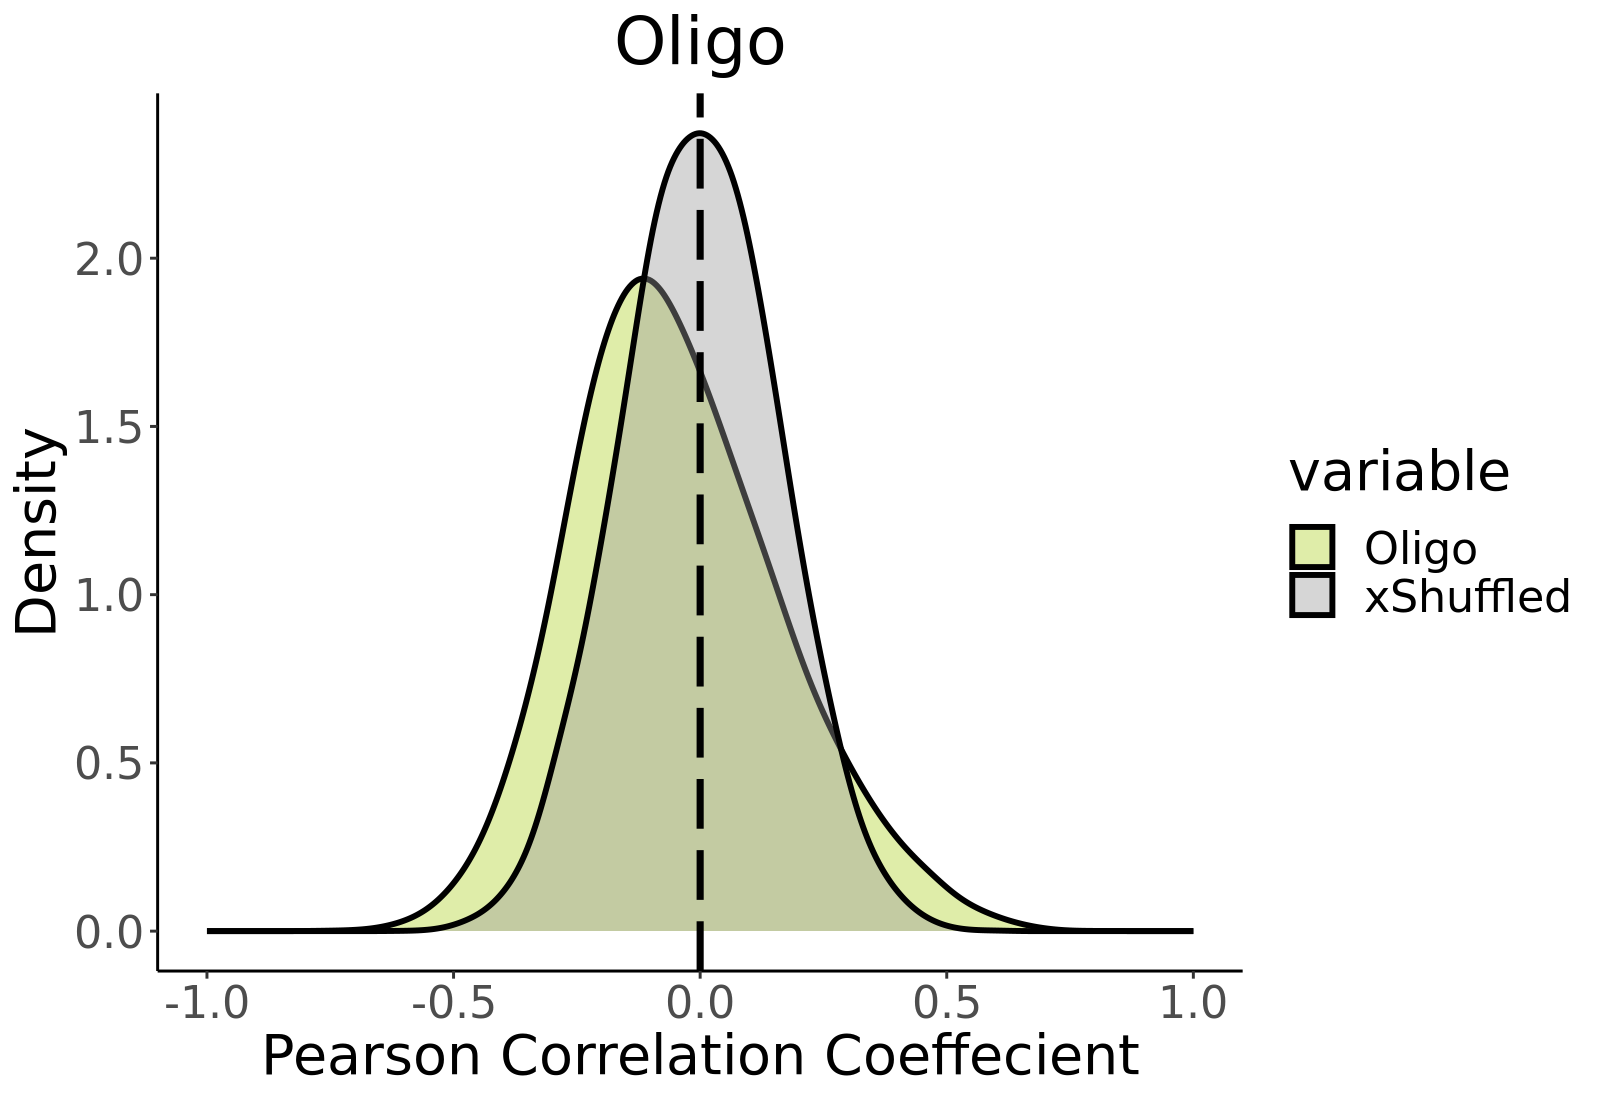

In [12]:
#Filled density plots
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
ggplot(data=comb, aes(x=cor, fill=variable)) +
geom_density(adjust=1.8, alpha=.4, size=1) +
scale_fill_manual(values=c("#B0D229","#999999")) +
geom_vline(xintercept=0, col="black", linetype="longdash", size=1.2) +
xlim(-1, 1) +
theme_classic() + labs(title=celltype, x ="Pearson Correlation Coeffecient", y = "Density") +
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))

In [13]:
output= foreach(i=1:nrow(cpm)) %dopar% {
pval = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$p.value
pval
}
pval = do.call(rbind,output)
pval = as.data.frame(pval)
colnames(pval) <- 'pval'

In [14]:
pval$fdr <- p.adjust(pval$pval, "fdr")

In [15]:
comb <- cbind(pcc, pval)
rownames(comb) <- rownames(cpm)

In [16]:
comb$log10fdr <- -log10(comb$fdr)
comb$Age_Correlated <- "No"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor > 0] <- "Up"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor < 0] <- "Down"

In [17]:
write.table(comb, file = paste0(celltype, '_pcc_donor_20k_counts_2x_donors.tsv'), sep = '\t')

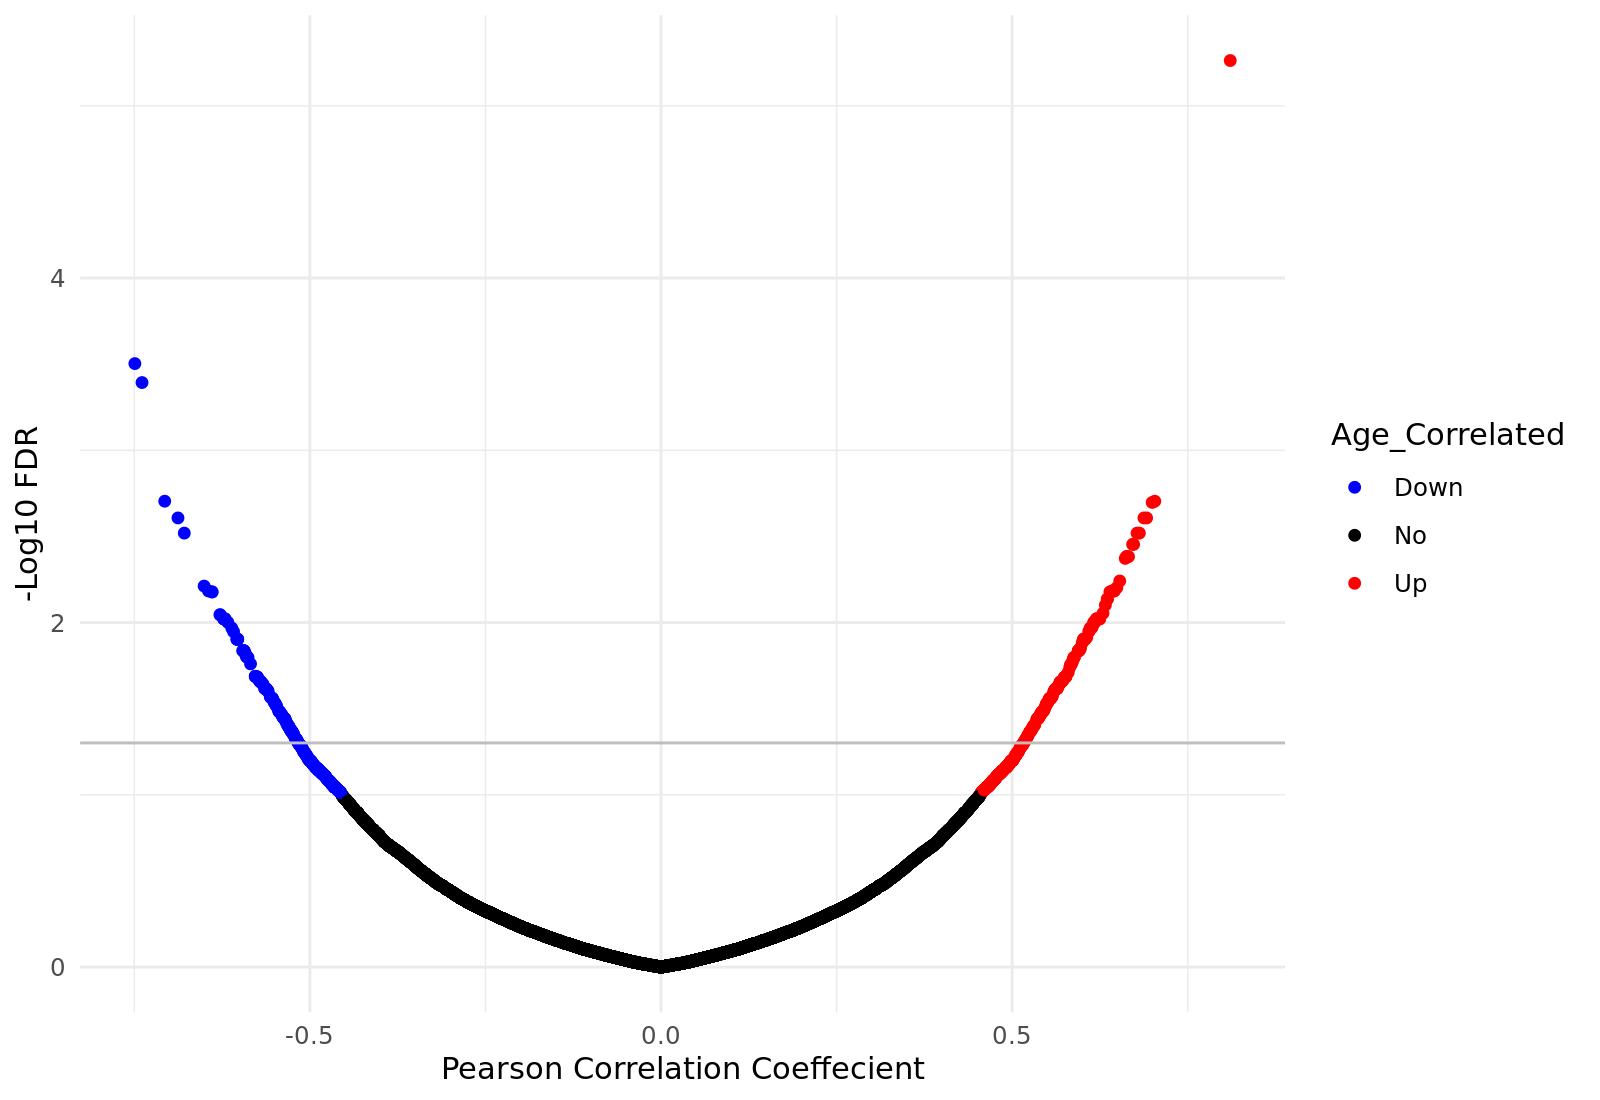

In [18]:
ggplot(data=comb, aes(x=cor, y=log10fdr, col=Age_Correlated)) +
geom_point() +
theme_minimal() +
scale_color_manual(values=c("blue", "black", "red")) +
#geom_vline(xintercept=c(-1, 1), col="gray") +
geom_hline(yintercept=-log10(0.05), col="gray") +
xlab("Pearson Correlation Coeffecient") + ylab("-Log10 FDR") #+ xlim(-1,1) + ylim(0,10)

In [19]:
comb <- comb[!grepl("No",comb$Age_Correlated),]
comb <- comb[sample(1:nrow(comb)), ]
#comb <- comb[order(comb$cor),]
comb <- comb[order(comb$Age_Correlated),]

In [20]:
write.table(comb, file = paste0(celltype, '_pcc_fdr_0.1.tsv'), sep = '\t')

In [21]:
comb$genes <- rownames(comb)
cpm$genes <- rownames(cpm)

In [22]:
comb <- join(comb, cpm, by = "genes")
comb[,1:7] <- NULL

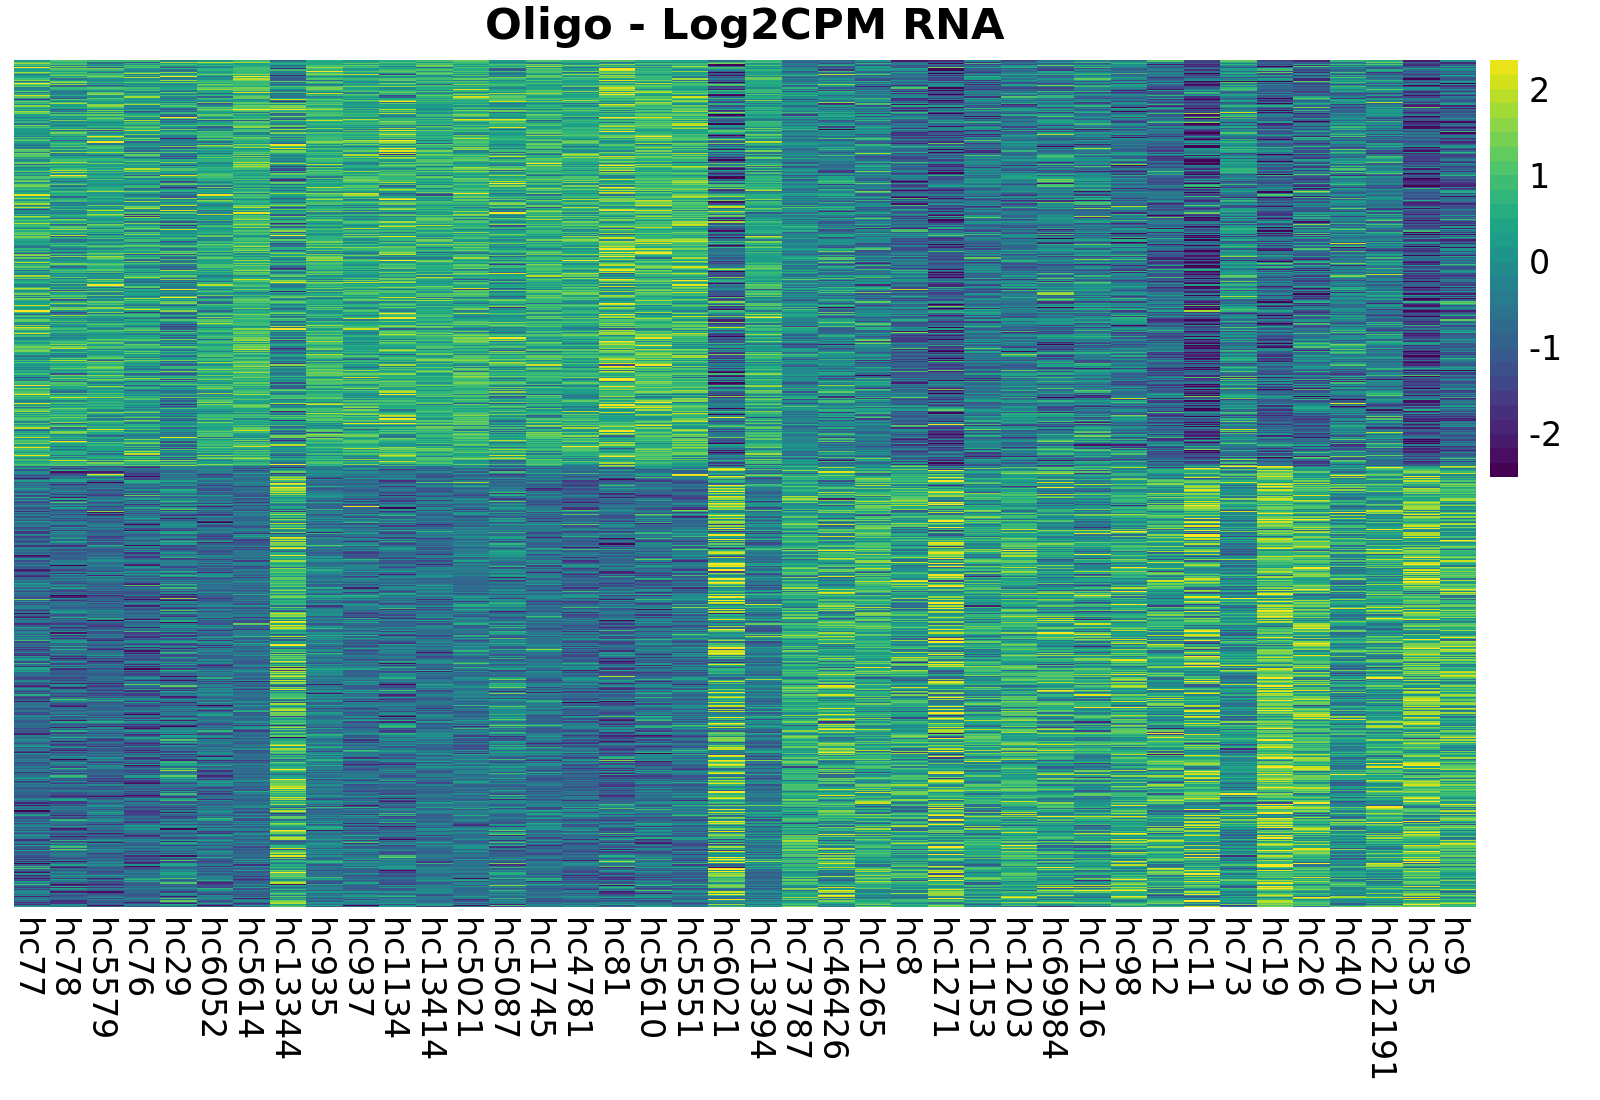

In [23]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
pheatmap(mat=comb, scale = 'row', color = viridis(30), breaks = seq(-2.5, 2.5, by = 0.166667), border_color = NA, 
         cluster_cols = F, cluster_rows = F, show_colnames = TRUE, show_rownames = FALSE, 
         fontsize = 12, main = paste0(celltype, " - Log2CPM RNA"))

In [24]:
celltype <- sprintf(cells[2])
cpm <- read.table(paste0('../rna_cpm/filtered_20k_donors_avg_2_counts_per_donor/', celltype, '_log2cpm_filtered.tsv', sep=''),
                  header=T, row.names=1)

In [25]:
age1 <- age[age$V1 %in% colnames(cpm),]
age1 <- t(age1[order(age1$V2),])
colnames(age1) <- as.matrix(age1[1,])
age1 <- age1[-1, ]
age1 <- t(age1)
age_mat <- age1[rep(seq_len(nrow(age1)), each = nrow(cpm)), ]
age_mat <- as.data.frame(age_mat)

In [26]:
# calculate spearman correlation 
output= foreach(i=1:nrow(cpm)) %dopar% {
pcc = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$estimate
pcc
}
# combine the list of output. 
pcc = do.call(rbind,output)

In [27]:
# calculate shuffled spearman correlation
cpm_shuf <- randomizeMatrix(cpm, null.model = "richness",iterations = 5000)
age_shuf <- randomizeMatrix(age_mat, null.model = "richness",iterations = 5000)

output_shuf= foreach(i=1:nrow(cpm_shuf)) %dopar% {
pcc_shuf = cor.test(as.numeric(cpm_shuf[i,]),as.numeric(age_shuf[i,]),method="pearson")$estimate
pcc_shuf
}
# combine the list of output. 
pcc_shuf = do.call(rbind,output_shuf)

In [28]:
pcc <- as.data.frame(pcc)
pcc_shuf <- as.data.frame(pcc_shuf)
pcc$variable <- paste0(celltype)
pcc_shuf$variable <- 'xShuffled'

In [29]:
comb <- rbind(pcc, pcc_shuf)

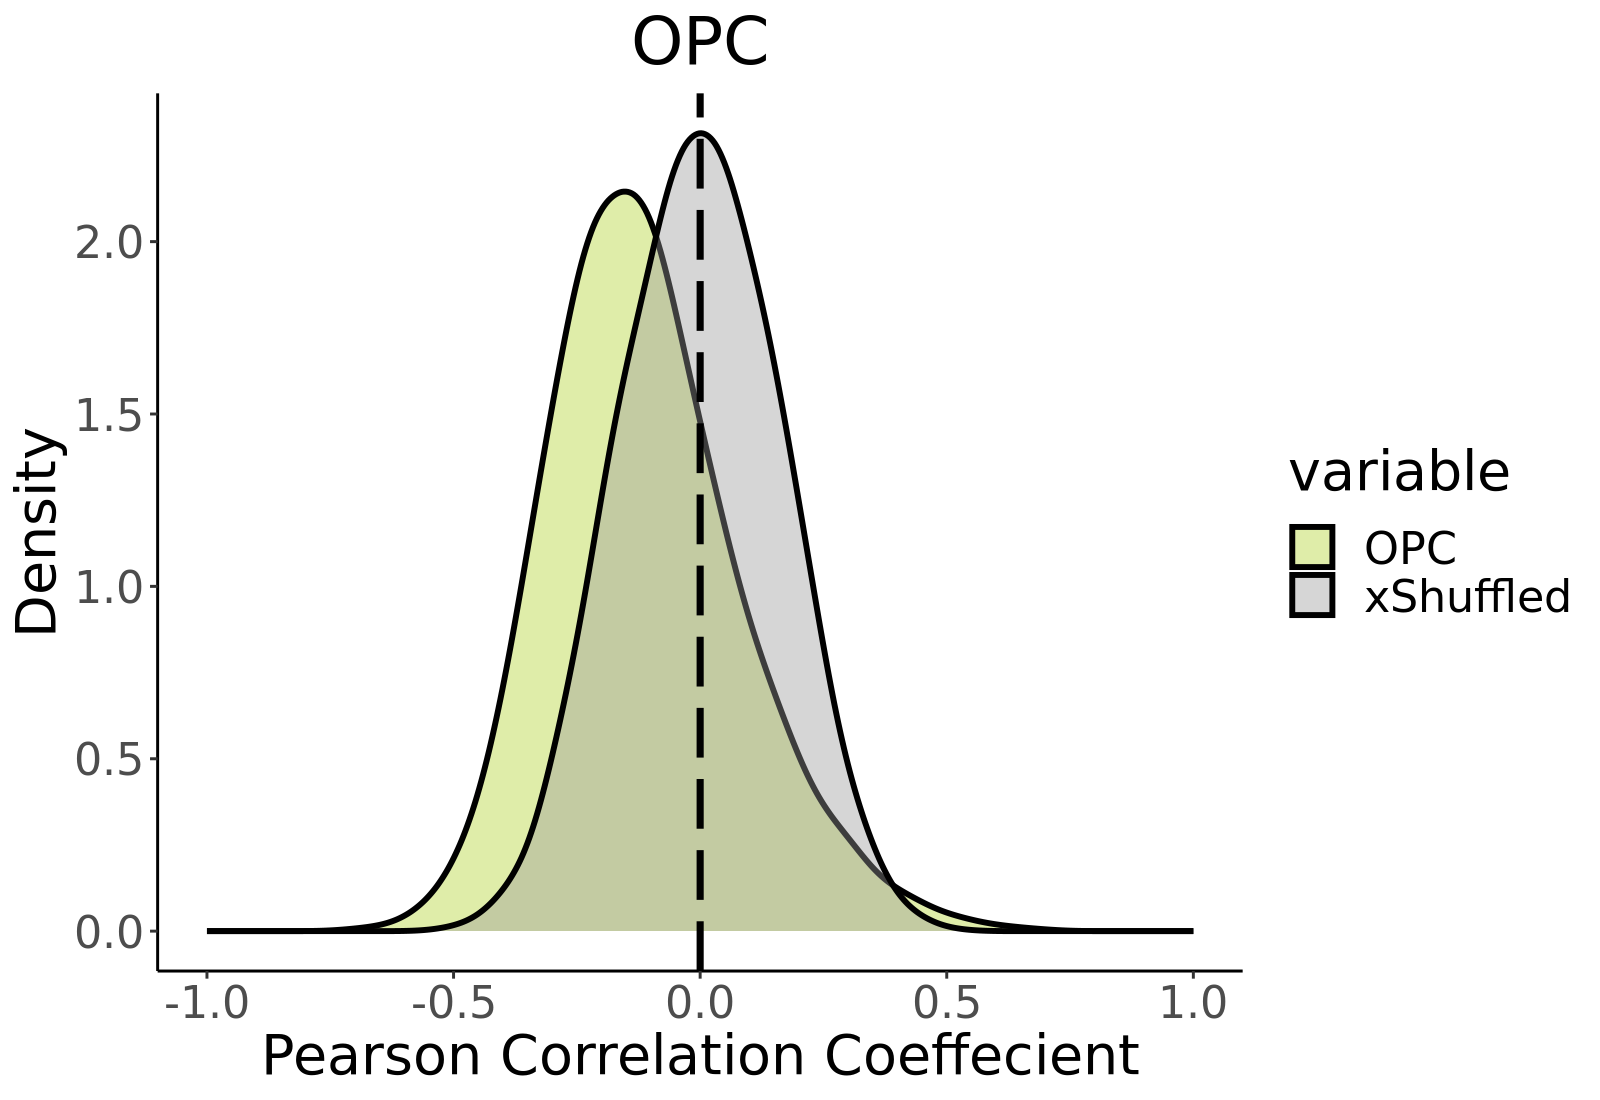

In [30]:
#Filled density plots
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
ggplot(data=comb, aes(x=cor, fill=variable)) +
geom_density(adjust=1.8, alpha=.4, size=1) +
scale_fill_manual(values=c("#B0D229","#999999")) +
geom_vline(xintercept=0, col="black", linetype="longdash", size=1.2) +
xlim(-1, 1) +
theme_classic() + labs(title=celltype, x ="Pearson Correlation Coeffecient", y = "Density") +
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))

In [31]:
output= foreach(i=1:nrow(cpm)) %dopar% {
pval = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$p.value
pval
}
pval = do.call(rbind,output)
pval = as.data.frame(pval)
colnames(pval) <- 'pval'
pval$fdr <- p.adjust(pval$pval, "fdr")

In [32]:
comb <- cbind(pcc, pval)
rownames(comb) <- rownames(cpm)

In [33]:
comb$log10fdr <- -log10(comb$fdr)
comb$Age_Correlated <- "No"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor > 0] <- "Up"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor < 0] <- "Down"

In [34]:
write.table(comb, file = paste0(celltype, '_pcc_donor_20k_counts_2x_donors.tsv'), sep = '\t')

In [35]:
comb <- comb[!grepl("No",comb$Age_Correlated),]
comb <- comb[sample(1:nrow(comb)), ]
#comb <- comb[order(comb$cor),]
comb <- comb[order(comb$Age_Correlated),]

In [36]:
write.table(comb, file = paste0(celltype, '_pcc_fdr_0.1.tsv'), sep = '\t')

In [37]:
comb$genes <- rownames(comb)
cpm$genes <- rownames(cpm)

In [38]:
comb <- join(comb, cpm, by = "genes")
comb[,1:7] <- NULL

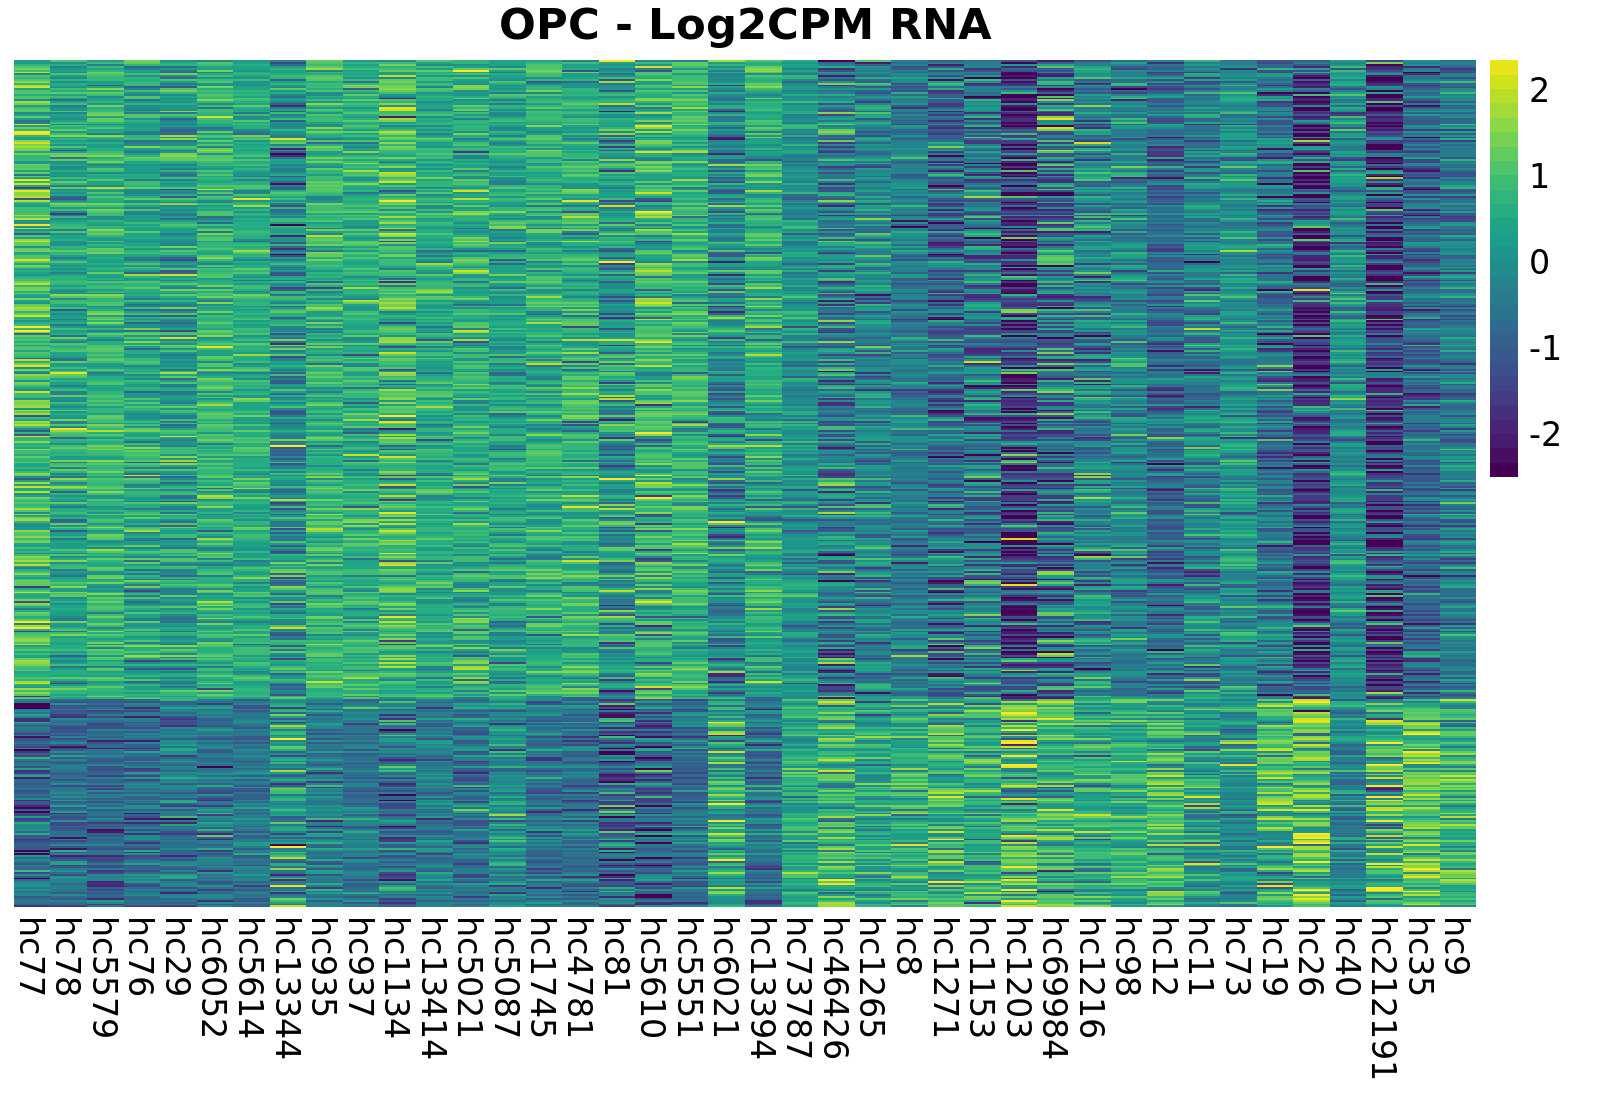

In [39]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
pheatmap(mat=comb, scale = 'row', color = viridis(30), breaks = seq(-2.5, 2.5, by = 0.166667), border_color = NA, 
         cluster_cols = F, cluster_rows = F, show_colnames = TRUE, show_rownames = FALSE, 
         fontsize = 12, main = paste0(celltype, " - Log2CPM RNA"))

In [40]:
celltype <- sprintf(cells[3])
cpm <- read.table(paste0('../rna_cpm/filtered_20k_donors_avg_2_counts_per_donor/', celltype, '_log2cpm_filtered.tsv', sep=''),
                  header=T, row.names=1)

In [41]:
age1 <- age[age$V1 %in% colnames(cpm),]
age1 <- t(age1[order(age1$V2),])
colnames(age1) <- as.matrix(age1[1,])
age1 <- age1[-1, ]
age1 <- t(age1)
age_mat <- age1[rep(seq_len(nrow(age1)), each = nrow(cpm)), ]
age_mat <- as.data.frame(age_mat)

In [42]:
# calculate spearman correlation 
output= foreach(i=1:nrow(cpm)) %dopar% {
pcc = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$estimate
pcc
}
# combine the list of output. 
pcc = do.call(rbind,output)

In [43]:
# calculate shuffled spearman correlation
cpm_shuf <- randomizeMatrix(cpm, null.model = "richness",iterations = 5000)
age_shuf <- randomizeMatrix(age_mat, null.model = "richness",iterations = 5000)

output_shuf= foreach(i=1:nrow(cpm_shuf)) %dopar% {
pcc_shuf = cor.test(as.numeric(cpm_shuf[i,]),as.numeric(age_shuf[i,]),method="pearson")$estimate
pcc_shuf
}
# combine the list of output. 
pcc_shuf = do.call(rbind,output_shuf)

In [44]:
pcc <- as.data.frame(pcc)
pcc_shuf <- as.data.frame(pcc_shuf)
pcc$variable <- paste0(celltype)
pcc_shuf$variable <- 'xShuffled'

In [45]:
comb <- rbind(pcc, pcc_shuf)

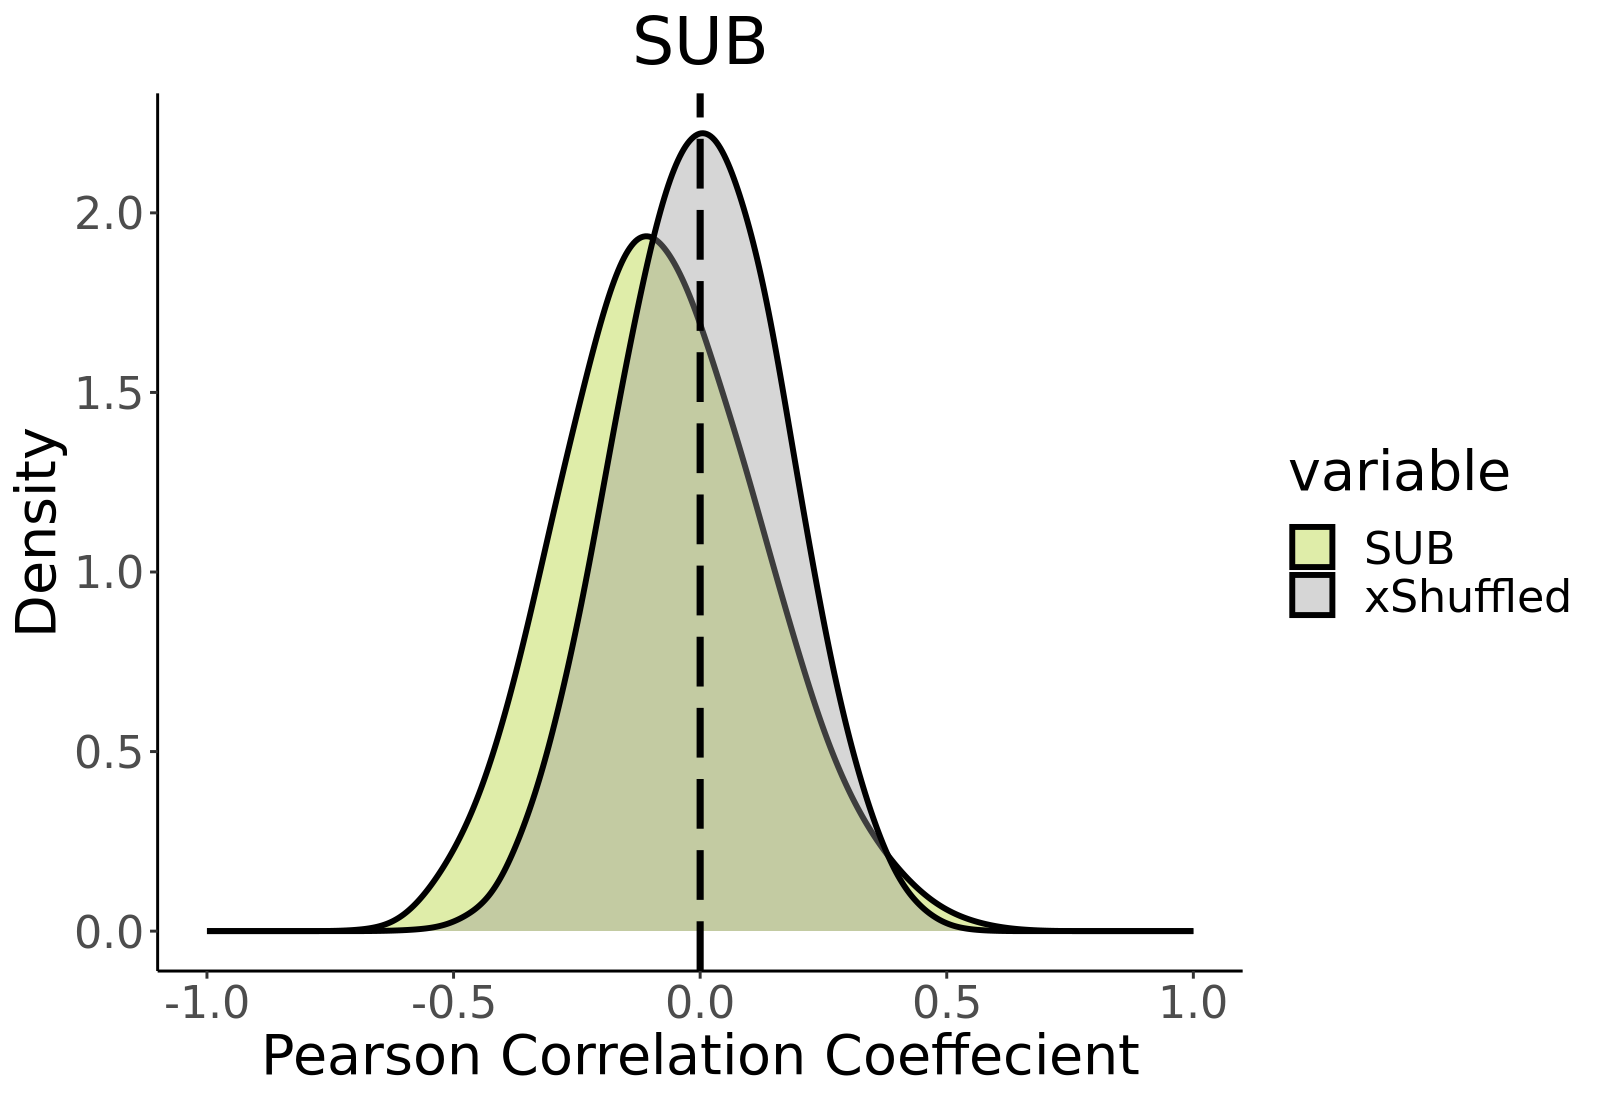

In [46]:
#Filled density plots
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
ggplot(data=comb, aes(x=cor, fill=variable)) +
geom_density(adjust=1.8, alpha=.4, size=1) +
scale_fill_manual(values=c("#B0D229","#999999")) +
geom_vline(xintercept=0, col="black", linetype="longdash", size=1.2) +
xlim(-1, 1) +
theme_classic() + labs(title=celltype, x ="Pearson Correlation Coeffecient", y = "Density") +
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))

In [47]:
output= foreach(i=1:nrow(cpm)) %dopar% {
pval = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$p.value
pval
}
pval = do.call(rbind,output)
pval = as.data.frame(pval)
colnames(pval) <- 'pval'
pval$fdr <- p.adjust(pval$pval, "fdr")

In [48]:
comb <- cbind(pcc, pval)
rownames(comb) <- rownames(cpm)

In [49]:
comb$log10fdr <- -log10(comb$fdr)
comb$Age_Correlated <- "No"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor > 0] <- "Up"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor < 0] <- "Down"

In [50]:
write.table(comb, file = paste0(celltype, '_pcc_donor_20k_counts_2x_donors.tsv'), sep = '\t')

In [51]:
comb <- comb[!grepl("No",comb$Age_Correlated),]
comb <- comb[sample(1:nrow(comb)), ]
#comb <- comb[order(comb$cor),]
comb <- comb[order(comb$Age_Correlated),]

In [52]:
write.table(comb, file = paste0(celltype, '_pcc_fdr_0.1.tsv'), sep = '\t')

In [53]:
comb$genes <- rownames(comb)
cpm$genes <- rownames(cpm)

In [54]:
comb <- join(comb, cpm, by = "genes")
comb[,1:7] <- NULL

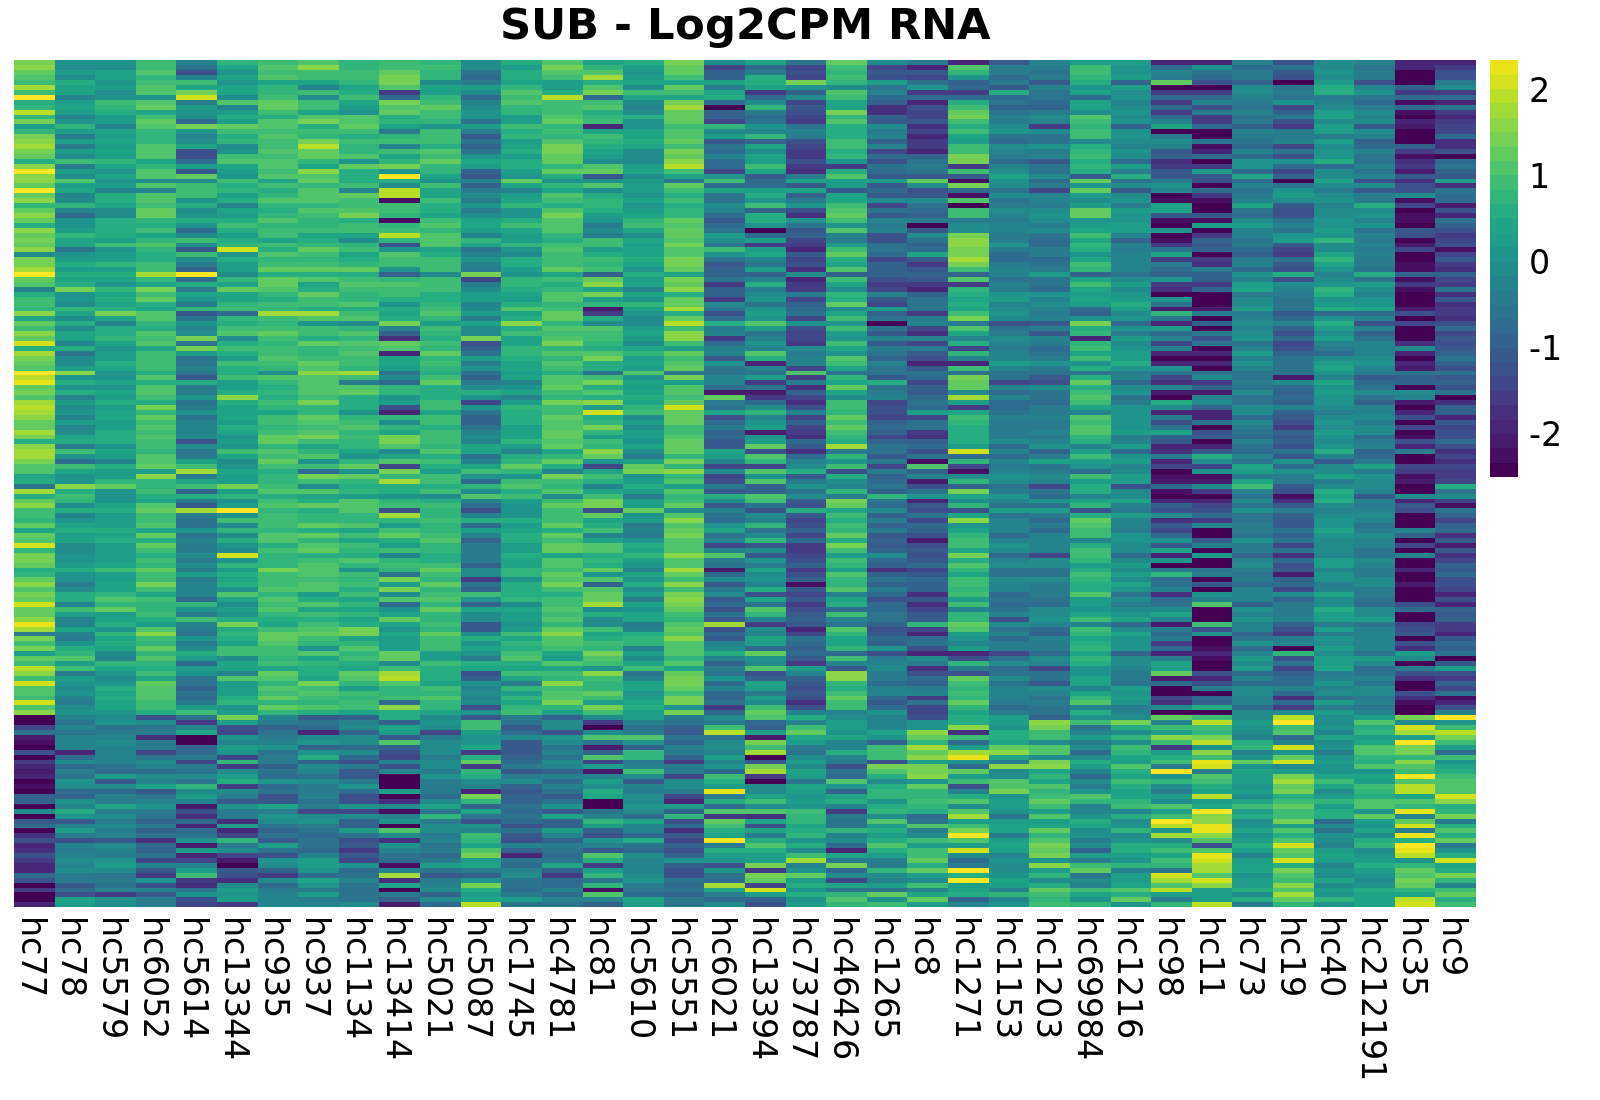

In [55]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
pheatmap(mat=comb, scale = 'row', color = viridis(30), breaks = seq(-2.5, 2.5, by = 0.166667), border_color = NA, 
         cluster_cols = F, cluster_rows = F, show_colnames = TRUE, show_rownames = FALSE, 
         fontsize = 12, main = paste0(celltype, " - Log2CPM RNA"))

In [56]:
celltype <- sprintf(cells[4])
cpm <- read.table(paste0('../rna_cpm/filtered_20k_donors_avg_2_counts_per_donor/', celltype, '_log2cpm_filtered.tsv', sep=''),
                  header=T, row.names=1)

In [57]:
age1 <- age[age$V1 %in% colnames(cpm),]
age1 <- t(age1[order(age1$V2),])
colnames(age1) <- as.matrix(age1[1,])
age1 <- age1[-1, ]
age1 <- t(age1)
age_mat <- age1[rep(seq_len(nrow(age1)), each = nrow(cpm)), ]
age_mat <- as.data.frame(age_mat)

In [58]:
# calculate spearman correlation 
output= foreach(i=1:nrow(cpm)) %dopar% {
pcc = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$estimate
pcc
}
# combine the list of output. 
pcc = do.call(rbind,output)

In [59]:
# calculate shuffled spearman correlation
cpm_shuf <- randomizeMatrix(cpm, null.model = "richness",iterations = 5000)
age_shuf <- randomizeMatrix(age_mat, null.model = "richness",iterations = 5000)

output_shuf= foreach(i=1:nrow(cpm_shuf)) %dopar% {
pcc_shuf = cor.test(as.numeric(cpm_shuf[i,]),as.numeric(age_shuf[i,]),method="pearson")$estimate
pcc_shuf
}
# combine the list of output. 
pcc_shuf = do.call(rbind,output_shuf)

In [60]:
pcc <- as.data.frame(pcc)
pcc_shuf <- as.data.frame(pcc_shuf)
pcc$variable <- paste0(celltype)
pcc_shuf$variable <- 'xShuffled'

In [61]:
comb <- rbind(pcc, pcc_shuf)

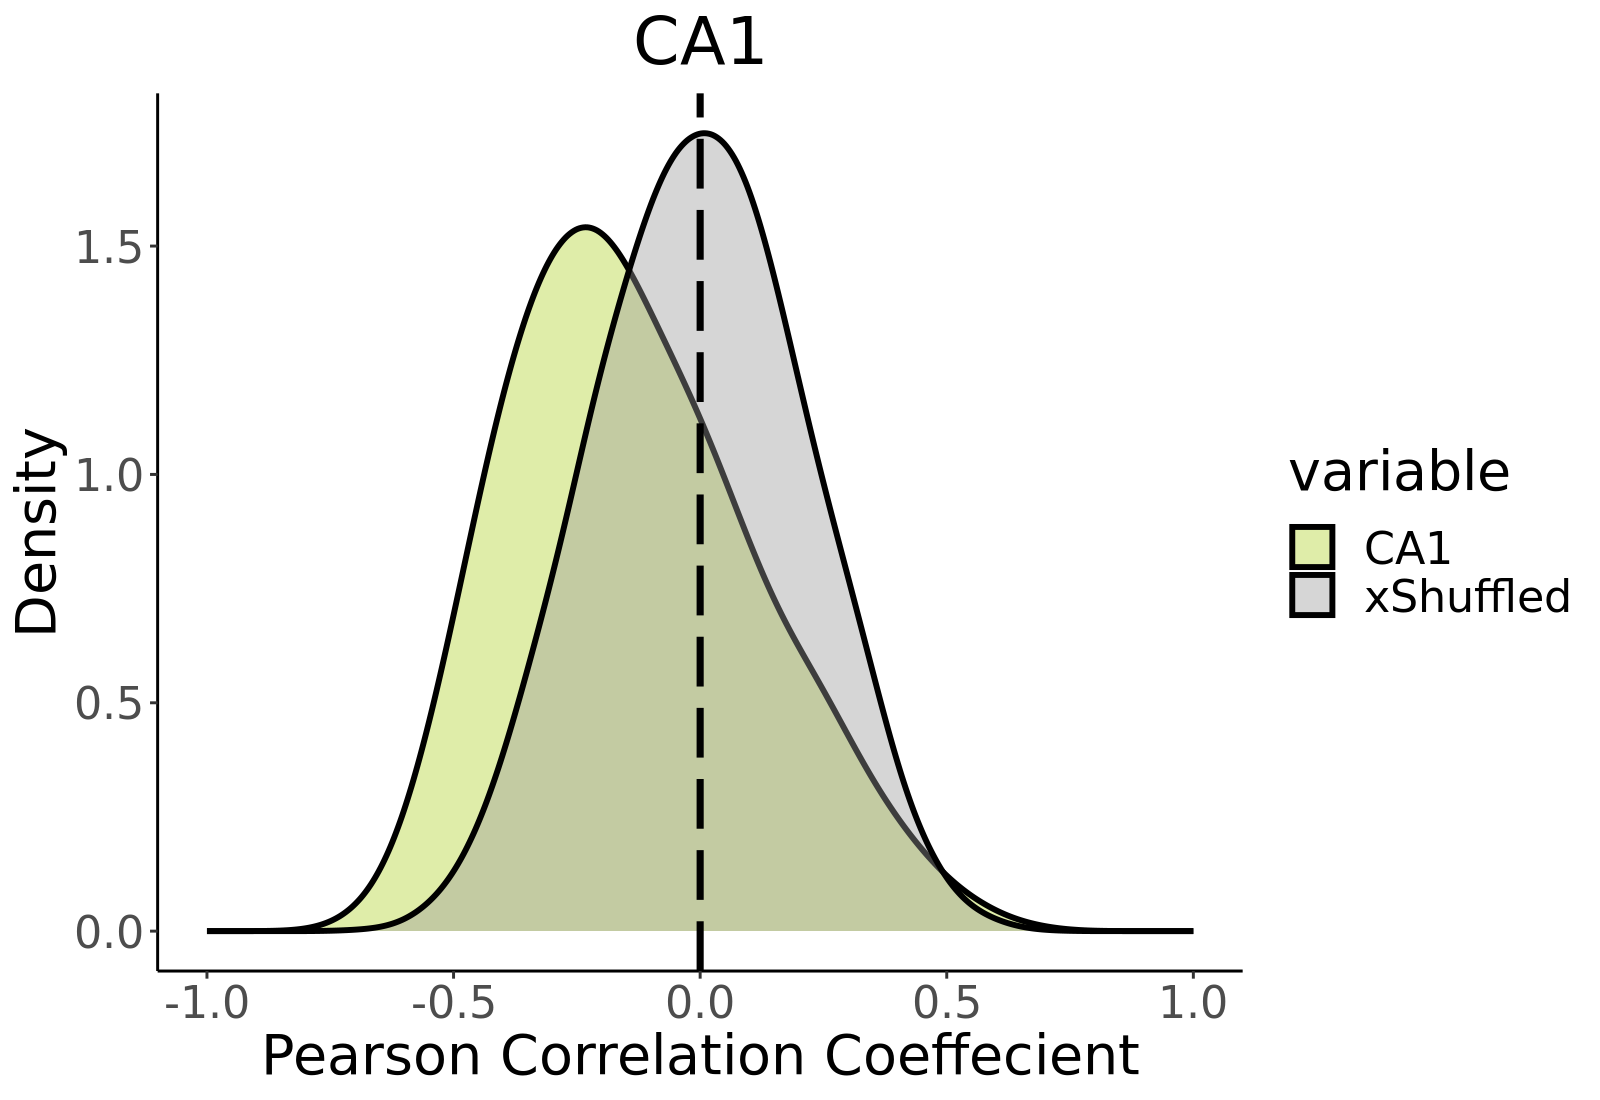

In [62]:
#Filled density plots
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
ggplot(data=comb, aes(x=cor, fill=variable)) +
geom_density(adjust=1.8, alpha=.4, size=1) +
scale_fill_manual(values=c("#B0D229","#999999")) +
geom_vline(xintercept=0, col="black", linetype="longdash", size=1.2) +
xlim(-1, 1) +
theme_classic() + labs(title=celltype, x ="Pearson Correlation Coeffecient", y = "Density") +
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))

In [63]:
output= foreach(i=1:nrow(cpm)) %dopar% {
pval = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$p.value
pval
}
pval = do.call(rbind,output)
pval = as.data.frame(pval)
colnames(pval) <- 'pval'
pval$fdr <- p.adjust(pval$pval, "fdr")

In [64]:
comb <- cbind(pcc, pval)
rownames(comb) <- rownames(cpm)

In [65]:
comb$log10fdr <- -log10(comb$fdr)
comb$Age_Correlated <- "No"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor > 0] <- "Up"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor < 0] <- "Down"

In [66]:
write.table(comb, file = paste0(celltype, '_pcc_donor_20k_counts_2x_donors.tsv'), sep = '\t')

In [67]:
comb <- comb[!grepl("No",comb$Age_Correlated),]
comb <- comb[sample(1:nrow(comb)), ]
#comb <- comb[order(comb$cor),]
comb <- comb[order(comb$Age_Correlated),]

In [68]:
write.table(comb, file = paste0(celltype, '_pcc_fdr_0.1.tsv'), sep = '\t')

In [69]:
comb$genes <- rownames(comb)
cpm$genes <- rownames(cpm)

In [70]:
comb <- join(comb, cpm, by = "genes")
comb[,1:7] <- NULL

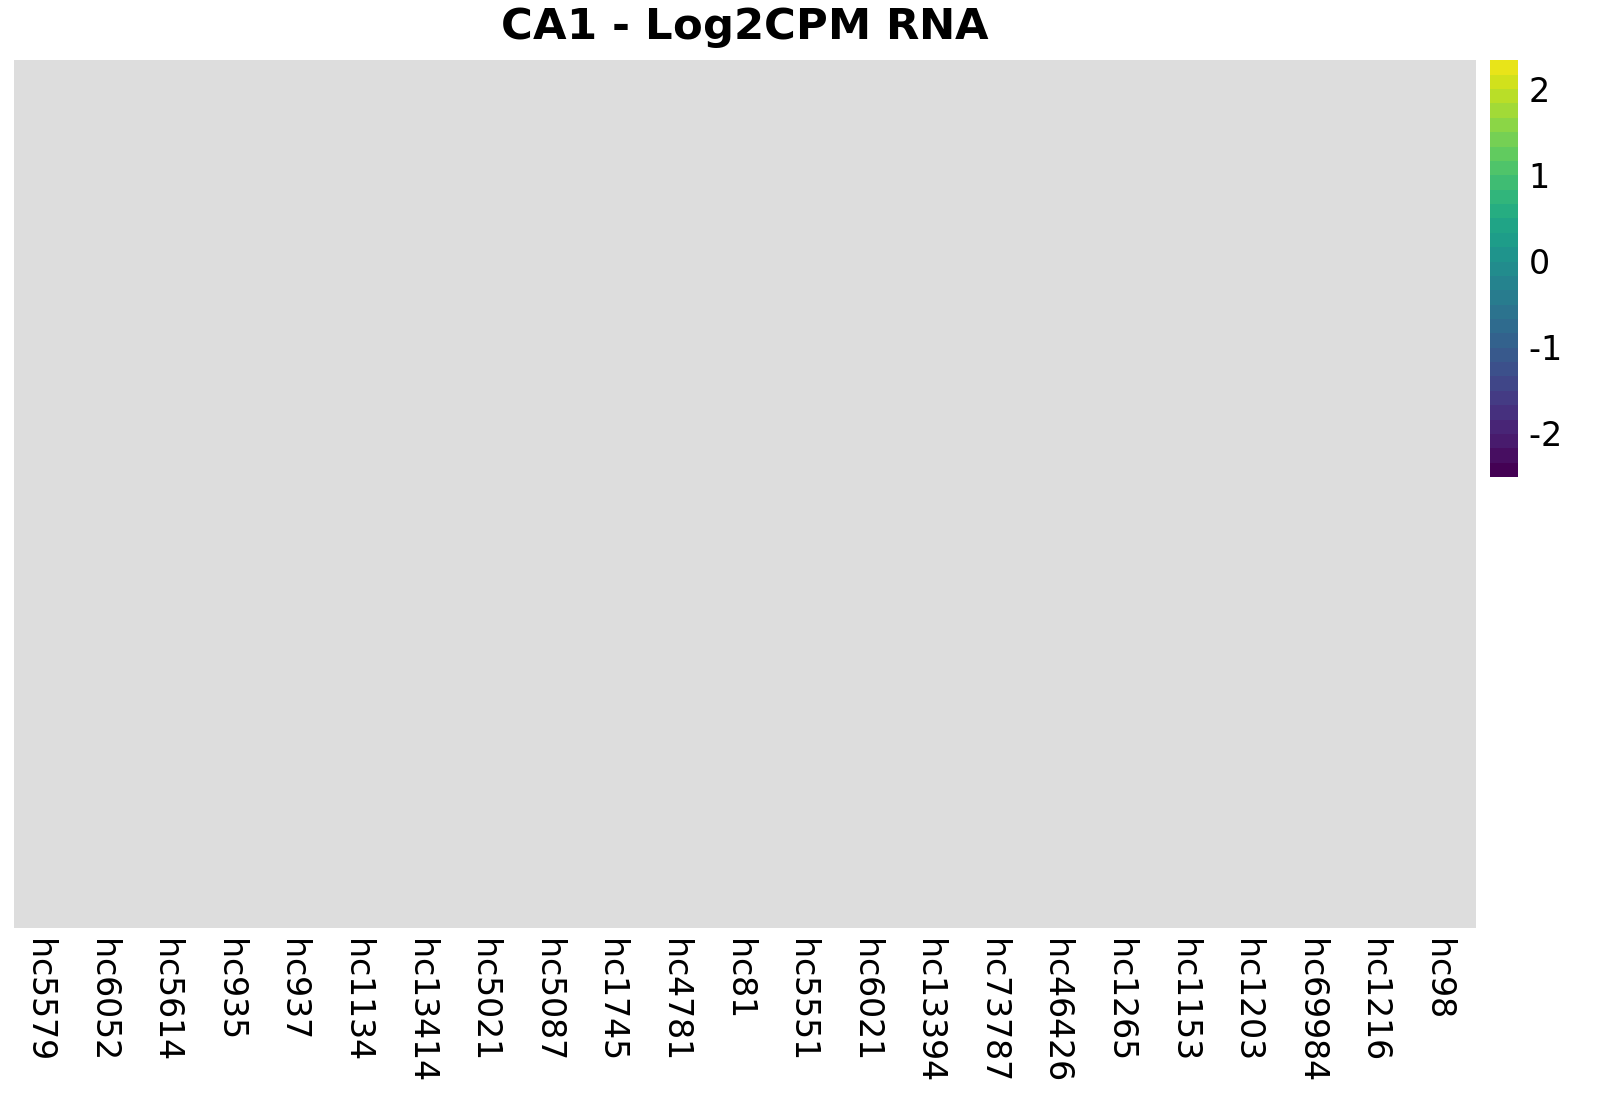

In [71]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
pheatmap(mat=comb, scale = 'row', color = viridis(30), breaks = seq(-2.5, 2.5, by = 0.166667), border_color = NA, 
         cluster_cols = F, cluster_rows = F, show_colnames = TRUE, show_rownames = FALSE, 
         fontsize = 12, main = paste0(celltype, " - Log2CPM RNA"))

In [72]:
celltype <- sprintf(cells[5])
cpm <- read.table(paste0('../rna_cpm/filtered_20k_donors_avg_2_counts_per_donor/', celltype, '_log2cpm_filtered.tsv', sep=''),
                  header=T, row.names=1)

In [73]:
age1 <- age[age$V1 %in% colnames(cpm),]
age1 <- t(age1[order(age1$V2),])
colnames(age1) <- as.matrix(age1[1,])
age1 <- age1[-1, ]
age1 <- t(age1)
age_mat <- age1[rep(seq_len(nrow(age1)), each = nrow(cpm)), ]
age_mat <- as.data.frame(age_mat)

In [74]:
# calculate spearman correlation 
output= foreach(i=1:nrow(cpm)) %dopar% {
pcc = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$estimate
pcc
}
# combine the list of output. 
pcc = do.call(rbind,output)

In [75]:
# calculate shuffled spearman correlation
cpm_shuf <- randomizeMatrix(cpm, null.model = "richness",iterations = 5000)
age_shuf <- randomizeMatrix(age_mat, null.model = "richness",iterations = 5000)

output_shuf= foreach(i=1:nrow(cpm_shuf)) %dopar% {
pcc_shuf = cor.test(as.numeric(cpm_shuf[i,]),as.numeric(age_shuf[i,]),method="pearson")$estimate
pcc_shuf
}
# combine the list of output. 
pcc_shuf = do.call(rbind,output_shuf)

In [76]:
pcc <- as.data.frame(pcc)
pcc_shuf <- as.data.frame(pcc_shuf)
pcc$variable <- paste0(celltype)
pcc_shuf$variable <- 'xShuffled'

In [77]:
comb <- rbind(pcc, pcc_shuf)

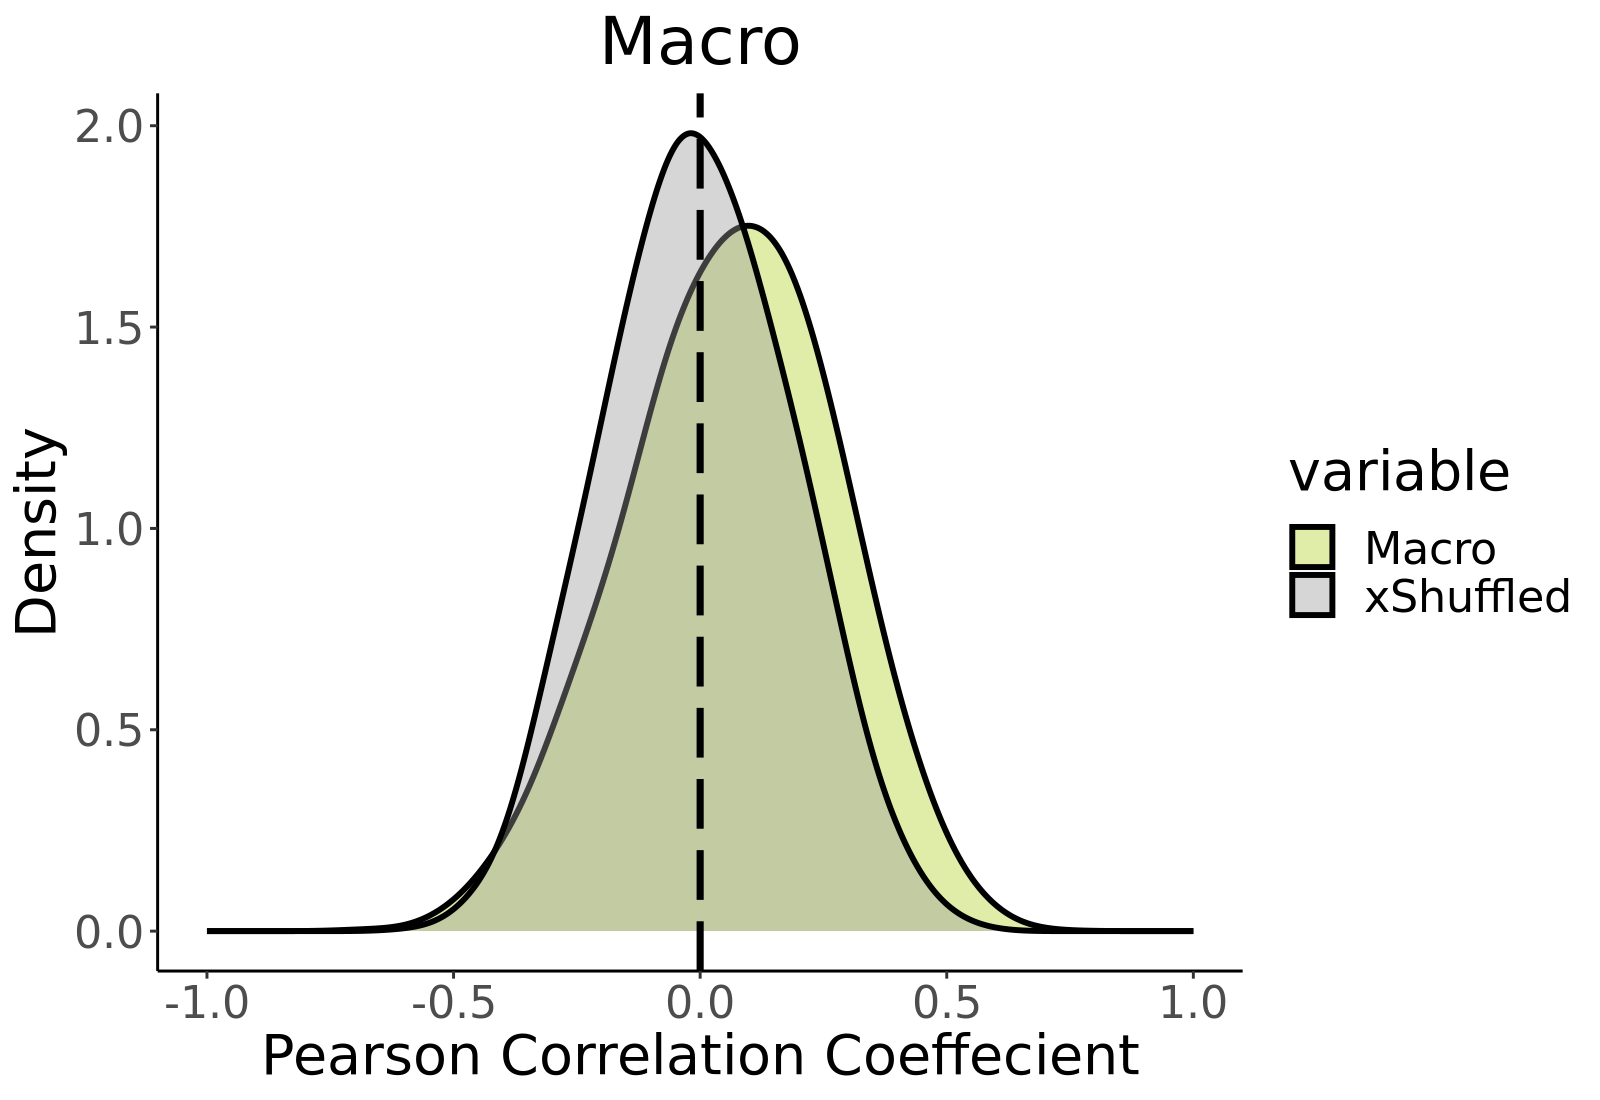

In [78]:
#Filled density plots
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
ggplot(data=comb, aes(x=cor, fill=variable)) +
geom_density(adjust=1.8, alpha=.4, size=1) +
scale_fill_manual(values=c("#B0D229","#999999")) +
geom_vline(xintercept=0, col="black", linetype="longdash", size=1.2) +
xlim(-1, 1) +
theme_classic() + labs(title=celltype, x ="Pearson Correlation Coeffecient", y = "Density") +
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))

In [79]:
output= foreach(i=1:nrow(cpm)) %dopar% {
pval = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$p.value
pval
}
pval = do.call(rbind,output)
pval = as.data.frame(pval)
colnames(pval) <- 'pval'
pval$fdr <- p.adjust(pval$pval, "fdr")

In [80]:
comb <- cbind(pcc, pval)
rownames(comb) <- rownames(cpm)

In [81]:
comb$log10fdr <- -log10(comb$fdr)
comb$Age_Correlated <- "No"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor > 0] <- "Up"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor < 0] <- "Down"

In [82]:
write.table(comb, file = paste0(celltype, '_pcc_donor_20k_counts_2x_donors.tsv'), sep = '\t')

In [83]:
comb <- comb[!grepl("No",comb$Age_Correlated),]
comb <- comb[sample(1:nrow(comb)), ]
#comb <- comb[order(comb$cor),]
comb <- comb[order(comb$Age_Correlated),]

In [84]:
write.table(comb, file = paste0(celltype, '_pcc_fdr_0.1.tsv'), sep = '\t')

In [85]:
comb$genes <- rownames(comb)
cpm$genes <- rownames(cpm)

In [86]:
comb <- join(comb, cpm, by = "genes")
comb[,1:7] <- NULL

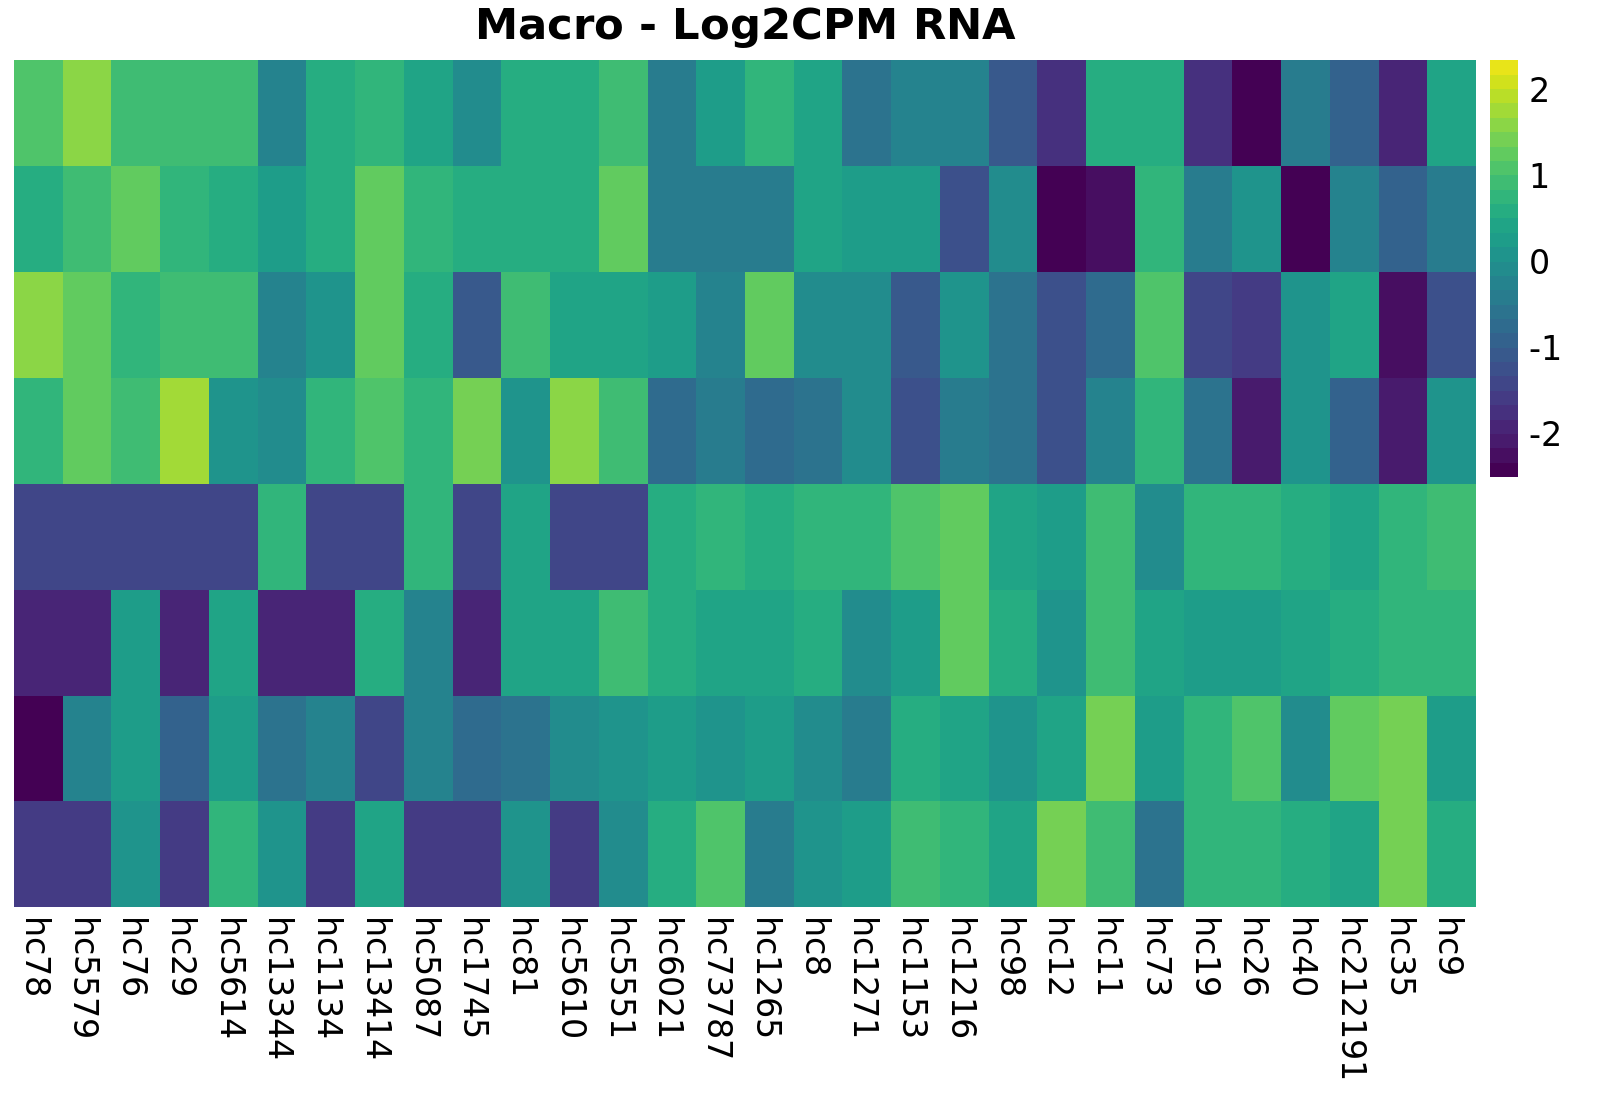

In [87]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
pheatmap(mat=comb, scale = 'row', color = viridis(30), breaks = seq(-2.5, 2.5, by = 0.166667), border_color = NA, 
         cluster_cols = F, cluster_rows = F, show_colnames = TRUE, show_rownames = FALSE, 
         fontsize = 12, main = paste0(celltype, " - Log2CPM RNA"))

In [88]:
celltype <- sprintf(cells[6])
cpm <- read.table(paste0('../rna_cpm/filtered_20k_donors_avg_2_counts_per_donor/', celltype, '_log2cpm_filtered.tsv', sep=''),
                  header=T, row.names=1)

In [89]:
age1 <- age[age$V1 %in% colnames(cpm),]
age1 <- t(age1[order(age1$V2),])
colnames(age1) <- as.matrix(age1[1,])
age1 <- age1[-1, ]
age1 <- t(age1)
age_mat <- age1[rep(seq_len(nrow(age1)), each = nrow(cpm)), ]
age_mat <- as.data.frame(age_mat)

In [90]:
# calculate spearman correlation 
output= foreach(i=1:nrow(cpm)) %dopar% {
pcc = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$estimate
pcc
}
# combine the list of output. 
pcc = do.call(rbind,output)

In [91]:
# calculate shuffled spearman correlation
cpm_shuf <- randomizeMatrix(cpm, null.model = "richness",iterations = 5000)
age_shuf <- randomizeMatrix(age_mat, null.model = "richness",iterations = 5000)

output_shuf= foreach(i=1:nrow(cpm_shuf)) %dopar% {
pcc_shuf = cor.test(as.numeric(cpm_shuf[i,]),as.numeric(age_shuf[i,]),method="pearson")$estimate
pcc_shuf
}
# combine the list of output. 
pcc_shuf = do.call(rbind,output_shuf)

In [92]:
pcc <- as.data.frame(pcc)
pcc_shuf <- as.data.frame(pcc_shuf)
pcc$variable <- paste0(celltype)
pcc_shuf$variable <- 'xShuffled'

In [93]:
comb <- rbind(pcc, pcc_shuf)

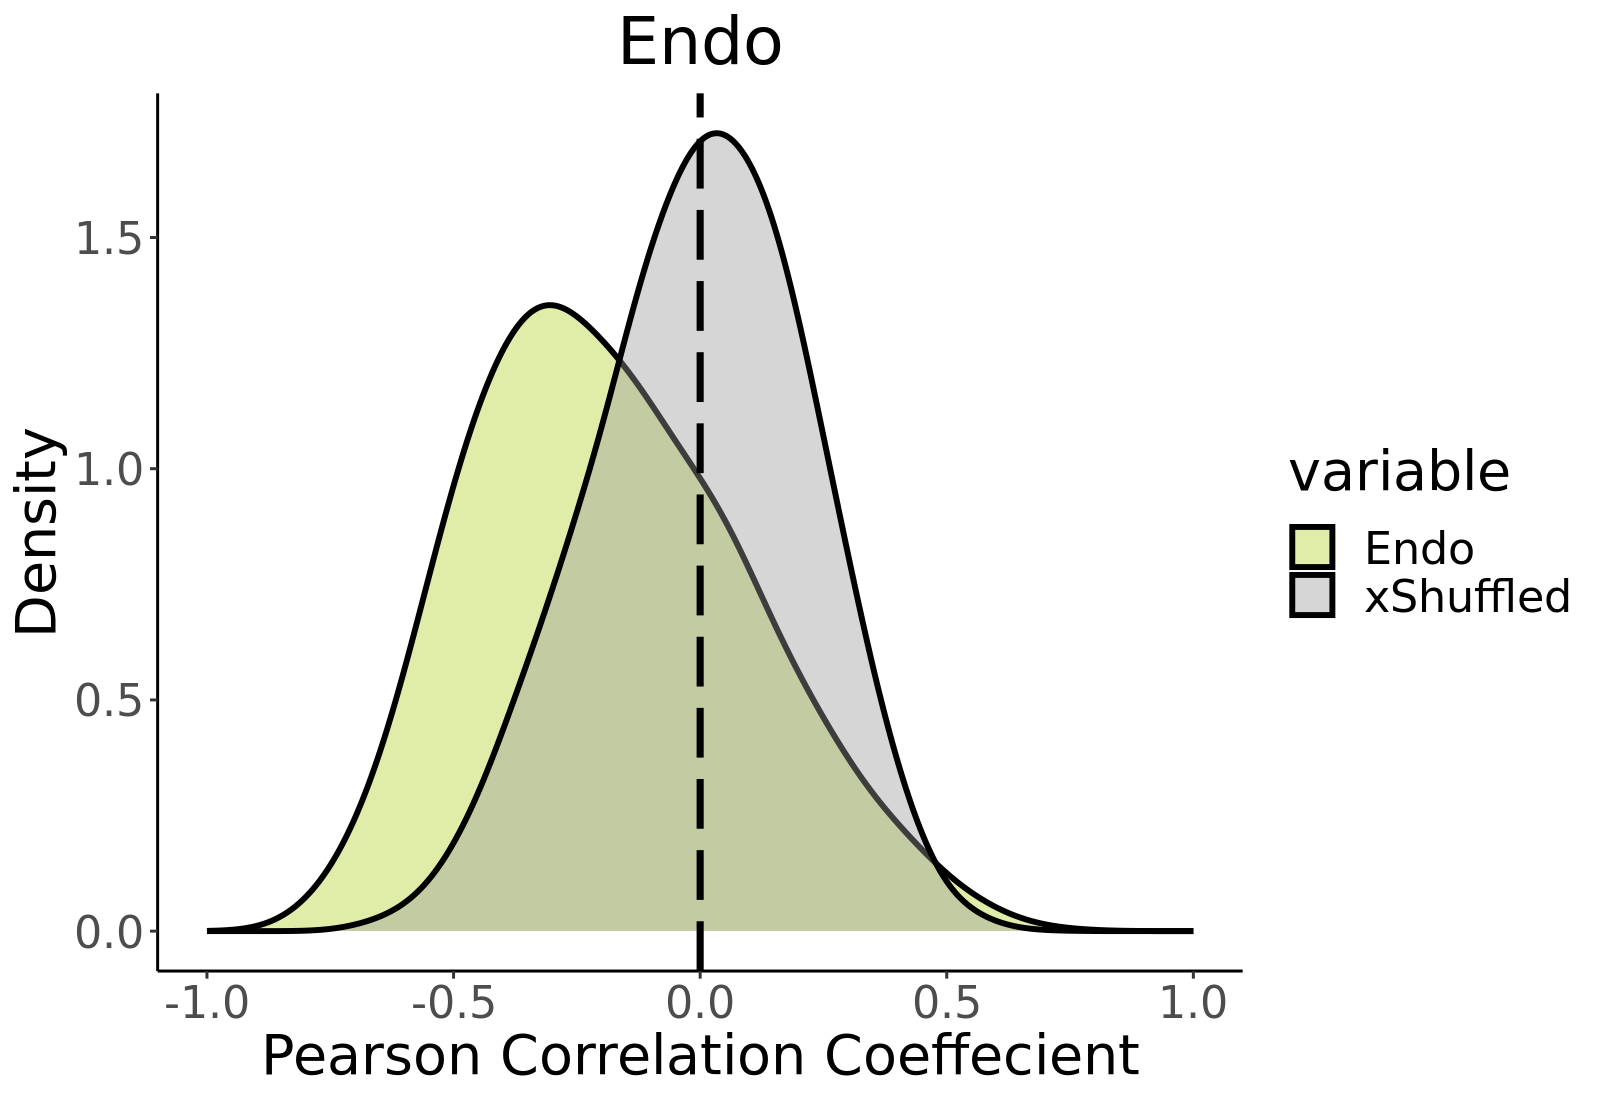

In [94]:
#Filled density plots
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
ggplot(data=comb, aes(x=cor, fill=variable)) +
geom_density(adjust=1.8, alpha=.4, size=1) +
scale_fill_manual(values=c("#B0D229","#999999")) +
geom_vline(xintercept=0, col="black", linetype="longdash", size=1.2) +
xlim(-1, 1) +
theme_classic() + labs(title=celltype, x ="Pearson Correlation Coeffecient", y = "Density") +
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))

In [95]:
output= foreach(i=1:nrow(cpm)) %dopar% {
pval = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$p.value
pval
}
pval = do.call(rbind,output)
pval = as.data.frame(pval)
colnames(pval) <- 'pval'
pval$fdr <- p.adjust(pval$pval, "fdr")

In [96]:
comb <- cbind(pcc, pval)
rownames(comb) <- rownames(cpm)

In [97]:
comb$log10fdr <- -log10(comb$fdr)
comb$Age_Correlated <- "No"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor > 0] <- "Up"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor < 0] <- "Down"

In [98]:
write.table(comb, file = paste0(celltype, '_pcc_donor_20k_counts_2x_donors.tsv'), sep = '\t')

In [99]:
comb <- comb[!grepl("No",comb$Age_Correlated),]
comb <- comb[sample(1:nrow(comb)), ]
#comb <- comb[order(comb$cor),]
comb <- comb[order(comb$Age_Correlated),]

In [100]:
write.table(comb, file = paste0(celltype, '_pcc_fdr_0.1.tsv'), sep = '\t')

In [101]:
comb$genes <- rownames(comb)
cpm$genes <- rownames(cpm)

In [102]:
comb <- join(comb, cpm, by = "genes")
comb[,1:7] <- NULL

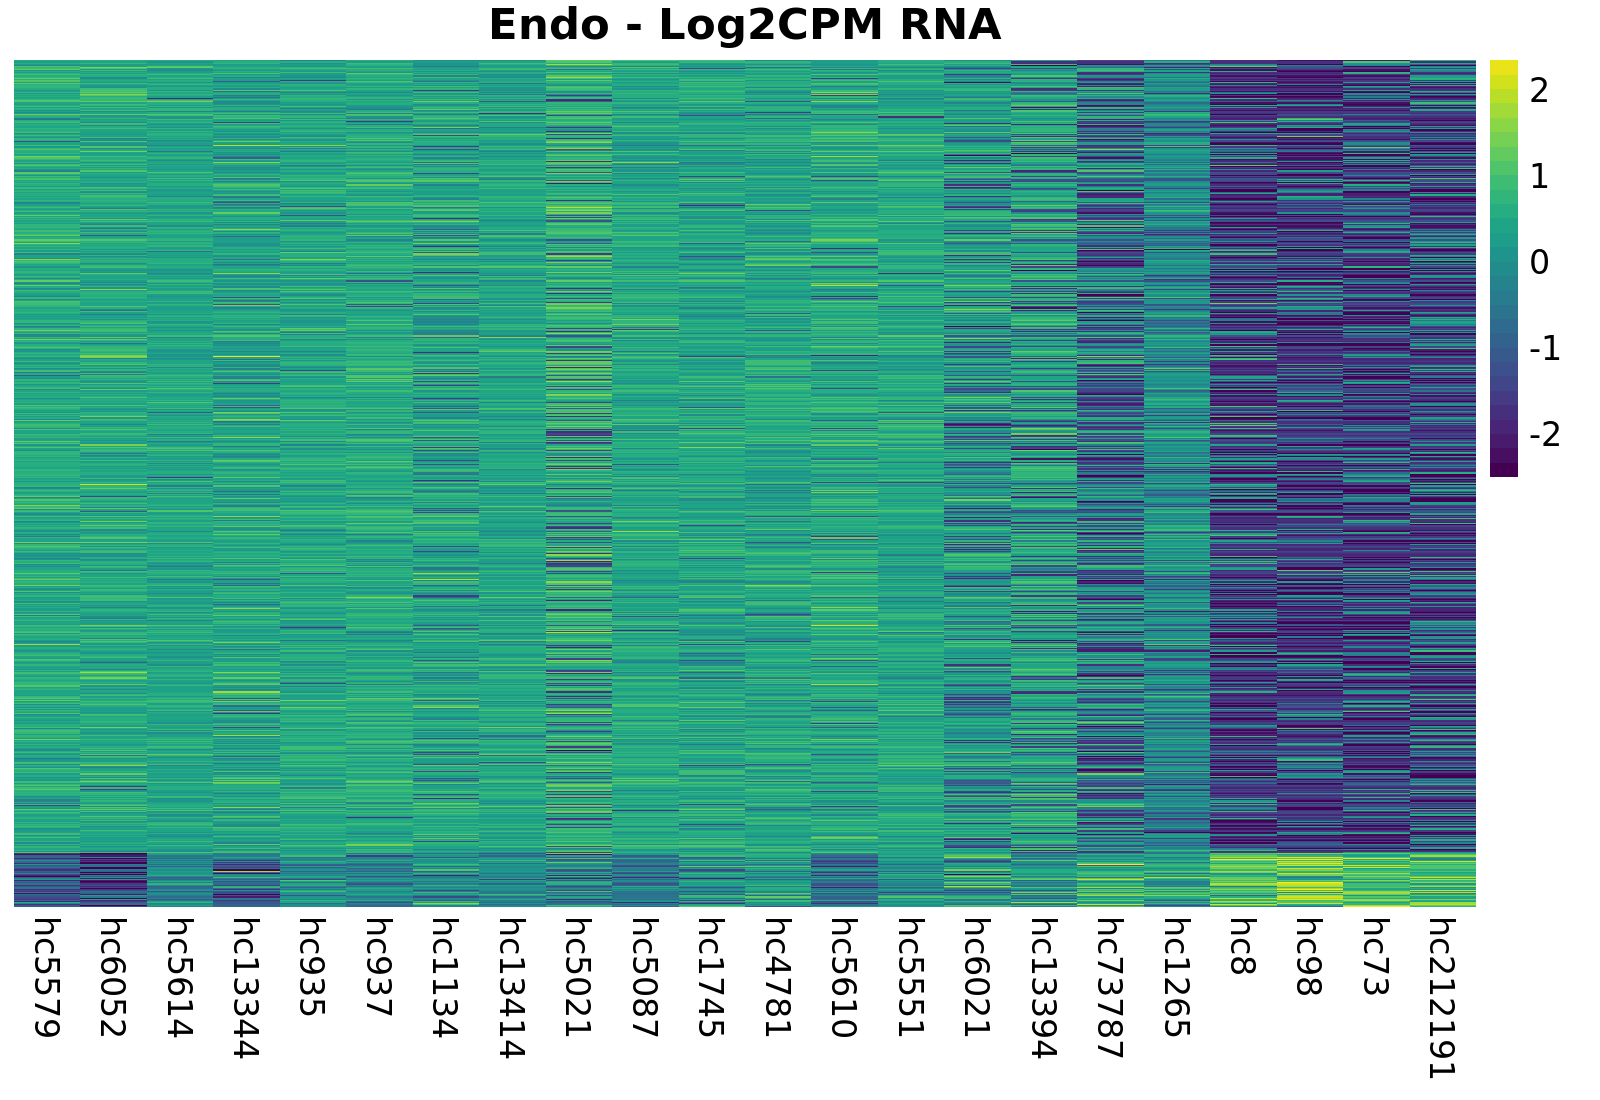

In [103]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
pheatmap(mat=comb, scale = 'row', color = viridis(30), breaks = seq(-2.5, 2.5, by = 0.166667), border_color = NA, 
         cluster_cols = F, cluster_rows = F, show_colnames = TRUE, show_rownames = FALSE, 
         fontsize = 12, main = paste0(celltype, " - Log2CPM RNA"))

In [104]:
celltype <- sprintf(cells[7])
cpm <- read.table(paste0('../rna_cpm/filtered_20k_donors_avg_2_counts_per_donor/', celltype, '_log2cpm_filtered.tsv', sep=''),
                  header=T, row.names=1)

In [105]:
age1 <- age[age$V1 %in% colnames(cpm),]
age1 <- t(age1[order(age1$V2),])
colnames(age1) <- as.matrix(age1[1,])
age1 <- age1[-1, ]
age1 <- t(age1)
age_mat <- age1[rep(seq_len(nrow(age1)), each = nrow(cpm)), ]
age_mat <- as.data.frame(age_mat)

In [106]:
# calculate spearman correlation 
output= foreach(i=1:nrow(cpm)) %dopar% {
pcc = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$estimate
pcc
}
# combine the list of output. 
pcc = do.call(rbind,output)

In [107]:
# calculate shuffled spearman correlation
cpm_shuf <- randomizeMatrix(cpm, null.model = "richness",iterations = 5000)
age_shuf <- randomizeMatrix(age_mat, null.model = "richness",iterations = 5000)

output_shuf= foreach(i=1:nrow(cpm_shuf)) %dopar% {
pcc_shuf = cor.test(as.numeric(cpm_shuf[i,]),as.numeric(age_shuf[i,]),method="pearson")$estimate
pcc_shuf
}
# combine the list of output. 
pcc_shuf = do.call(rbind,output_shuf)

In [108]:
pcc <- as.data.frame(pcc)
pcc_shuf <- as.data.frame(pcc_shuf)
pcc$variable <- paste0(celltype)
pcc_shuf$variable <- 'xShuffled'

In [109]:
comb <- rbind(pcc, pcc_shuf)

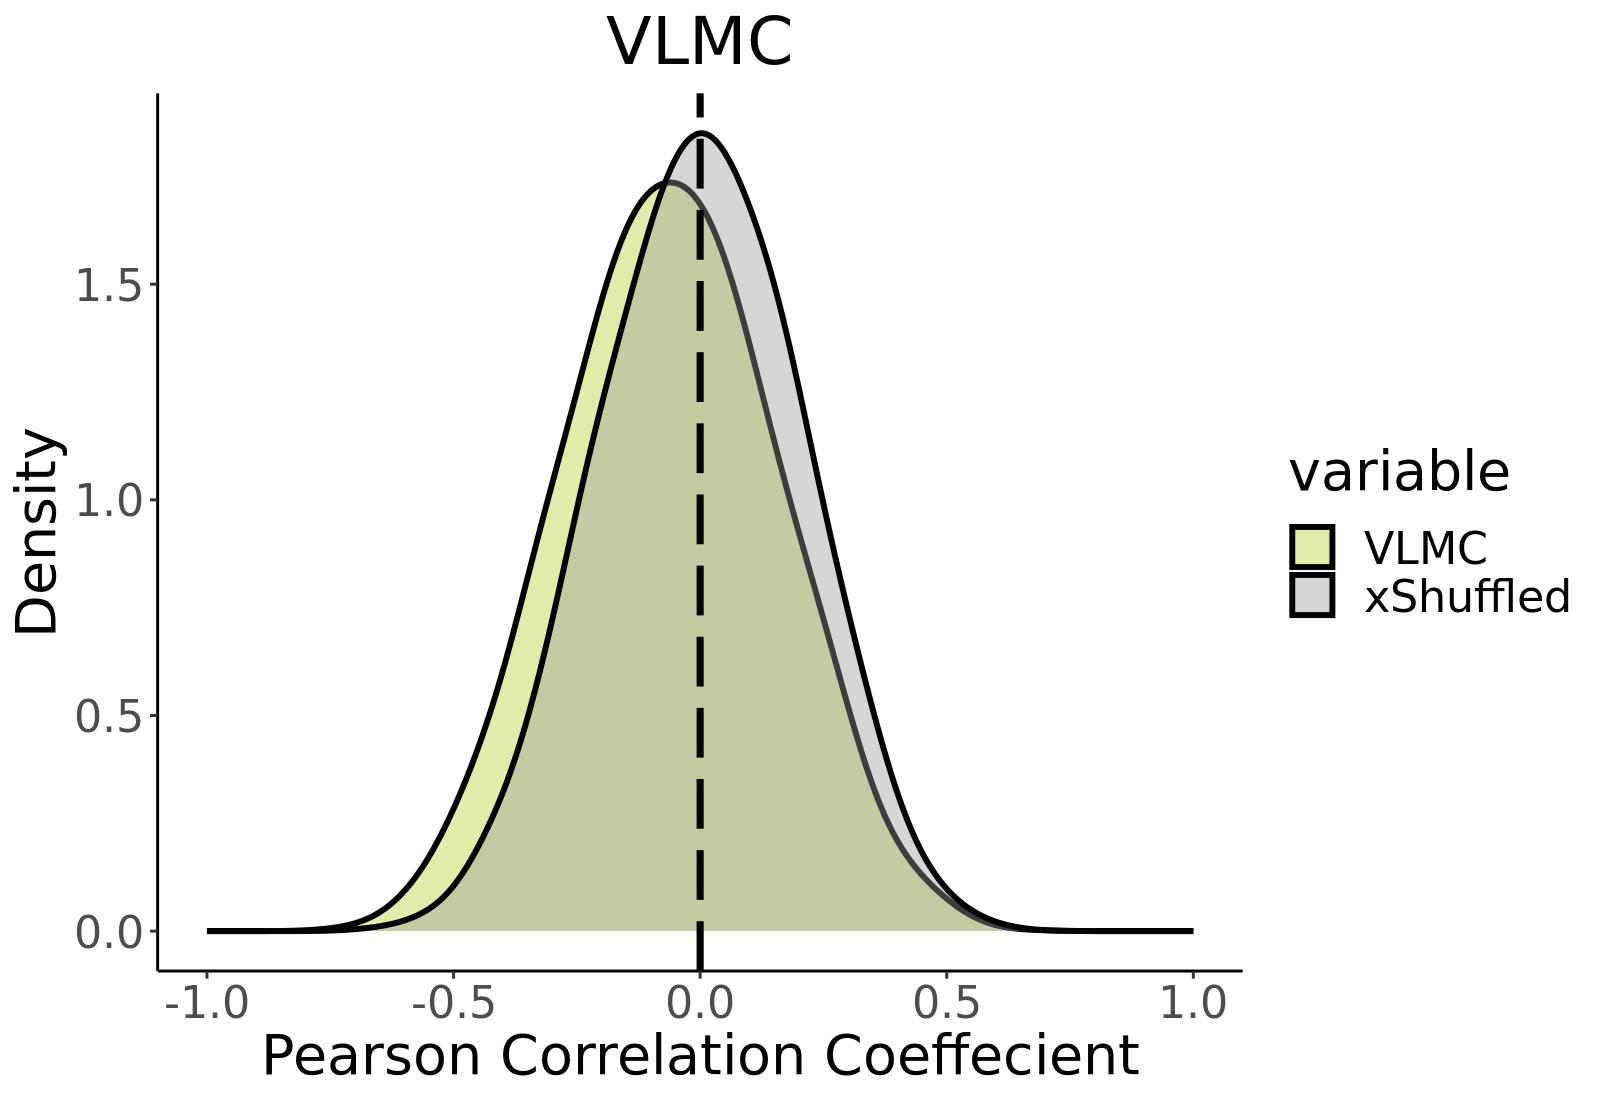

In [110]:
#Filled density plots
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
ggplot(data=comb, aes(x=cor, fill=variable)) +
geom_density(adjust=1.8, alpha=.4, size=1) +
scale_fill_manual(values=c("#B0D229","#999999")) +
geom_vline(xintercept=0, col="black", linetype="longdash", size=1.2) +
xlim(-1, 1) +
theme_classic() + labs(title=celltype, x ="Pearson Correlation Coeffecient", y = "Density") +
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))

In [111]:
output= foreach(i=1:nrow(cpm)) %dopar% {
pval = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$p.value
pval
}
pval = do.call(rbind,output)
pval = as.data.frame(pval)
colnames(pval) <- 'pval'
pval$fdr <- p.adjust(pval$pval, "fdr")

In [112]:
comb <- cbind(pcc, pval)
rownames(comb) <- rownames(cpm)

In [113]:
comb$log10fdr <- -log10(comb$fdr)
comb$Age_Correlated <- "No"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor > 0] <- "Up"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor < 0] <- "Down"

In [114]:
write.table(comb, file = paste0(celltype, '_pcc_donor_20k_counts_2x_donors.tsv'), sep = '\t')

In [115]:
comb <- comb[!grepl("No",comb$Age_Correlated),]
comb <- comb[sample(1:nrow(comb)), ]
#comb <- comb[order(comb$cor),]
comb <- comb[order(comb$Age_Correlated),]

In [116]:
write.table(comb, file = paste0(celltype, '_pcc_fdr_0.1.tsv'), sep = '\t')

In [117]:
comb$genes <- rownames(comb)
cpm$genes <- rownames(cpm)

In [118]:
comb <- join(comb, cpm, by = "genes")
comb[,1:7] <- NULL

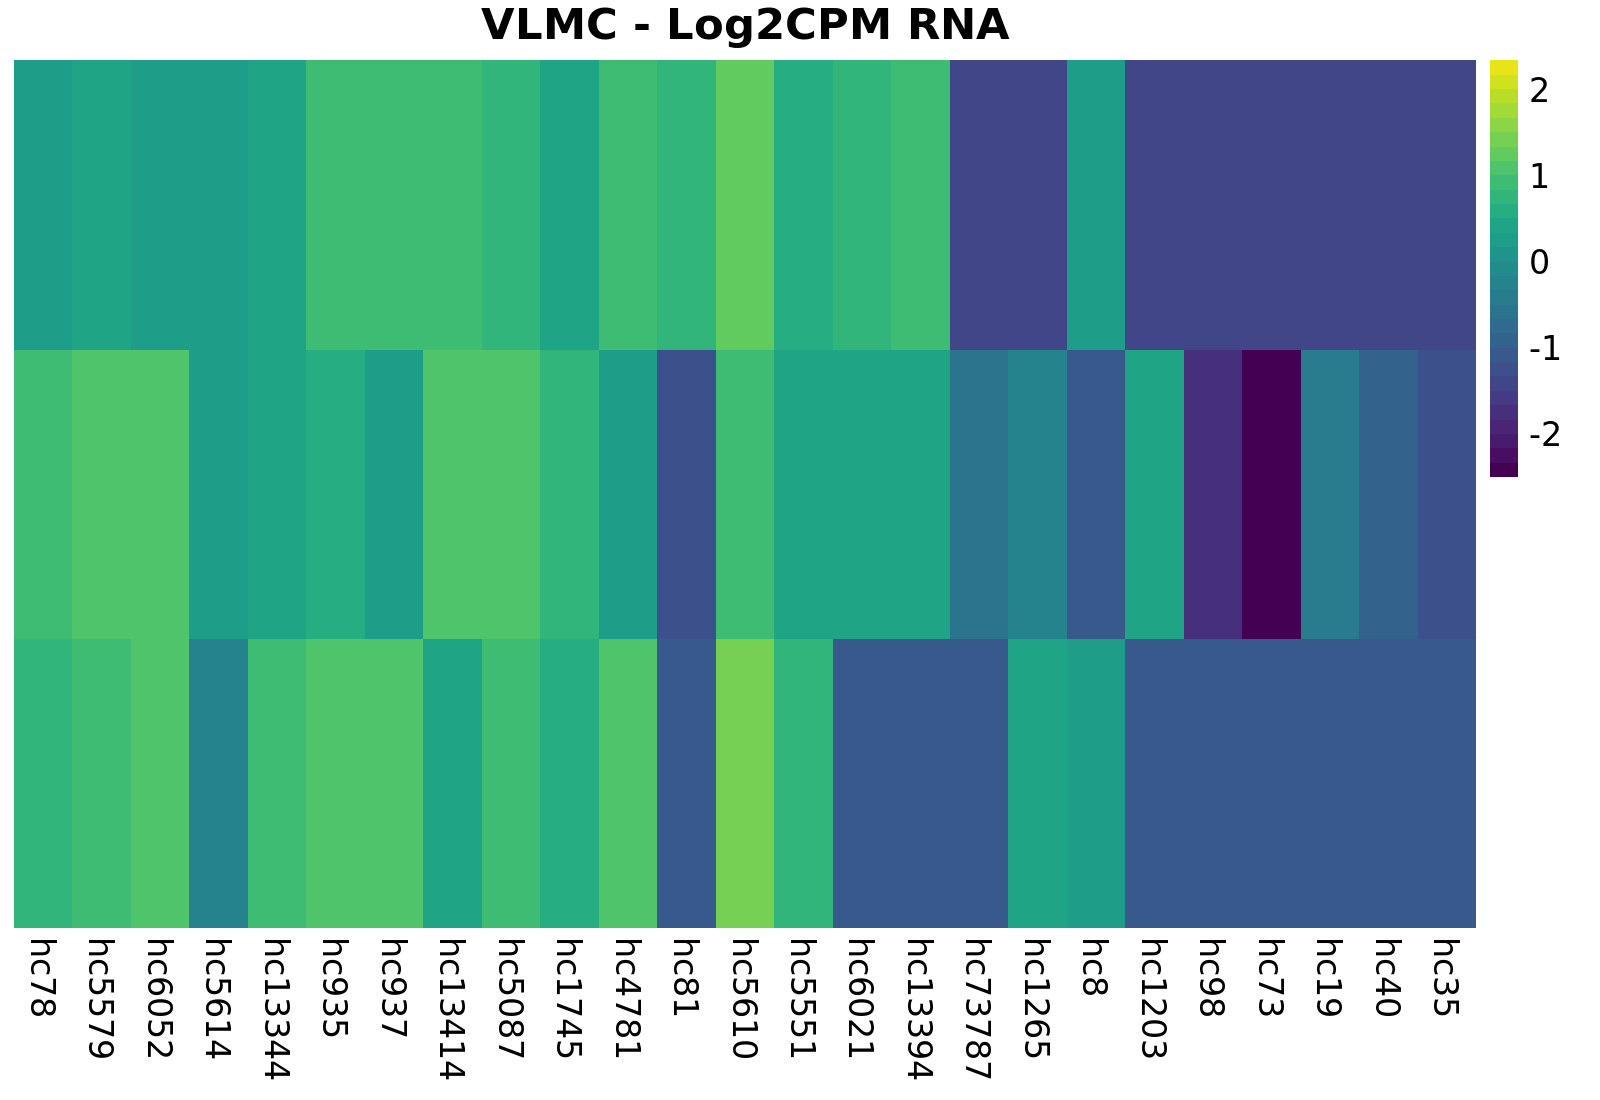

In [119]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
pheatmap(mat=comb, scale = 'row', color = viridis(30), breaks = seq(-2.5, 2.5, by = 0.166667), border_color = NA, 
         cluster_cols = F, cluster_rows = F, show_colnames = TRUE, show_rownames = FALSE, 
         fontsize = 12, main = paste0(celltype, " - Log2CPM RNA"))

In [120]:
celltype <- sprintf(cells[8])
cpm <- read.table(paste0('../rna_cpm/filtered_20k_donors_avg_2_counts_per_donor/', celltype, '_log2cpm_filtered.tsv', sep=''),
                  header=T, row.names=1)

In [121]:
age1 <- age[age$V1 %in% colnames(cpm),]
age1 <- t(age1[order(age1$V2),])
colnames(age1) <- as.matrix(age1[1,])
age1 <- age1[-1, ]
age1 <- t(age1)
age_mat <- age1[rep(seq_len(nrow(age1)), each = nrow(cpm)), ]
age_mat <- as.data.frame(age_mat)

In [122]:
# calculate spearman correlation 
output= foreach(i=1:nrow(cpm)) %dopar% {
pcc = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$estimate
pcc
}
# combine the list of output. 
pcc = do.call(rbind,output)

In [123]:
# calculate shuffled spearman correlation
cpm_shuf <- randomizeMatrix(cpm, null.model = "richness",iterations = 5000)
age_shuf <- randomizeMatrix(age_mat, null.model = "richness",iterations = 5000)

output_shuf= foreach(i=1:nrow(cpm_shuf)) %dopar% {
pcc_shuf = cor.test(as.numeric(cpm_shuf[i,]),as.numeric(age_shuf[i,]),method="pearson")$estimate
pcc_shuf
}
# combine the list of output. 
pcc_shuf = do.call(rbind,output_shuf)

In [124]:
pcc <- as.data.frame(pcc)
pcc_shuf <- as.data.frame(pcc_shuf)
pcc$variable <- paste0(celltype)
pcc_shuf$variable <- 'xShuffled'

In [125]:
comb <- rbind(pcc, pcc_shuf)

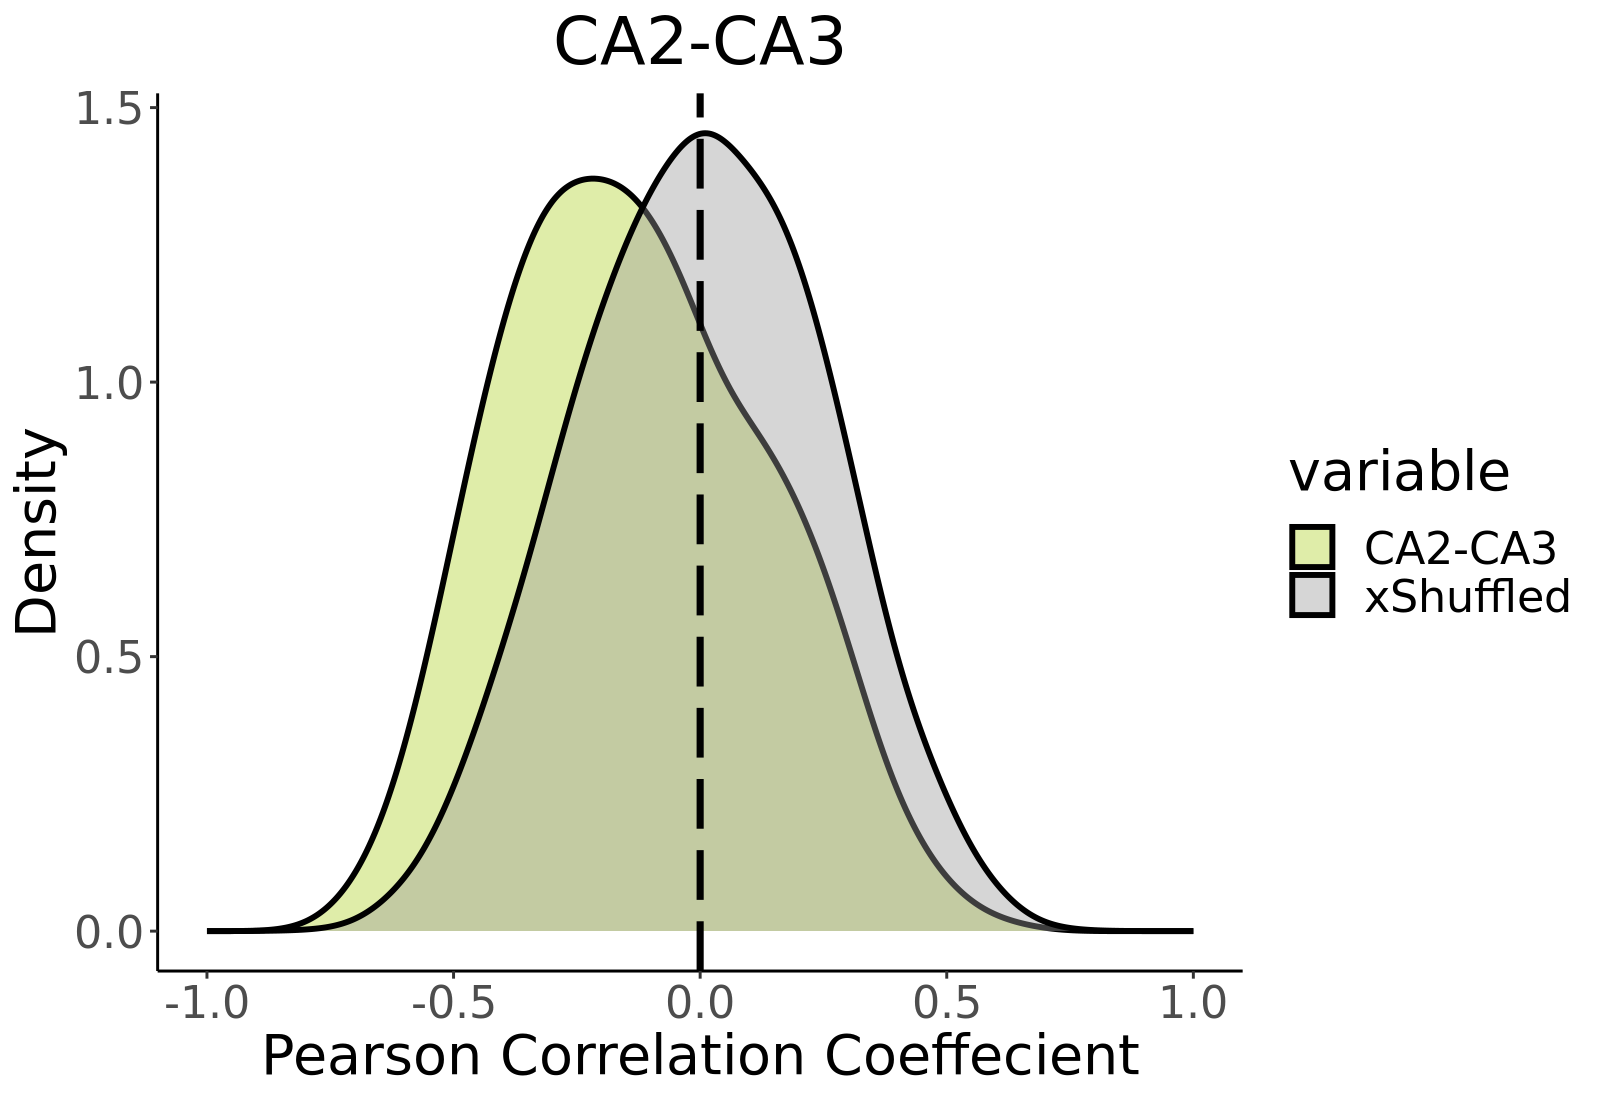

In [126]:
#Filled density plots
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
ggplot(data=comb, aes(x=cor, fill=variable)) +
geom_density(adjust=1.8, alpha=.4, size=1) +
scale_fill_manual(values=c("#B0D229","#999999")) +
geom_vline(xintercept=0, col="black", linetype="longdash", size=1.2) +
xlim(-1, 1) +
theme_classic() + labs(title=celltype, x ="Pearson Correlation Coeffecient", y = "Density") +
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))

In [127]:
output= foreach(i=1:nrow(cpm)) %dopar% {
pval = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$p.value
pval
}
pval = do.call(rbind,output)
pval = as.data.frame(pval)
colnames(pval) <- 'pval'
pval$fdr <- p.adjust(pval$pval, "fdr")

In [128]:
comb <- cbind(pcc, pval)
rownames(comb) <- rownames(cpm)

In [129]:
comb$log10fdr <- -log10(comb$fdr)
comb$Age_Correlated <- "No"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor > 0] <- "Up"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor < 0] <- "Down"

In [130]:
write.table(comb, file = paste0(celltype, '_pcc_donor_20k_counts_2x_donors.tsv'), sep = '\t')

In [131]:
comb <- comb[!grepl("No",comb$Age_Correlated),]
comb <- comb[sample(1:nrow(comb)), ]
#comb <- comb[order(comb$cor),]
comb <- comb[order(comb$Age_Correlated),]

In [132]:
write.table(comb, file = paste0(celltype, '_pcc_fdr_0.1.tsv'), sep = '\t')

In [133]:
comb$genes <- rownames(comb)
cpm$genes <- rownames(cpm)

In [134]:
comb <- join(comb, cpm, by = "genes")
comb[,1:7] <- NULL

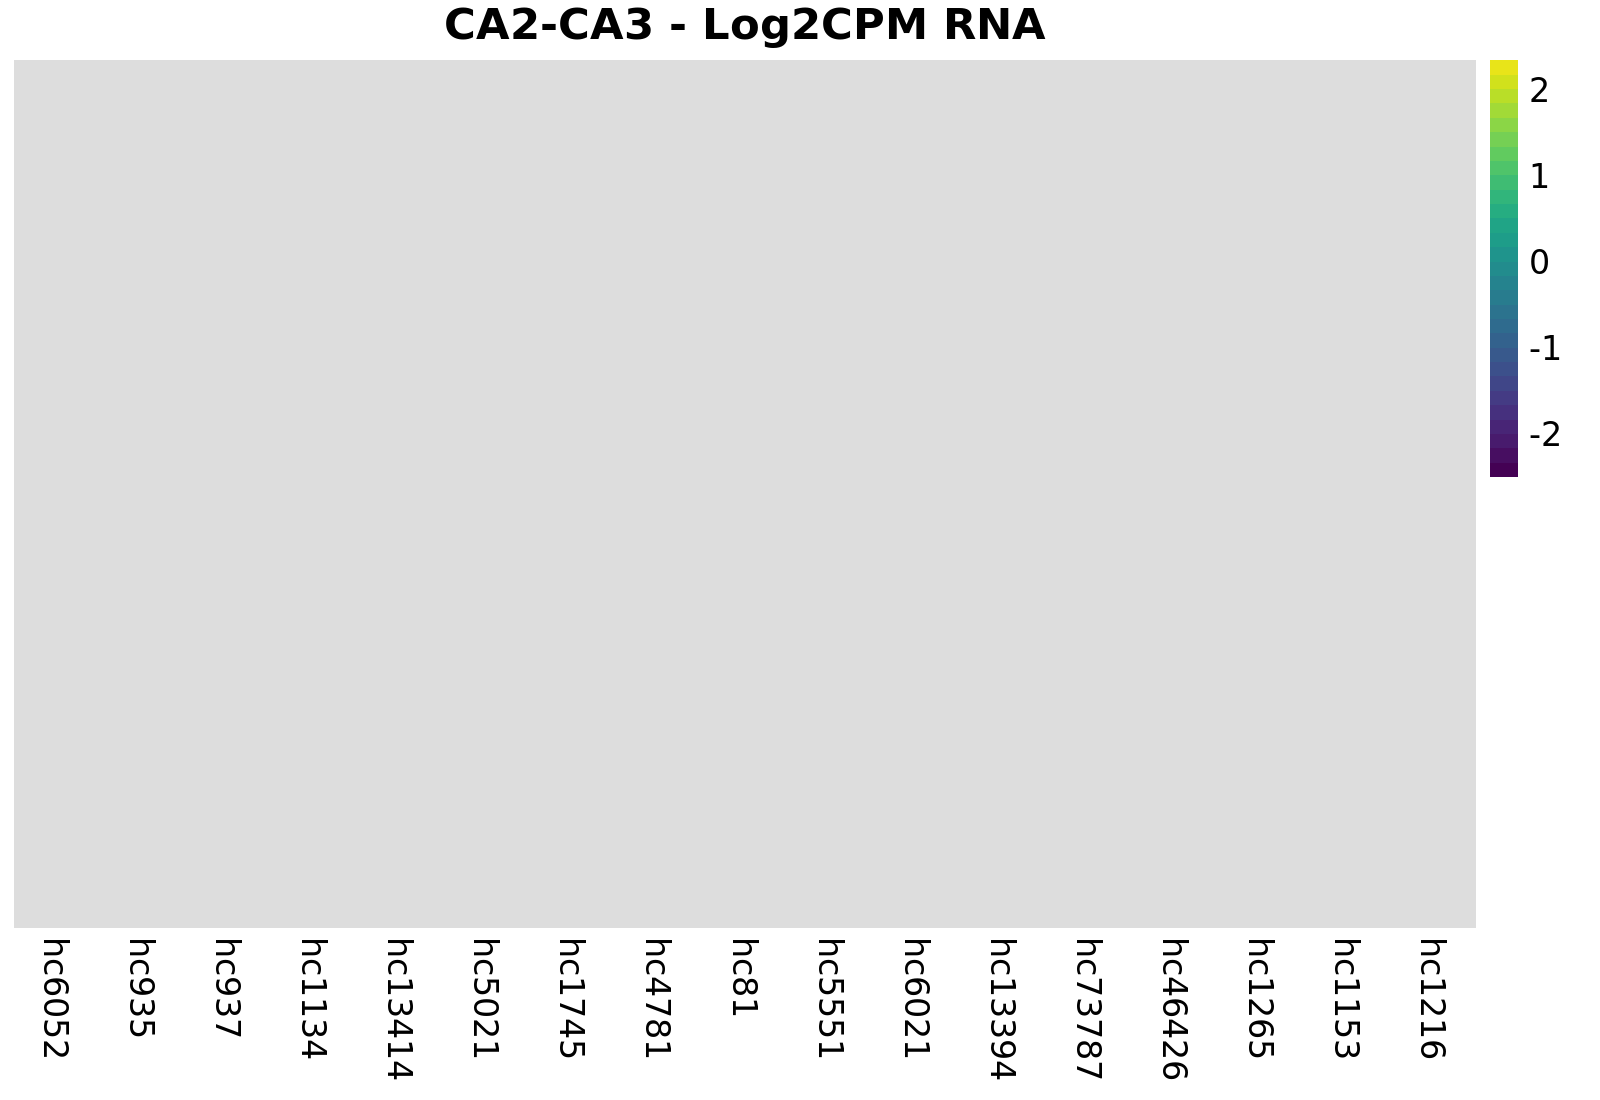

In [135]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
pheatmap(mat=comb, scale = 'row', color = viridis(30), breaks = seq(-2.5, 2.5, by = 0.166667), border_color = NA, 
         cluster_cols = F, cluster_rows = F, show_colnames = TRUE, show_rownames = FALSE, 
         fontsize = 12, main = paste0(celltype, " - Log2CPM RNA"))

In [136]:
celltype <- sprintf(cells[9])
cpm <- read.table(paste0('../rna_cpm/filtered_20k_donors_avg_2_counts_per_donor/', celltype, '_log2cpm_filtered.tsv', sep=''),
                  header=T, row.names=1)

In [137]:
age1 <- age[age$V1 %in% colnames(cpm),]
age1 <- t(age1[order(age1$V2),])
colnames(age1) <- as.matrix(age1[1,])
age1 <- age1[-1, ]
age1 <- t(age1)
age_mat <- age1[rep(seq_len(nrow(age1)), each = nrow(cpm)), ]
age_mat <- as.data.frame(age_mat)

In [138]:
# calculate spearman correlation 
output= foreach(i=1:nrow(cpm)) %dopar% {
pcc = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$estimate
pcc
}
# combine the list of output. 
pcc = do.call(rbind,output)

In [139]:
# calculate shuffled spearman correlation
cpm_shuf <- randomizeMatrix(cpm, null.model = "richness",iterations = 5000)
age_shuf <- randomizeMatrix(age_mat, null.model = "richness",iterations = 5000)

output_shuf= foreach(i=1:nrow(cpm_shuf)) %dopar% {
pcc_shuf = cor.test(as.numeric(cpm_shuf[i,]),as.numeric(age_shuf[i,]),method="pearson")$estimate
pcc_shuf
}
# combine the list of output. 
pcc_shuf = do.call(rbind,output_shuf)

In [140]:
pcc <- as.data.frame(pcc)
pcc_shuf <- as.data.frame(pcc_shuf)
pcc$variable <- paste0(celltype)
pcc_shuf$variable <- 'xShuffled'

In [141]:
comb <- rbind(pcc, pcc_shuf)

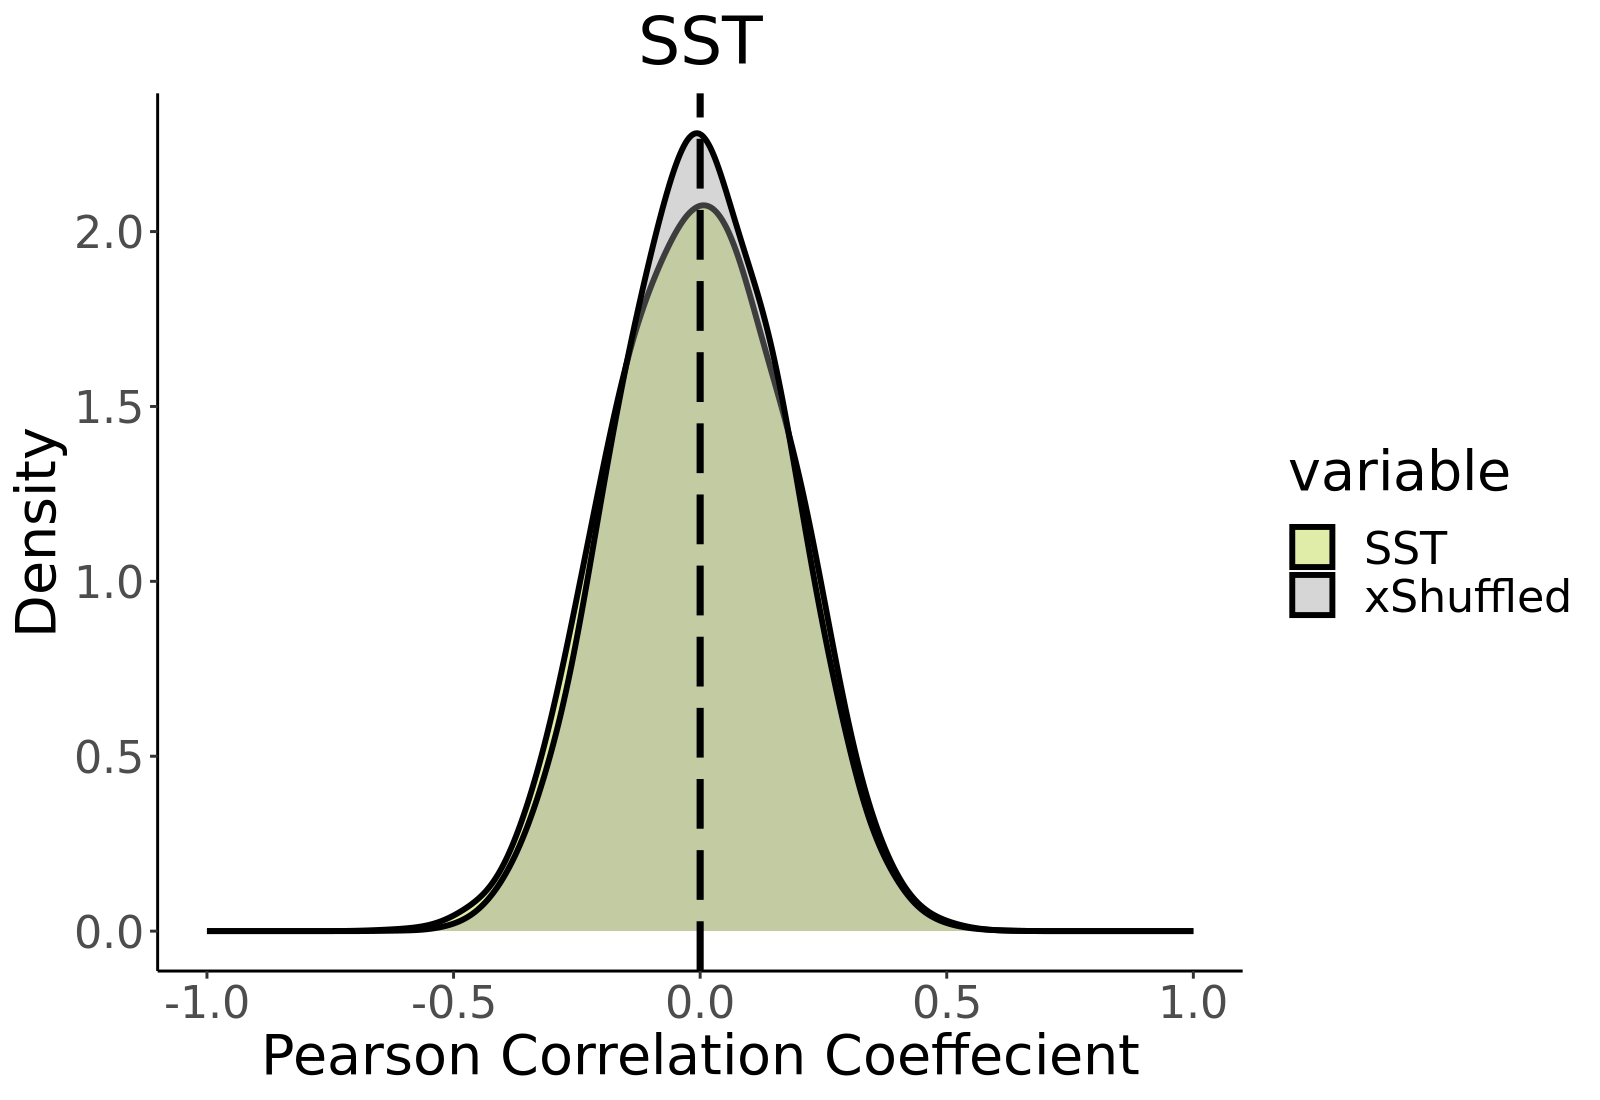

In [142]:
#Filled density plots
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
ggplot(data=comb, aes(x=cor, fill=variable)) +
geom_density(adjust=1.8, alpha=.4, size=1) +
scale_fill_manual(values=c("#B0D229","#999999")) +
geom_vline(xintercept=0, col="black", linetype="longdash", size=1.2) +
xlim(-1, 1) +
theme_classic() + labs(title=celltype, x ="Pearson Correlation Coeffecient", y = "Density") +
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))

In [143]:
output= foreach(i=1:nrow(cpm)) %dopar% {
pval = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$p.value
pval
}
pval = do.call(rbind,output)
pval = as.data.frame(pval)
colnames(pval) <- 'pval'
pval$fdr <- p.adjust(pval$pval, "fdr")

In [144]:
comb <- cbind(pcc, pval)
rownames(comb) <- rownames(cpm)

In [145]:
comb$log10fdr <- -log10(comb$fdr)
comb$Age_Correlated <- "No"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor > 0] <- "Up"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor < 0] <- "Down"

In [146]:
write.table(comb, file = paste0(celltype, '_pcc_donor_20k_counts_2x_donors.tsv'), sep = '\t')

In [147]:
comb <- comb[!grepl("No",comb$Age_Correlated),]
comb <- comb[sample(1:nrow(comb)), ]
#comb <- comb[order(comb$cor),]
comb <- comb[order(comb$Age_Correlated),]

In [148]:
write.table(comb, file = paste0(celltype, '_pcc_fdr_0.1.tsv'), sep = '\t')

In [149]:
comb$genes <- rownames(comb)
cpm$genes <- rownames(cpm)

In [150]:
comb <- join(comb, cpm, by = "genes")
comb[,1:7] <- NULL

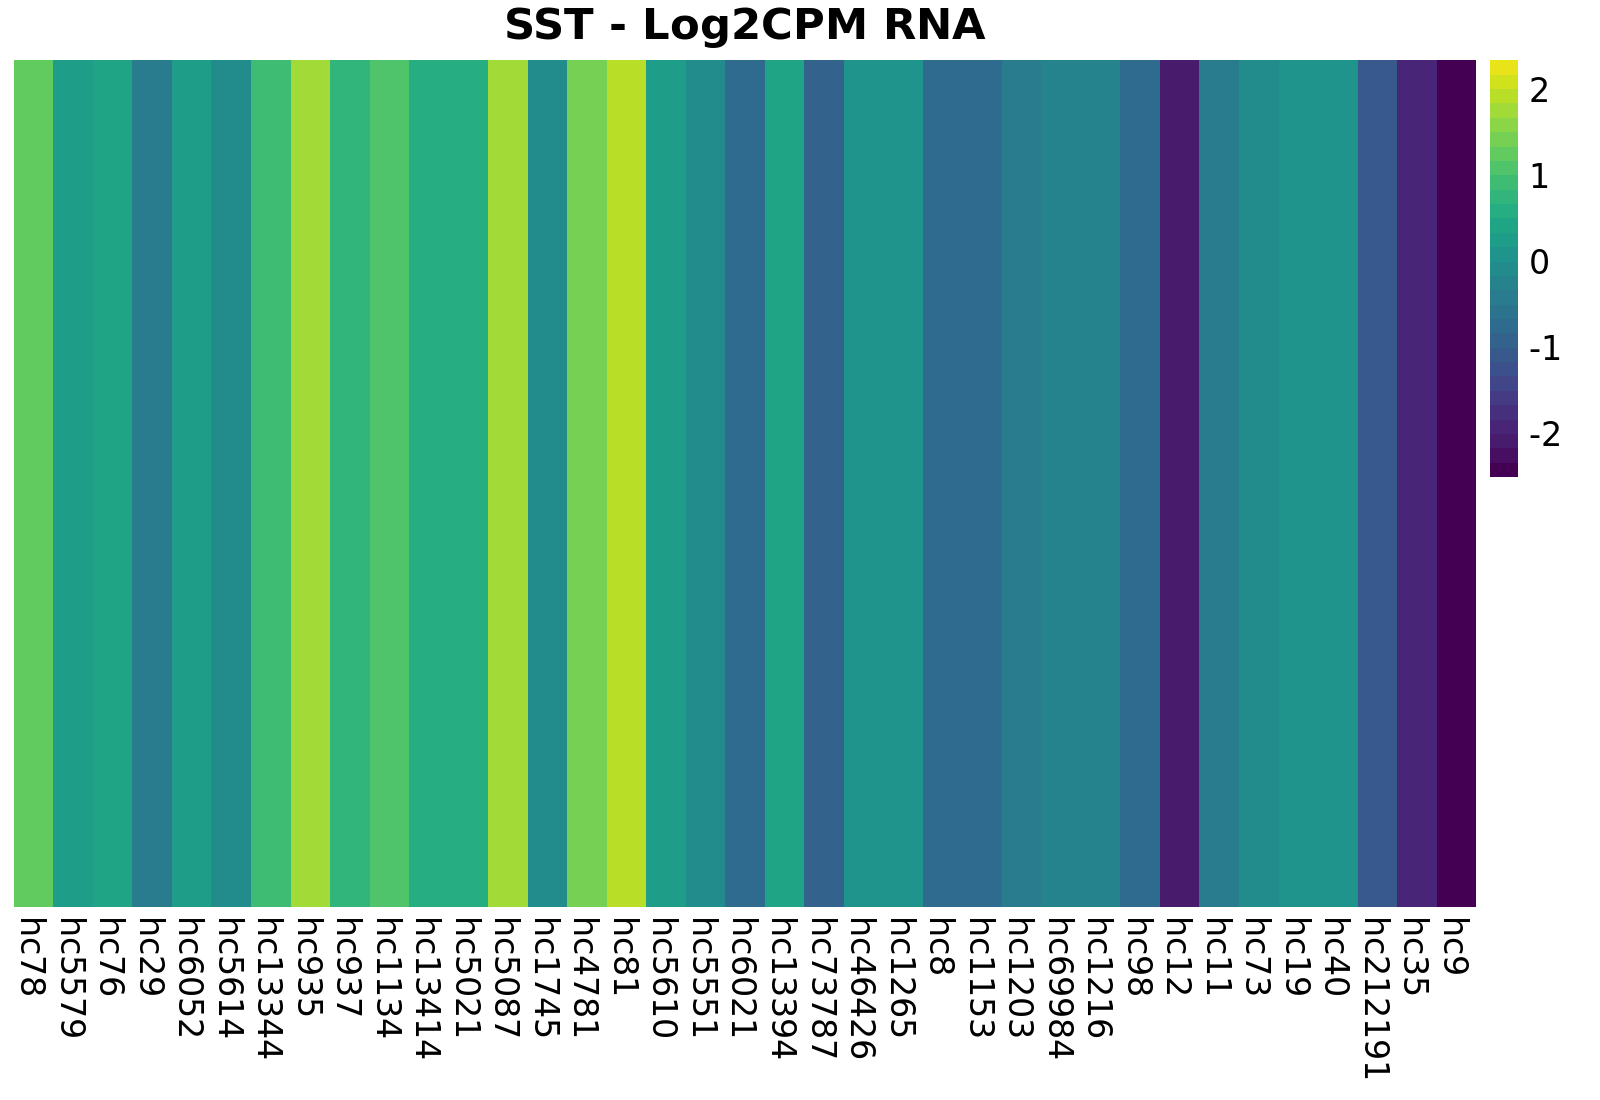

In [151]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
pheatmap(mat=comb, scale = 'row', color = viridis(30), breaks = seq(-2.5, 2.5, by = 0.166667), border_color = NA, 
         cluster_cols = F, cluster_rows = F, show_colnames = TRUE, show_rownames = FALSE, 
         fontsize = 12, main = paste0(celltype, " - Log2CPM RNA"))

In [152]:
celltype <- sprintf(cells[10])
cpm <- read.table(paste0('../rna_cpm/filtered_20k_donors_avg_2_counts_per_donor/', celltype, '_log2cpm_filtered.tsv', sep=''),
                  header=T, row.names=1)

In [153]:
age1 <- age[age$V1 %in% colnames(cpm),]
age1 <- t(age1[order(age1$V2),])
colnames(age1) <- as.matrix(age1[1,])
age1 <- age1[-1, ]
age1 <- t(age1)
age_mat <- age1[rep(seq_len(nrow(age1)), each = nrow(cpm)), ]
age_mat <- as.data.frame(age_mat)

In [154]:
# calculate spearman correlation 
output= foreach(i=1:nrow(cpm)) %dopar% {
pcc = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$estimate
pcc
}
# combine the list of output. 
pcc = do.call(rbind,output)

In [155]:
# calculate shuffled spearman correlation
cpm_shuf <- randomizeMatrix(cpm, null.model = "richness",iterations = 5000)
age_shuf <- randomizeMatrix(age_mat, null.model = "richness",iterations = 5000)

output_shuf= foreach(i=1:nrow(cpm_shuf)) %dopar% {
pcc_shuf = cor.test(as.numeric(cpm_shuf[i,]),as.numeric(age_shuf[i,]),method="pearson")$estimate
pcc_shuf
}
# combine the list of output. 
pcc_shuf = do.call(rbind,output_shuf)

In [156]:
pcc <- as.data.frame(pcc)
pcc_shuf <- as.data.frame(pcc_shuf)
pcc$variable <- paste0(celltype)
pcc_shuf$variable <- 'xShuffled'

In [157]:
comb <- rbind(pcc, pcc_shuf)

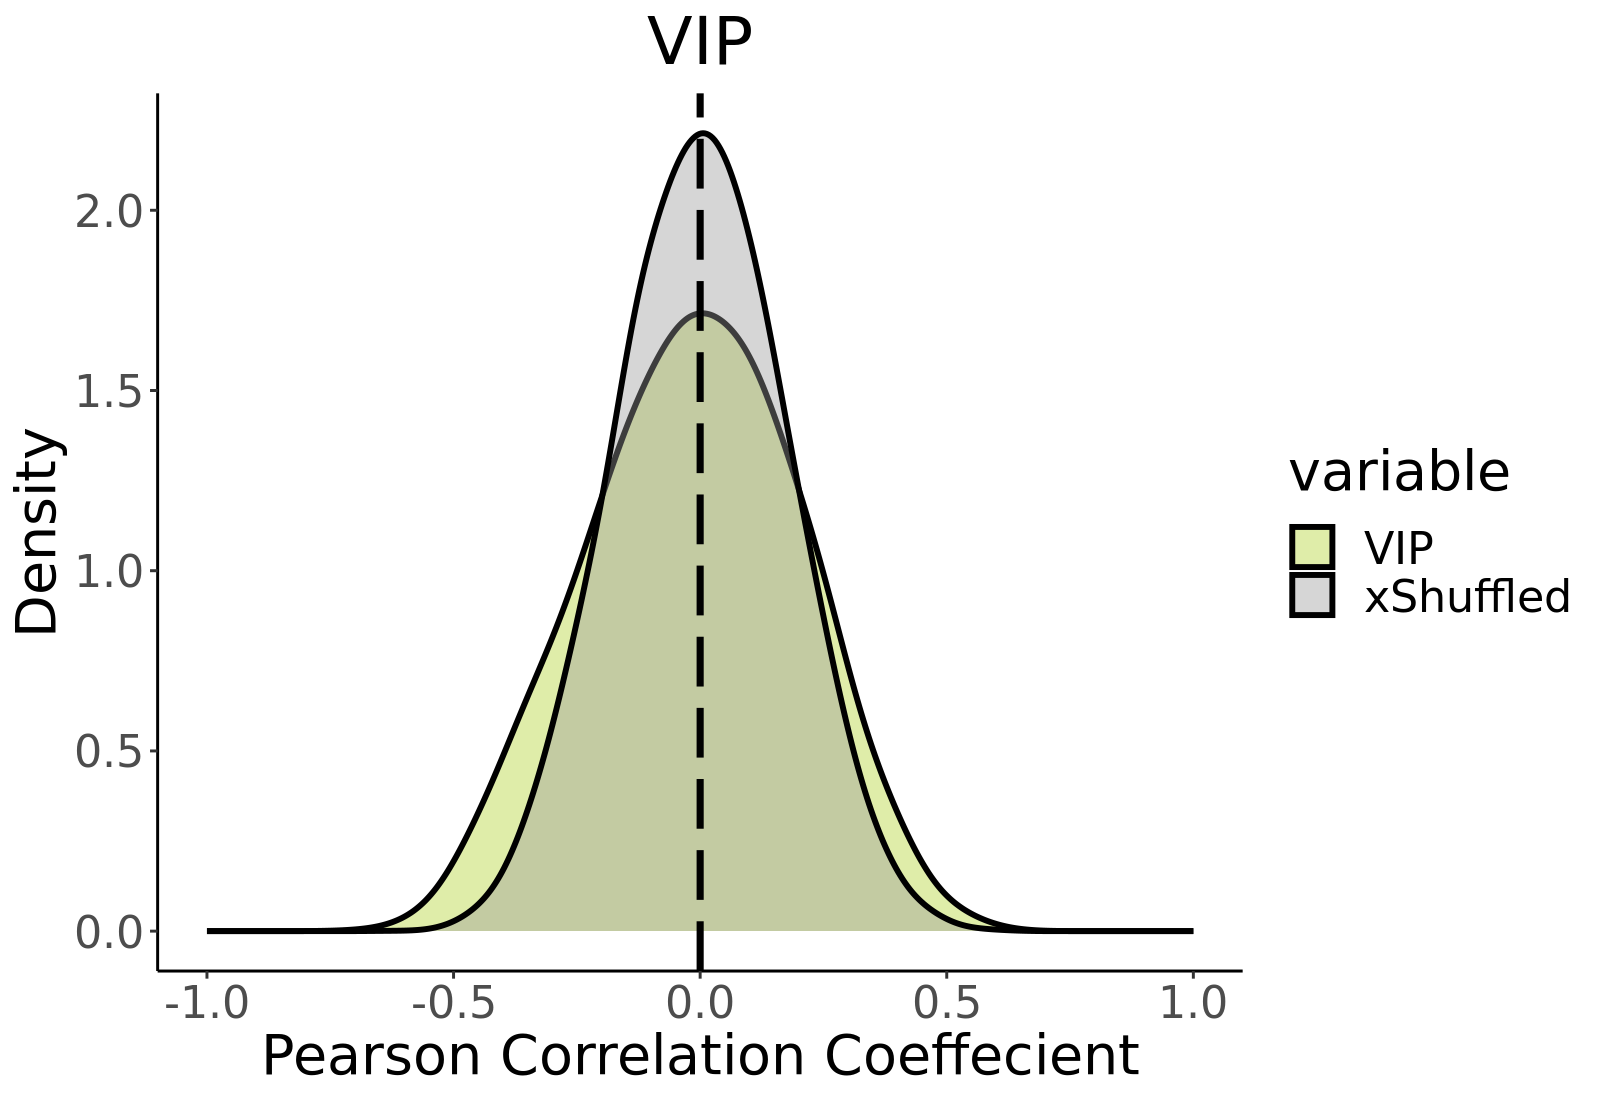

In [158]:
#Filled density plots
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
ggplot(data=comb, aes(x=cor, fill=variable)) +
geom_density(adjust=1.8, alpha=.4, size=1) +
scale_fill_manual(values=c("#B0D229","#999999")) +
geom_vline(xintercept=0, col="black", linetype="longdash", size=1.2) +
xlim(-1, 1) +
theme_classic() + labs(title=celltype, x ="Pearson Correlation Coeffecient", y = "Density") +
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))

In [159]:
output= foreach(i=1:nrow(cpm)) %dopar% {
pval = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$p.value
pval
}
pval = do.call(rbind,output)
pval = as.data.frame(pval)
colnames(pval) <- 'pval'
pval$fdr <- p.adjust(pval$pval, "fdr")

In [160]:
comb <- cbind(pcc, pval)
rownames(comb) <- rownames(cpm)

In [161]:
comb$log10fdr <- -log10(comb$fdr)
comb$Age_Correlated <- "No"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor > 0] <- "Up"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor < 0] <- "Down"

In [162]:
write.table(comb, file = paste0(celltype, '_pcc_donor_20k_counts_2x_donors.tsv'), sep = '\t')

In [163]:
comb <- comb[!grepl("No",comb$Age_Correlated),]
comb <- comb[sample(1:nrow(comb)), ]
#comb <- comb[order(comb$cor),]
comb <- comb[order(comb$Age_Correlated),]

In [164]:
write.table(comb, file = paste0(celltype, '_pcc_fdr_0.1.tsv'), sep = '\t')

In [165]:
comb$genes <- rownames(comb)
cpm$genes <- rownames(cpm)

In [166]:
comb <- join(comb, cpm, by = "genes")
comb[,1:7] <- NULL

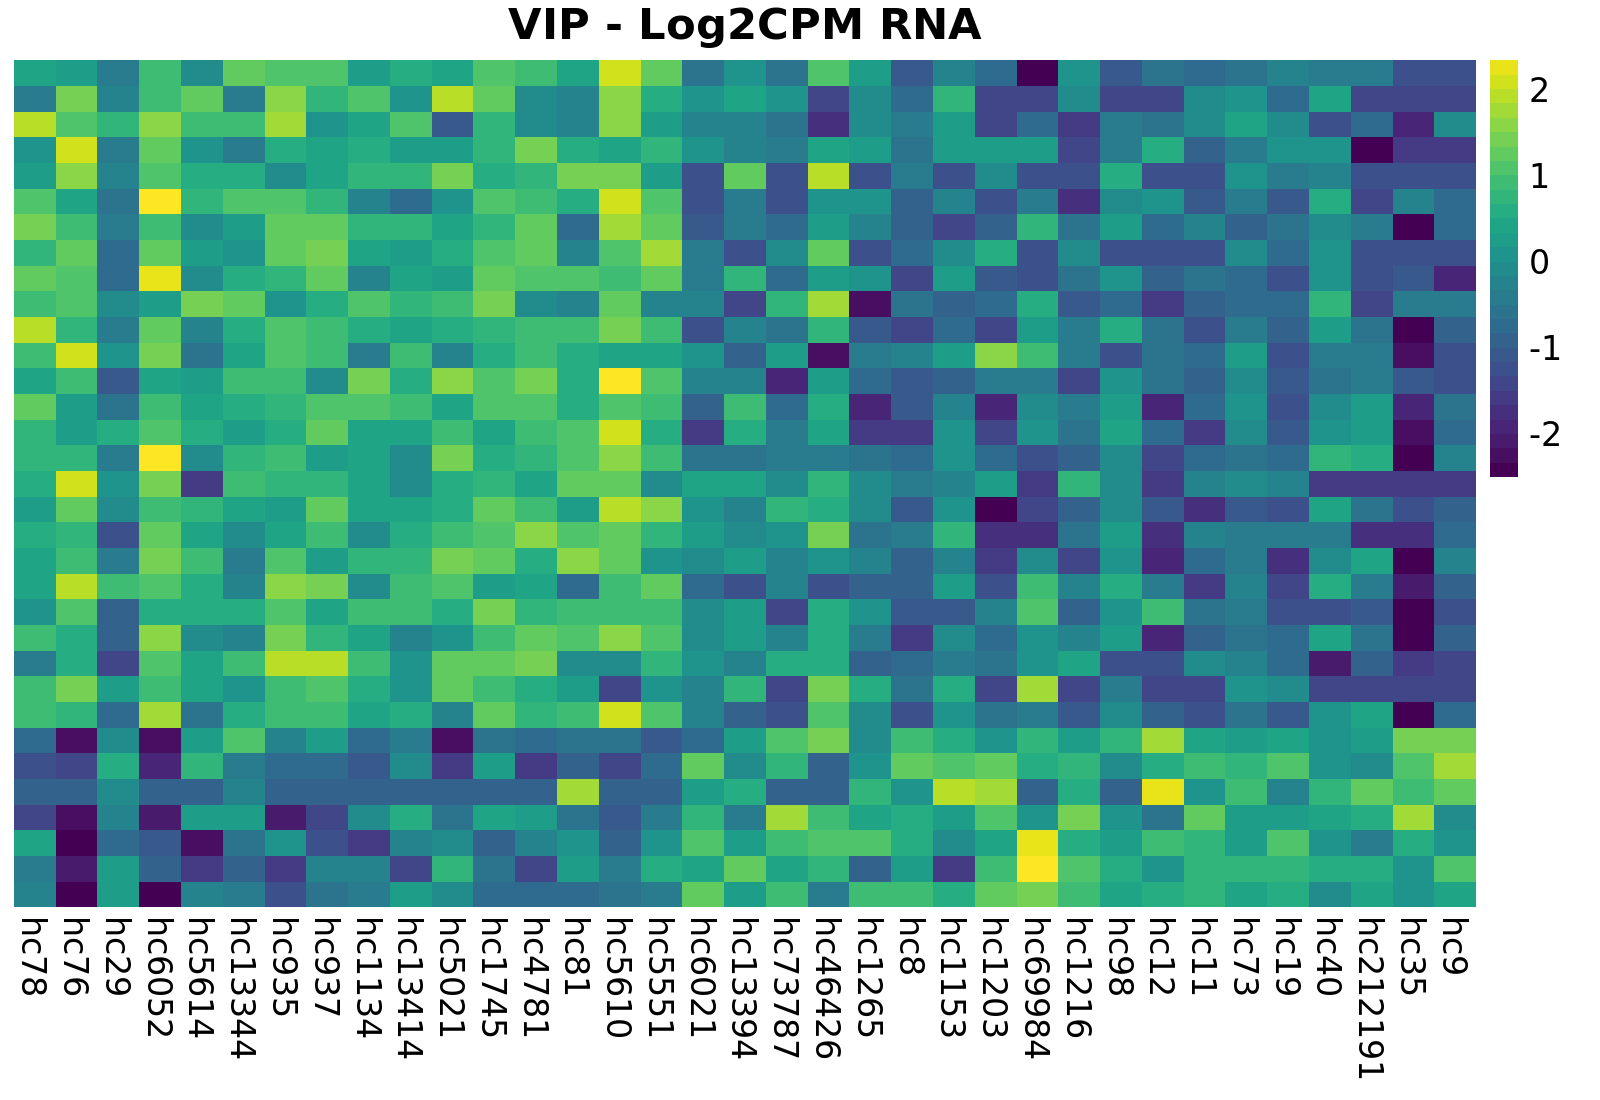

In [167]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
pheatmap(mat=comb, scale = 'row', color = viridis(30), breaks = seq(-2.5, 2.5, by = 0.166667), border_color = NA, 
         cluster_cols = F, cluster_rows = F, show_colnames = TRUE, show_rownames = FALSE, 
         fontsize = 12, main = paste0(celltype, " - Log2CPM RNA"))

In [168]:
celltype <- sprintf(cells[11])
cpm <- read.table(paste0('../rna_cpm/filtered_20k_donors_avg_2_counts_per_donor/', celltype, '_log2cpm_filtered.tsv', sep=''),
                  header=T, row.names=1)

In [169]:
age1 <- age[age$V1 %in% colnames(cpm),]
age1 <- t(age1[order(age1$V2),])
colnames(age1) <- as.matrix(age1[1,])
age1 <- age1[-1, ]
age1 <- t(age1)
age_mat <- age1[rep(seq_len(nrow(age1)), each = nrow(cpm)), ]
age_mat <- as.data.frame(age_mat)

In [170]:
# calculate spearman correlation 
output= foreach(i=1:nrow(cpm)) %dopar% {
pcc = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$estimate
pcc
}
# combine the list of output. 
pcc = do.call(rbind,output)

In [171]:
# calculate shuffled spearman correlation
cpm_shuf <- randomizeMatrix(cpm, null.model = "richness",iterations = 5000)
age_shuf <- randomizeMatrix(age_mat, null.model = "richness",iterations = 5000)

output_shuf= foreach(i=1:nrow(cpm_shuf)) %dopar% {
pcc_shuf = cor.test(as.numeric(cpm_shuf[i,]),as.numeric(age_shuf[i,]),method="pearson")$estimate
pcc_shuf
}
# combine the list of output. 
pcc_shuf = do.call(rbind,output_shuf)

In [172]:
pcc <- as.data.frame(pcc)
pcc_shuf <- as.data.frame(pcc_shuf)
pcc$variable <- paste0(celltype)
pcc_shuf$variable <- 'xShuffled'

In [173]:
comb <- rbind(pcc, pcc_shuf)

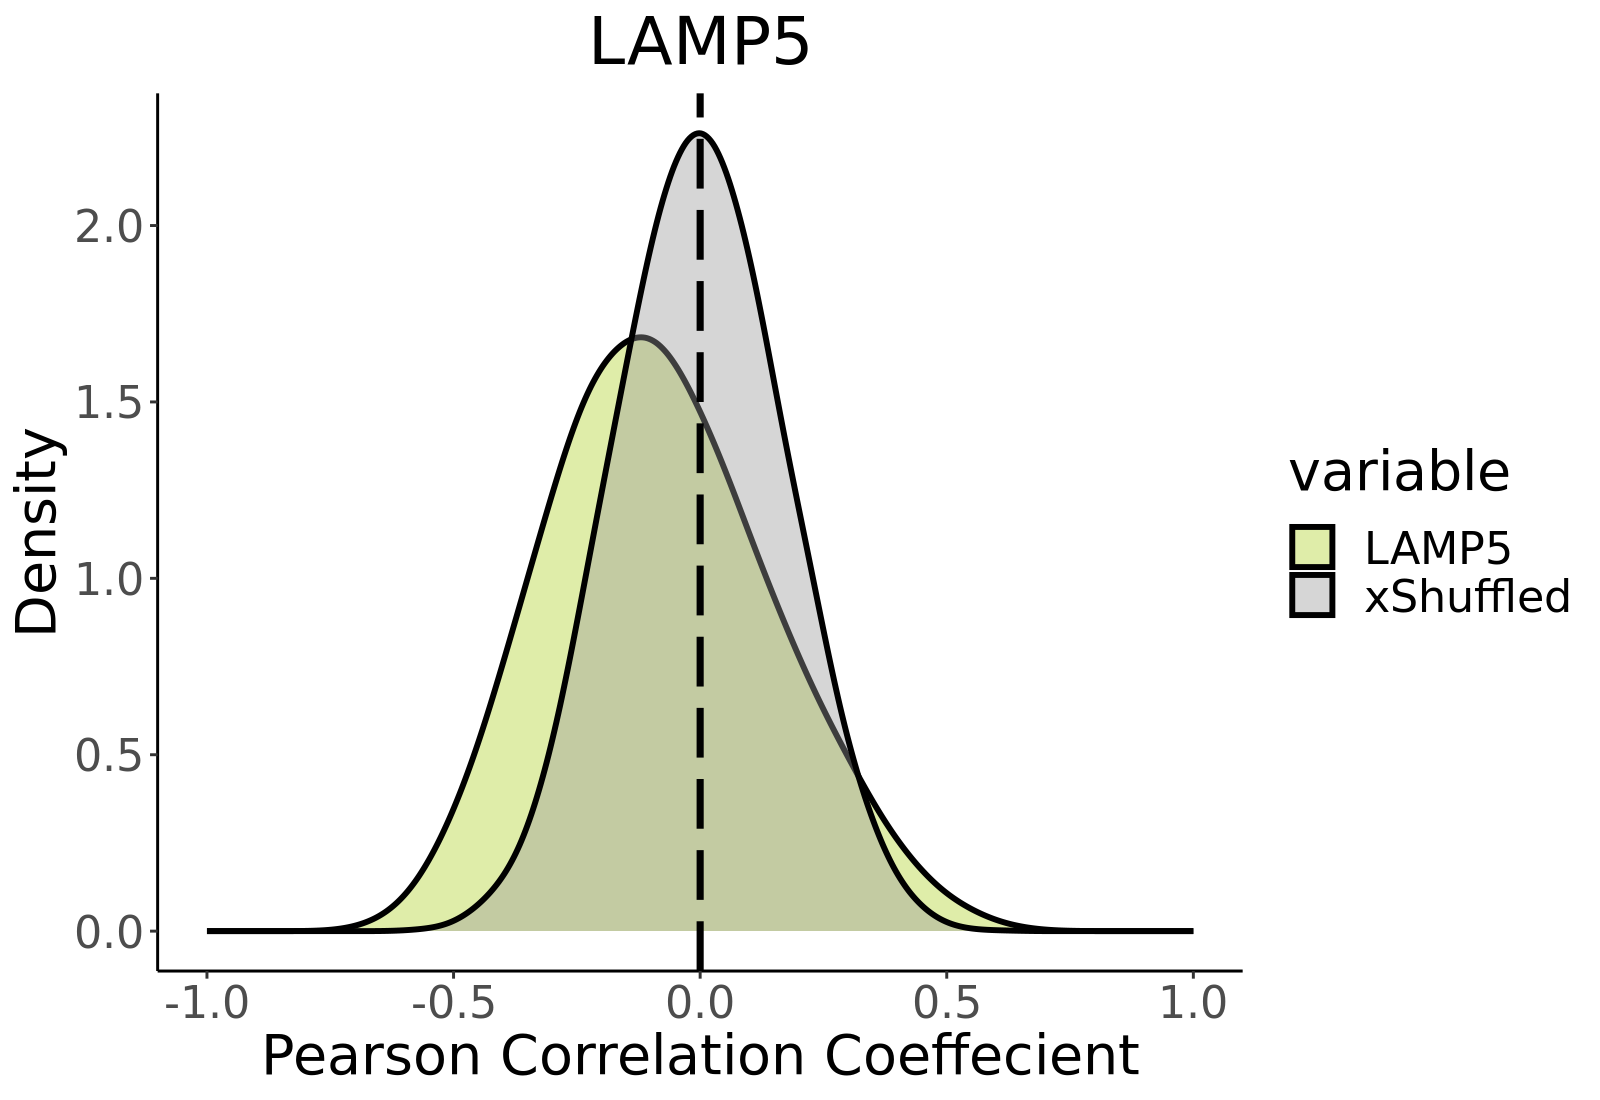

In [174]:
#Filled density plots
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
ggplot(data=comb, aes(x=cor, fill=variable)) +
geom_density(adjust=1.8, alpha=.4, size=1) +
scale_fill_manual(values=c("#B0D229","#999999")) +
geom_vline(xintercept=0, col="black", linetype="longdash", size=1.2) +
xlim(-1, 1) +
theme_classic() + labs(title=celltype, x ="Pearson Correlation Coeffecient", y = "Density") +
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))

In [175]:
output= foreach(i=1:nrow(cpm)) %dopar% {
pval = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$p.value
pval
}
pval = do.call(rbind,output)
pval = as.data.frame(pval)
colnames(pval) <- 'pval'
pval$fdr <- p.adjust(pval$pval, "fdr")

In [176]:
comb <- cbind(pcc, pval)
rownames(comb) <- rownames(cpm)

In [177]:
comb$log10fdr <- -log10(comb$fdr)
comb$Age_Correlated <- "No"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor > 0] <- "Up"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor < 0] <- "Down"

In [178]:
write.table(comb, file = paste0(celltype, '_pcc_donor_20k_counts_2x_donors.tsv'), sep = '\t')

In [179]:
comb <- comb[!grepl("No",comb$Age_Correlated),]
comb <- comb[sample(1:nrow(comb)), ]
#comb <- comb[order(comb$cor),]
comb <- comb[order(comb$Age_Correlated),]

In [180]:
write.table(comb, file = paste0(celltype, '_pcc_fdr_0.1.tsv'), sep = '\t')

In [181]:
comb$genes <- rownames(comb)
cpm$genes <- rownames(cpm)

In [182]:
comb <- join(comb, cpm, by = "genes")
comb[,1:7] <- NULL

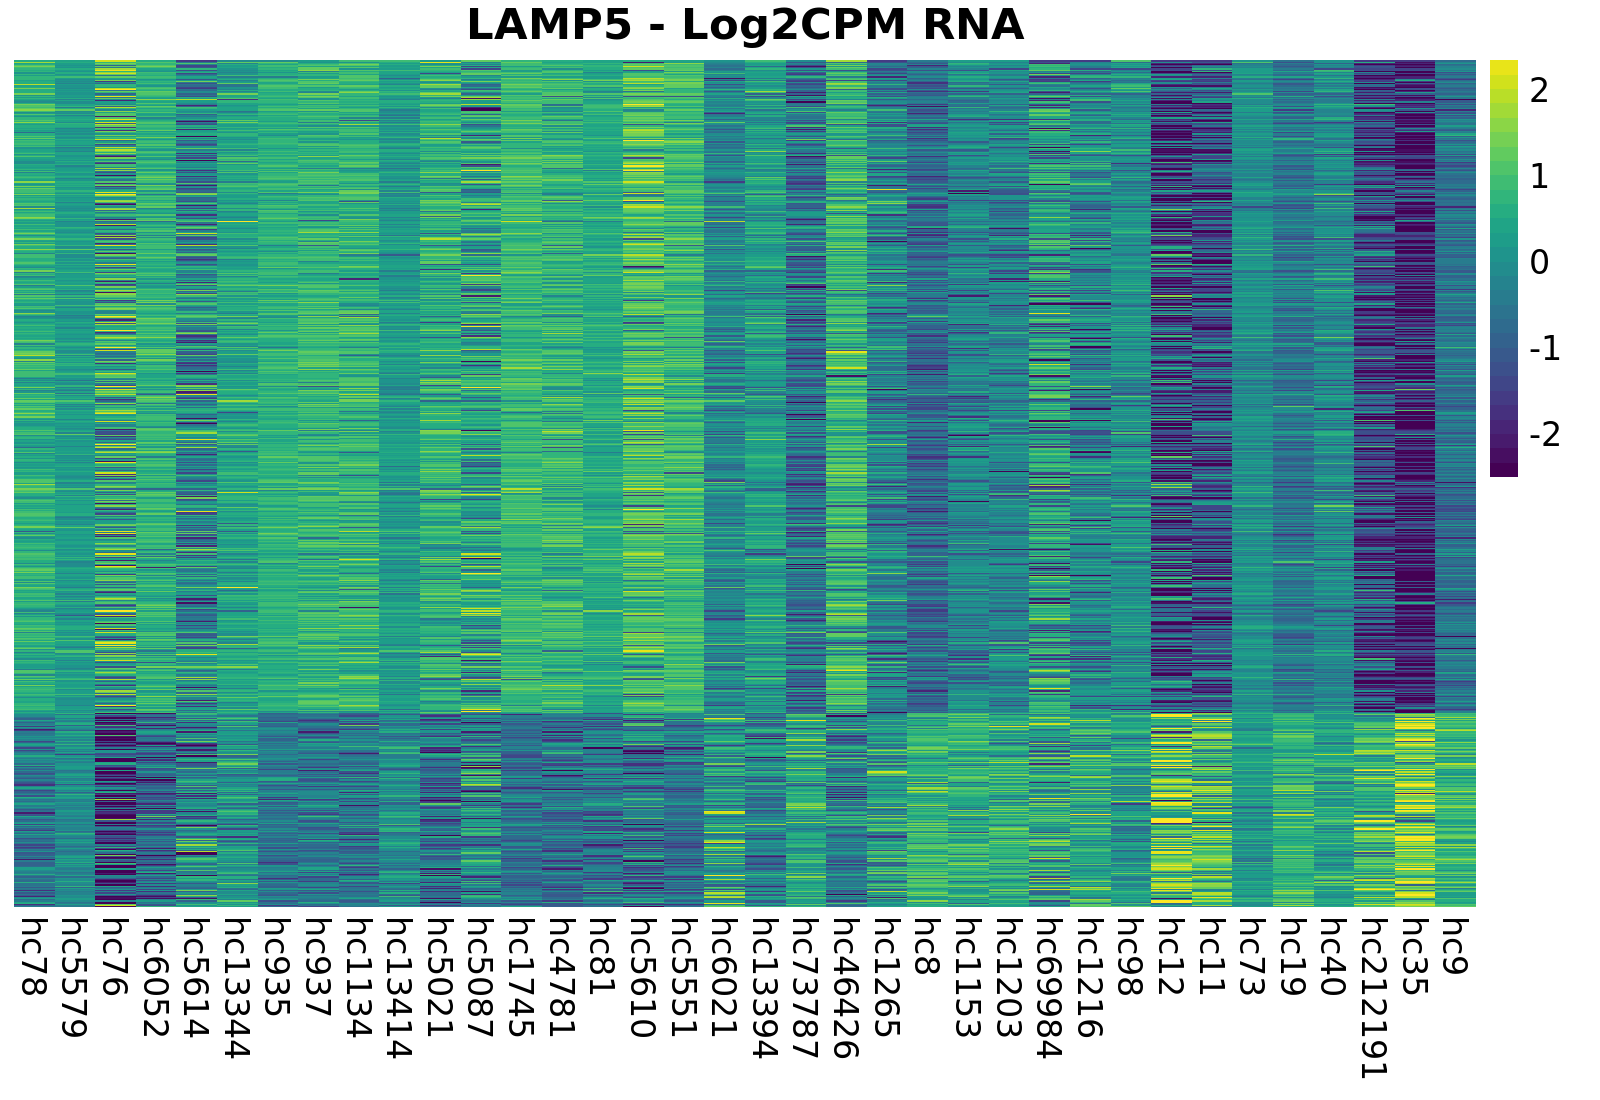

In [183]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
pheatmap(mat=comb, scale = 'row', color = viridis(30), breaks = seq(-2.5, 2.5, by = 0.166667), border_color = NA, 
         cluster_cols = F, cluster_rows = F, show_colnames = TRUE, show_rownames = FALSE, 
         fontsize = 12, main = paste0(celltype, " - Log2CPM RNA"))

In [184]:
celltype <- sprintf(cells[12])
cpm <- read.table(paste0('../rna_cpm/filtered_20k_donors_avg_2_counts_per_donor/', celltype, '_log2cpm_filtered.tsv', sep=''),
                  header=T, row.names=1)

In [185]:
age1 <- age[age$V1 %in% colnames(cpm),]
age1 <- t(age1[order(age1$V2),])
colnames(age1) <- as.matrix(age1[1,])
age1 <- age1[-1, ]
age1 <- t(age1)
age_mat <- age1[rep(seq_len(nrow(age1)), each = nrow(cpm)), ]
age_mat <- as.data.frame(age_mat)

In [186]:
# calculate spearman correlation 
output= foreach(i=1:nrow(cpm)) %dopar% {
pcc = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$estimate
pcc
}
# combine the list of output. 
pcc = do.call(rbind,output)

In [187]:
# calculate shuffled spearman correlation
cpm_shuf <- randomizeMatrix(cpm, null.model = "richness",iterations = 5000)
age_shuf <- randomizeMatrix(age_mat, null.model = "richness",iterations = 5000)

output_shuf= foreach(i=1:nrow(cpm_shuf)) %dopar% {
pcc_shuf = cor.test(as.numeric(cpm_shuf[i,]),as.numeric(age_shuf[i,]),method="pearson")$estimate
pcc_shuf
}
# combine the list of output. 
pcc_shuf = do.call(rbind,output_shuf)

In [188]:
pcc <- as.data.frame(pcc)
pcc_shuf <- as.data.frame(pcc_shuf)
pcc$variable <- paste0(celltype)
pcc_shuf$variable <- 'xShuffled'

In [189]:
comb <- rbind(pcc, pcc_shuf)

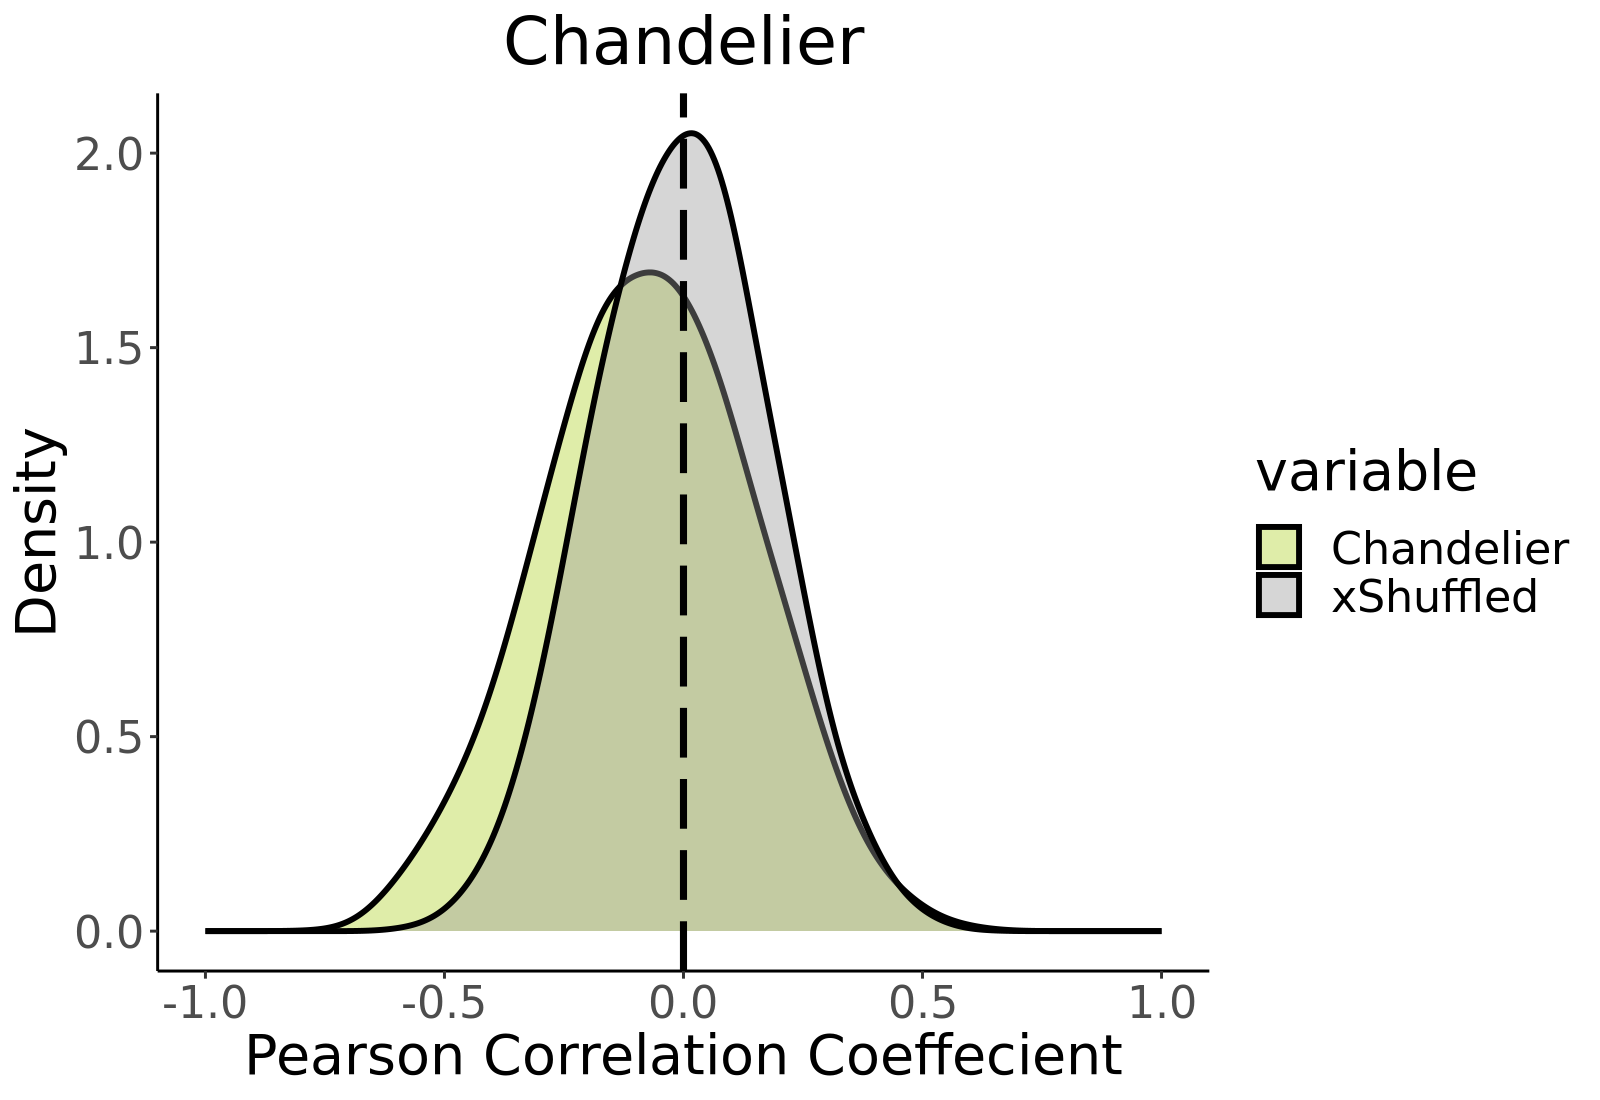

In [190]:
#Filled density plots
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
ggplot(data=comb, aes(x=cor, fill=variable)) +
geom_density(adjust=1.8, alpha=.4, size=1) +
scale_fill_manual(values=c("#B0D229","#999999")) +
geom_vline(xintercept=0, col="black", linetype="longdash", size=1.2) +
xlim(-1, 1) +
theme_classic() + labs(title=celltype, x ="Pearson Correlation Coeffecient", y = "Density") +
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))

In [191]:
output= foreach(i=1:nrow(cpm)) %dopar% {
pval = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$p.value
pval
}
pval = do.call(rbind,output)
pval = as.data.frame(pval)
colnames(pval) <- 'pval'
pval$fdr <- p.adjust(pval$pval, "fdr")

In [192]:
comb <- cbind(pcc, pval)
rownames(comb) <- rownames(cpm)

In [193]:
comb$log10fdr <- -log10(comb$fdr)
comb$Age_Correlated <- "No"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor > 0] <- "Up"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor < 0] <- "Down"

In [194]:
write.table(comb, file = paste0(celltype, '_pcc_donor_20k_counts_2x_donors.tsv'), sep = '\t')

In [195]:
comb <- comb[!grepl("No",comb$Age_Correlated),]
comb <- comb[sample(1:nrow(comb)), ]
#comb <- comb[order(comb$cor),]
comb <- comb[order(comb$Age_Correlated),]

In [196]:
write.table(comb, file = paste0(celltype, '_pcc_fdr_0.1.tsv'), sep = '\t')

In [197]:
comb$genes <- rownames(comb)
cpm$genes <- rownames(cpm)

In [198]:
comb <- join(comb, cpm, by = "genes")
comb[,1:7] <- NULL

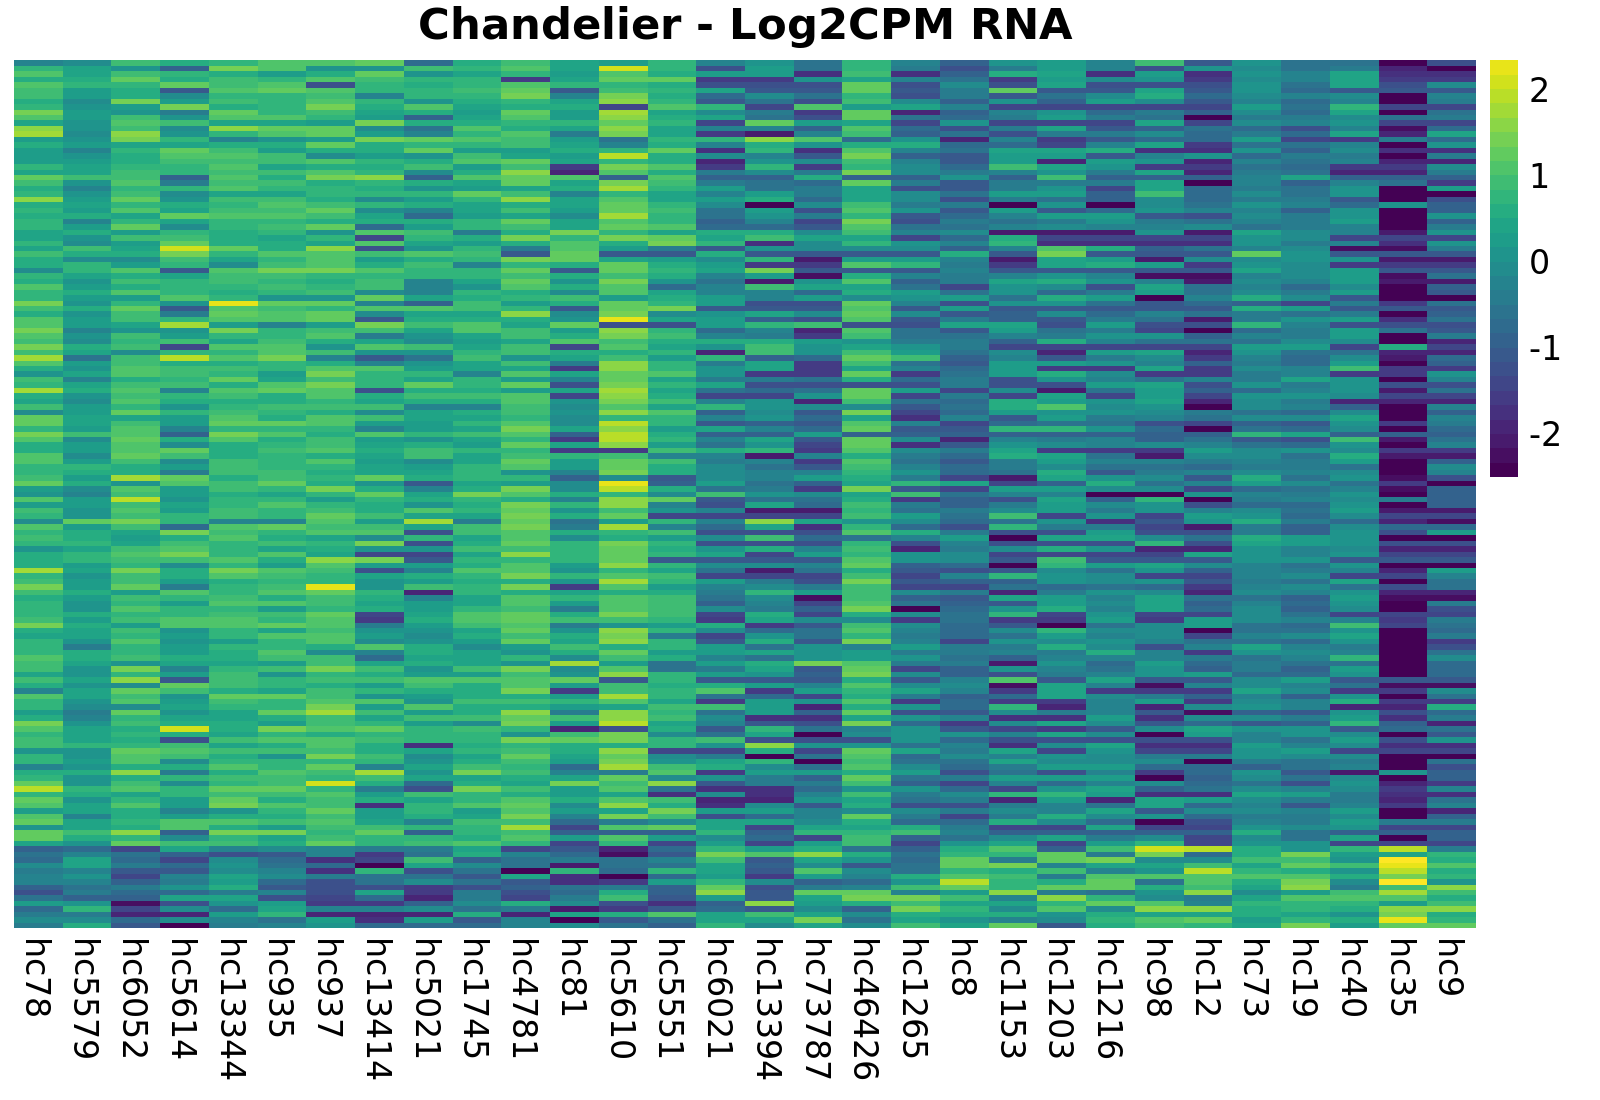

In [199]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
pheatmap(mat=comb, scale = 'row', color = viridis(30), breaks = seq(-2.5, 2.5, by = 0.166667), border_color = NA, 
         cluster_cols = F, cluster_rows = F, show_colnames = TRUE, show_rownames = FALSE, 
         fontsize = 12, main = paste0(celltype, " - Log2CPM RNA"))

In [200]:
celltype <- sprintf(cells[13])
cpm <- read.table(paste0('../rna_cpm/filtered_20k_donors_avg_2_counts_per_donor/', celltype, '_log2cpm_filtered.tsv', sep=''),
                  header=T, row.names=1)

In [201]:
age1 <- age[age$V1 %in% colnames(cpm),]
age1 <- t(age1[order(age1$V2),])
colnames(age1) <- as.matrix(age1[1,])
age1 <- age1[-1, ]
age1 <- t(age1)
age_mat <- age1[rep(seq_len(nrow(age1)), each = nrow(cpm)), ]
age_mat <- as.data.frame(age_mat)

In [202]:
# calculate spearman correlation 
output= foreach(i=1:nrow(cpm)) %dopar% {
pcc = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$estimate
pcc
}
# combine the list of output. 
pcc = do.call(rbind,output)

In [203]:
# calculate shuffled spearman correlation
cpm_shuf <- randomizeMatrix(cpm, null.model = "richness",iterations = 5000)
age_shuf <- randomizeMatrix(age_mat, null.model = "richness",iterations = 5000)

output_shuf= foreach(i=1:nrow(cpm_shuf)) %dopar% {
pcc_shuf = cor.test(as.numeric(cpm_shuf[i,]),as.numeric(age_shuf[i,]),method="pearson")$estimate
pcc_shuf
}
# combine the list of output. 
pcc_shuf = do.call(rbind,output_shuf)

In [204]:
pcc <- as.data.frame(pcc)
pcc_shuf <- as.data.frame(pcc_shuf)
pcc$variable <- paste0(celltype)
pcc_shuf$variable <- 'xShuffled'

In [205]:
comb <- rbind(pcc, pcc_shuf)

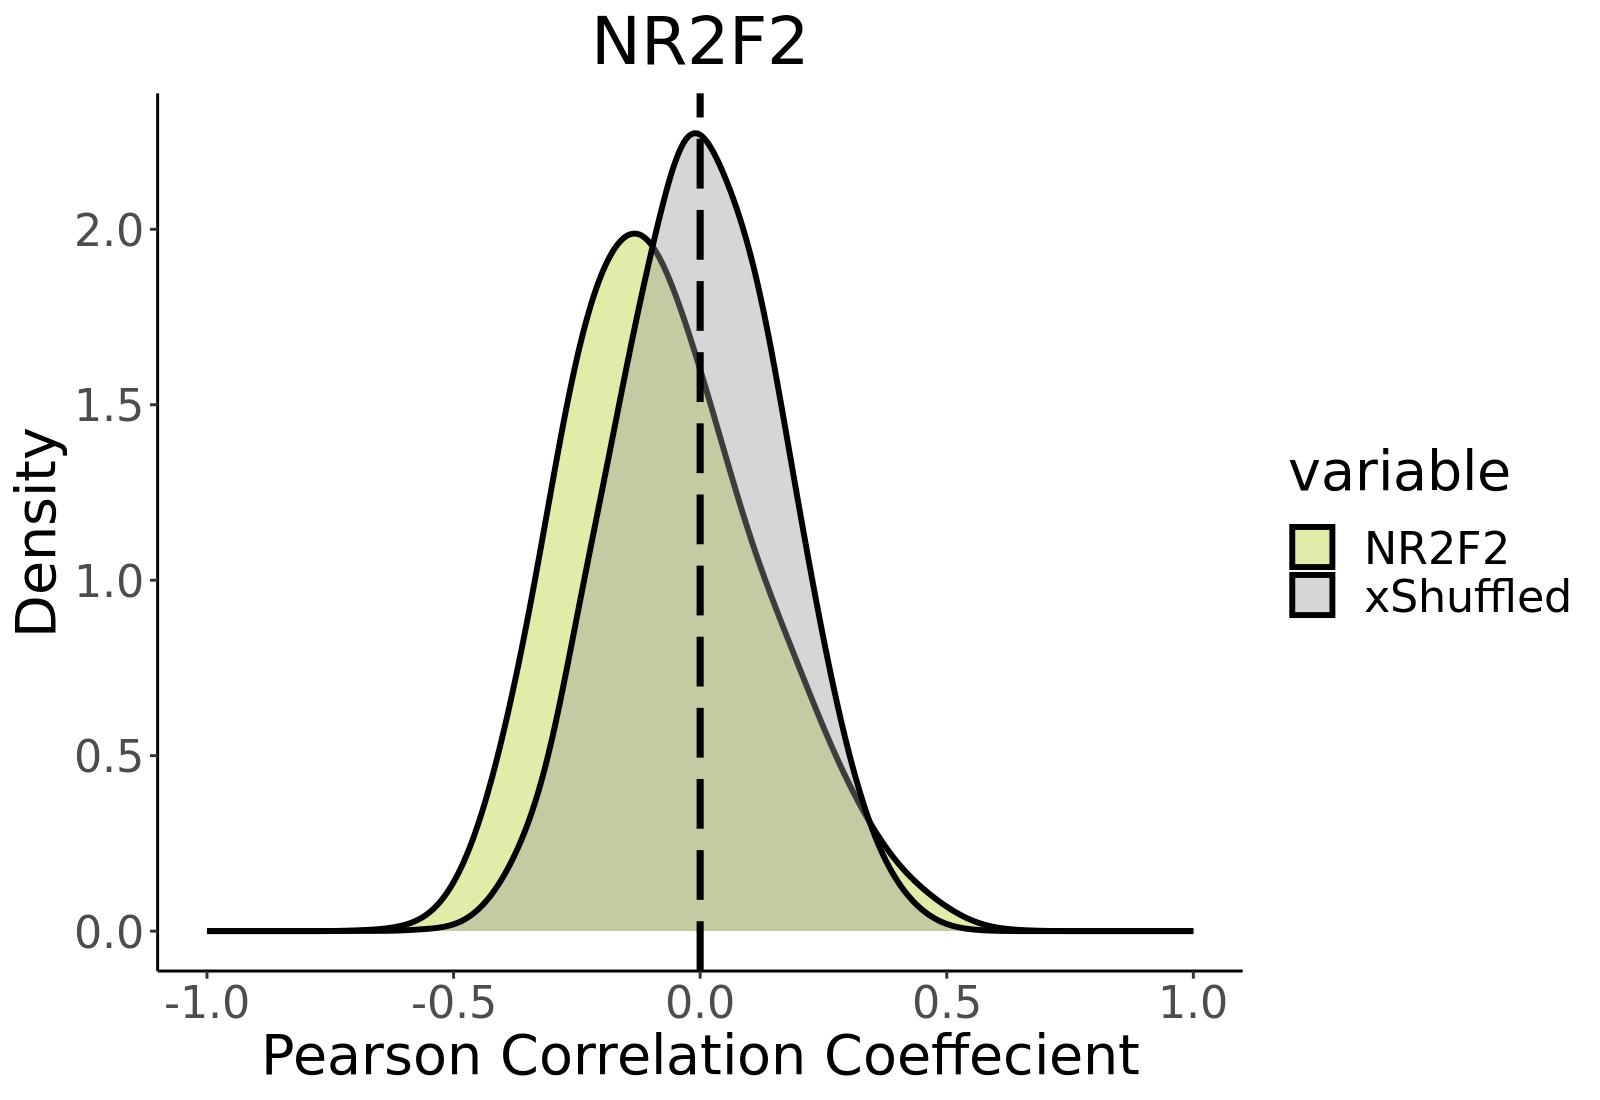

In [206]:
#Filled density plots
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
ggplot(data=comb, aes(x=cor, fill=variable)) +
geom_density(adjust=1.8, alpha=.4, size=1) +
scale_fill_manual(values=c("#B0D229","#999999")) +
geom_vline(xintercept=0, col="black", linetype="longdash", size=1.2) +
xlim(-1, 1) +
theme_classic() + labs(title=celltype, x ="Pearson Correlation Coeffecient", y = "Density") +
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))

In [207]:
output= foreach(i=1:nrow(cpm)) %dopar% {
pval = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$p.value
pval
}
pval = do.call(rbind,output)
pval = as.data.frame(pval)
colnames(pval) <- 'pval'
pval$fdr <- p.adjust(pval$pval, "fdr")

In [208]:
comb <- cbind(pcc, pval)
rownames(comb) <- rownames(cpm)

In [209]:
comb$log10fdr <- -log10(comb$fdr)
comb$Age_Correlated <- "No"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor > 0] <- "Up"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor < 0] <- "Down"

In [210]:
write.table(comb, file = paste0(celltype, '_pcc_donor_20k_counts_2x_donors.tsv'), sep = '\t')

In [211]:
comb <- comb[!grepl("No",comb$Age_Correlated),]
comb <- comb[sample(1:nrow(comb)), ]
#comb <- comb[order(comb$cor),]
comb <- comb[order(comb$Age_Correlated),]

In [212]:
write.table(comb, file = paste0(celltype, '_pcc_fdr_0.1.tsv'), sep = '\t')

In [213]:
comb$genes <- rownames(comb)
cpm$genes <- rownames(cpm)

In [214]:
comb <- join(comb, cpm, by = "genes")
comb[,1:7] <- NULL

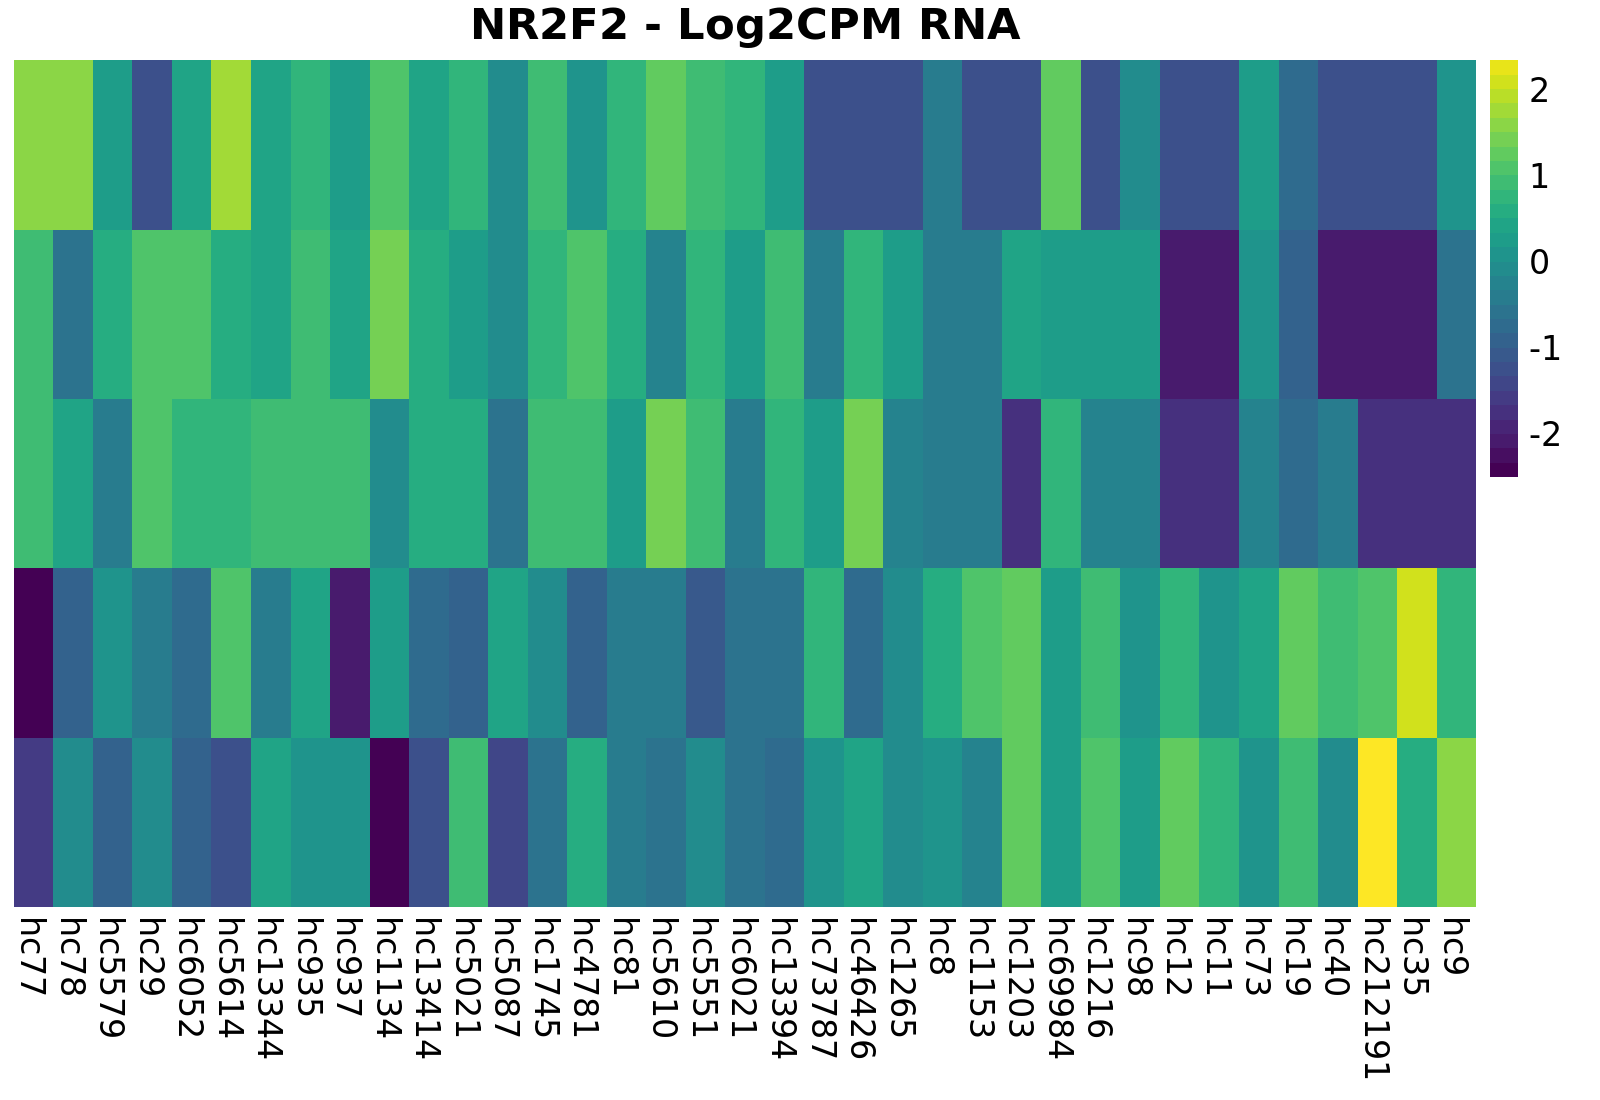

In [215]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
pheatmap(mat=comb, scale = 'row', color = viridis(30), breaks = seq(-2.5, 2.5, by = 0.166667), border_color = NA, 
         cluster_cols = F, cluster_rows = F, show_colnames = TRUE, show_rownames = FALSE, 
         fontsize = 12, main = paste0(celltype, " - Log2CPM RNA"))

In [216]:
celltype <- sprintf(cells[14])
cpm <- read.table(paste0('../rna_cpm/filtered_20k_donors_avg_2_counts_per_donor/', celltype, '_log2cpm_filtered.tsv', sep=''),
                  header=T, row.names=1)

In [217]:
age1 <- age[age$V1 %in% colnames(cpm),]
age1 <- t(age1[order(age1$V2),])
colnames(age1) <- as.matrix(age1[1,])
age1 <- age1[-1, ]
age1 <- t(age1)
age_mat <- age1[rep(seq_len(nrow(age1)), each = nrow(cpm)), ]
age_mat <- as.data.frame(age_mat)

In [218]:
# calculate spearman correlation 
output= foreach(i=1:nrow(cpm)) %dopar% {
pcc = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$estimate
pcc
}
# combine the list of output. 
pcc = do.call(rbind,output)

In [219]:
# calculate shuffled spearman correlation
cpm_shuf <- randomizeMatrix(cpm, null.model = "richness",iterations = 5000)
age_shuf <- randomizeMatrix(age_mat, null.model = "richness",iterations = 5000)

output_shuf= foreach(i=1:nrow(cpm_shuf)) %dopar% {
pcc_shuf = cor.test(as.numeric(cpm_shuf[i,]),as.numeric(age_shuf[i,]),method="pearson")$estimate
pcc_shuf
}
# combine the list of output. 
pcc_shuf = do.call(rbind,output_shuf)

In [220]:
pcc <- as.data.frame(pcc)
pcc_shuf <- as.data.frame(pcc_shuf)
pcc$variable <- paste0(celltype)
pcc_shuf$variable <- 'xShuffled'

In [221]:
comb <- rbind(pcc, pcc_shuf)

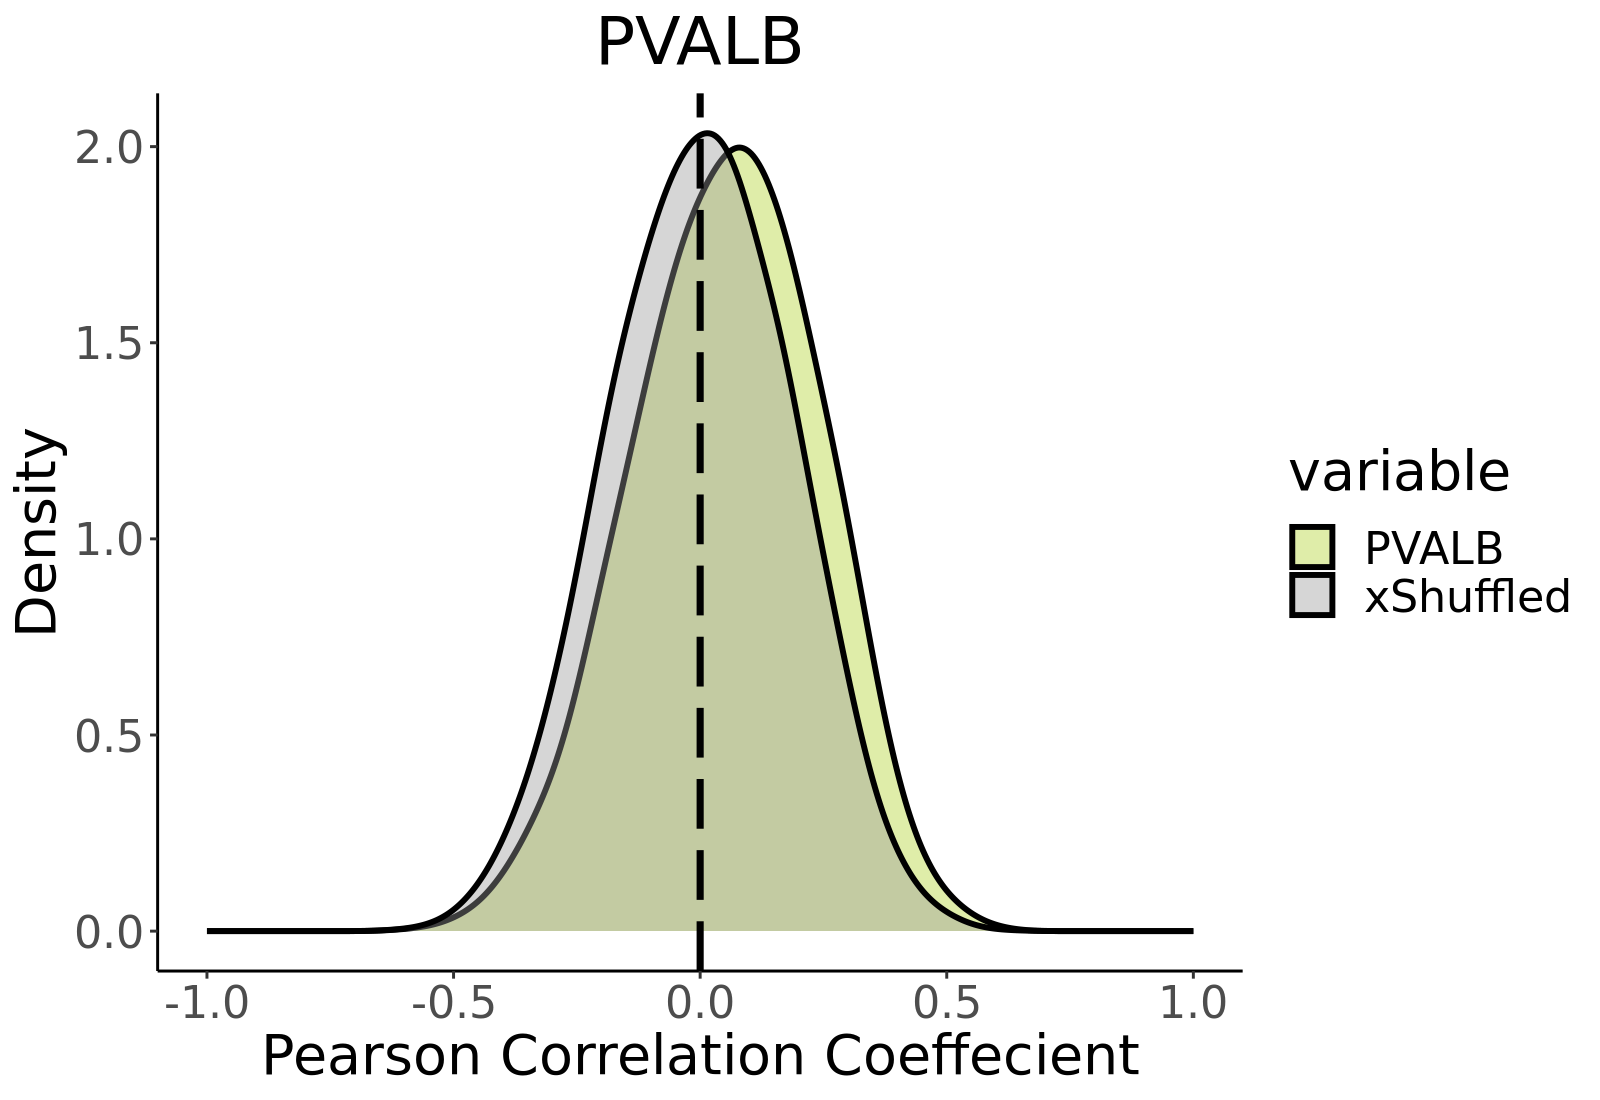

In [222]:
#Filled density plots
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
ggplot(data=comb, aes(x=cor, fill=variable)) +
geom_density(adjust=1.8, alpha=.4, size=1) +
scale_fill_manual(values=c("#B0D229","#999999")) +
geom_vline(xintercept=0, col="black", linetype="longdash", size=1.2) +
xlim(-1, 1) +
theme_classic() + labs(title=celltype, x ="Pearson Correlation Coeffecient", y = "Density") +
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))

In [223]:
output= foreach(i=1:nrow(cpm)) %dopar% {
pval = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$p.value
pval
}
pval = do.call(rbind,output)
pval = as.data.frame(pval)
colnames(pval) <- 'pval'
pval$fdr <- p.adjust(pval$pval, "fdr")

In [224]:
comb <- cbind(pcc, pval)
rownames(comb) <- rownames(cpm)

In [225]:
comb$log10fdr <- -log10(comb$fdr)
comb$Age_Correlated <- "No"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor > 0] <- "Up"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor < 0] <- "Down"

In [226]:
write.table(comb, file = paste0(celltype, '_pcc_donor_20k_counts_2x_donors.tsv'), sep = '\t')

In [227]:
comb <- comb[!grepl("No",comb$Age_Correlated),]
comb <- comb[sample(1:nrow(comb)), ]
#comb <- comb[order(comb$cor),]
comb <- comb[order(comb$Age_Correlated),]

In [228]:
write.table(comb, file = paste0(celltype, '_pcc_fdr_0.1.tsv'), sep = '\t')

In [229]:
comb$genes <- rownames(comb)
cpm$genes <- rownames(cpm)

In [230]:
comb <- join(comb, cpm, by = "genes")
comb[,1:7] <- NULL

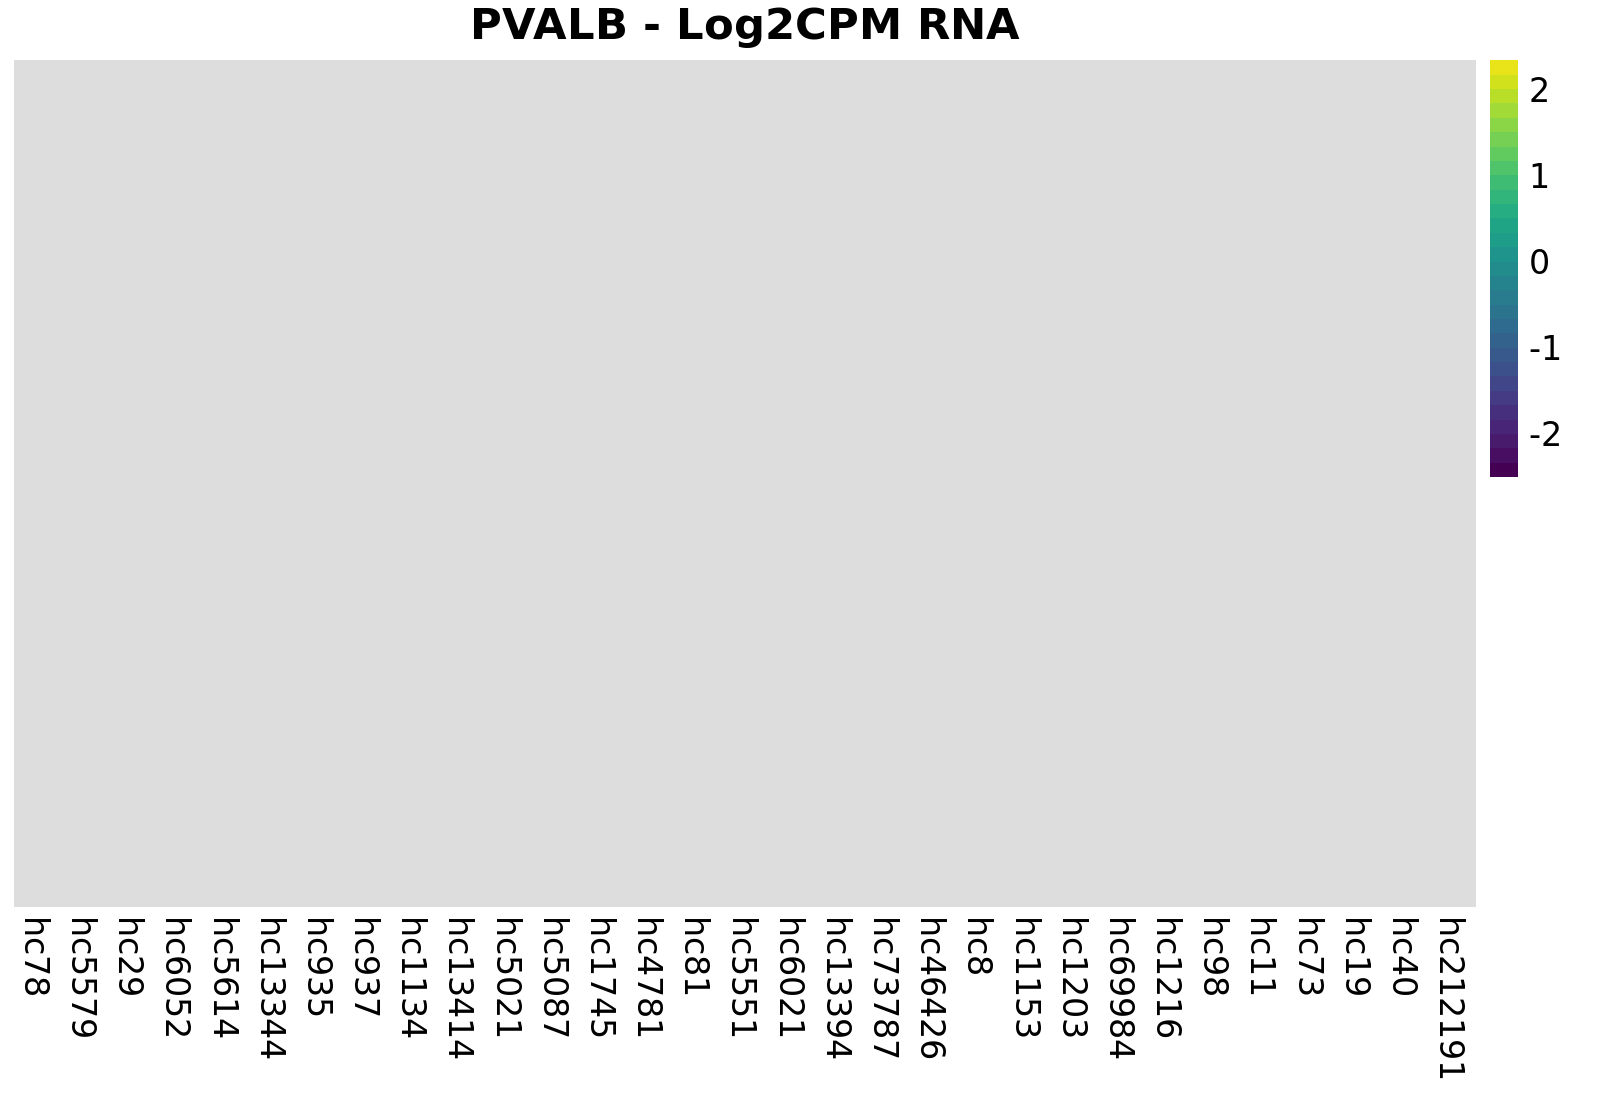

In [231]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
pheatmap(mat=comb, scale = 'row', color = viridis(30), breaks = seq(-2.5, 2.5, by = 0.166667), border_color = NA, 
         cluster_cols = F, cluster_rows = F, show_colnames = TRUE, show_rownames = FALSE, 
         fontsize = 12, main = paste0(celltype, " - Log2CPM RNA"))

In [232]:
celltype <- sprintf(cells[15])
cpm <- read.table(paste0('../rna_cpm/filtered_20k_donors_avg_2_counts_per_donor/', celltype, '_log2cpm_filtered.tsv', sep=''),
                  header=T, row.names=1)

In [233]:
age1 <- age[age$V1 %in% colnames(cpm),]
age1 <- t(age1[order(age1$V2),])
colnames(age1) <- as.matrix(age1[1,])
age1 <- age1[-1, ]
age1 <- t(age1)
age_mat <- age1[rep(seq_len(nrow(age1)), each = nrow(cpm)), ]
age_mat <- as.data.frame(age_mat)

In [234]:
# calculate spearman correlation 
output= foreach(i=1:nrow(cpm)) %dopar% {
pcc = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$estimate
pcc
}
# combine the list of output. 
pcc = do.call(rbind,output)

In [235]:
# calculate shuffled spearman correlation
cpm_shuf <- randomizeMatrix(cpm, null.model = "richness",iterations = 5000)
age_shuf <- randomizeMatrix(age_mat, null.model = "richness",iterations = 5000)

output_shuf= foreach(i=1:nrow(cpm_shuf)) %dopar% {
pcc_shuf = cor.test(as.numeric(cpm_shuf[i,]),as.numeric(age_shuf[i,]),method="pearson")$estimate
pcc_shuf
}
# combine the list of output. 
pcc_shuf = do.call(rbind,output_shuf)

In [236]:
pcc <- as.data.frame(pcc)
pcc_shuf <- as.data.frame(pcc_shuf)
pcc$variable <- paste0(celltype)
pcc_shuf$variable <- 'xShuffled'

In [237]:
comb <- rbind(pcc, pcc_shuf)

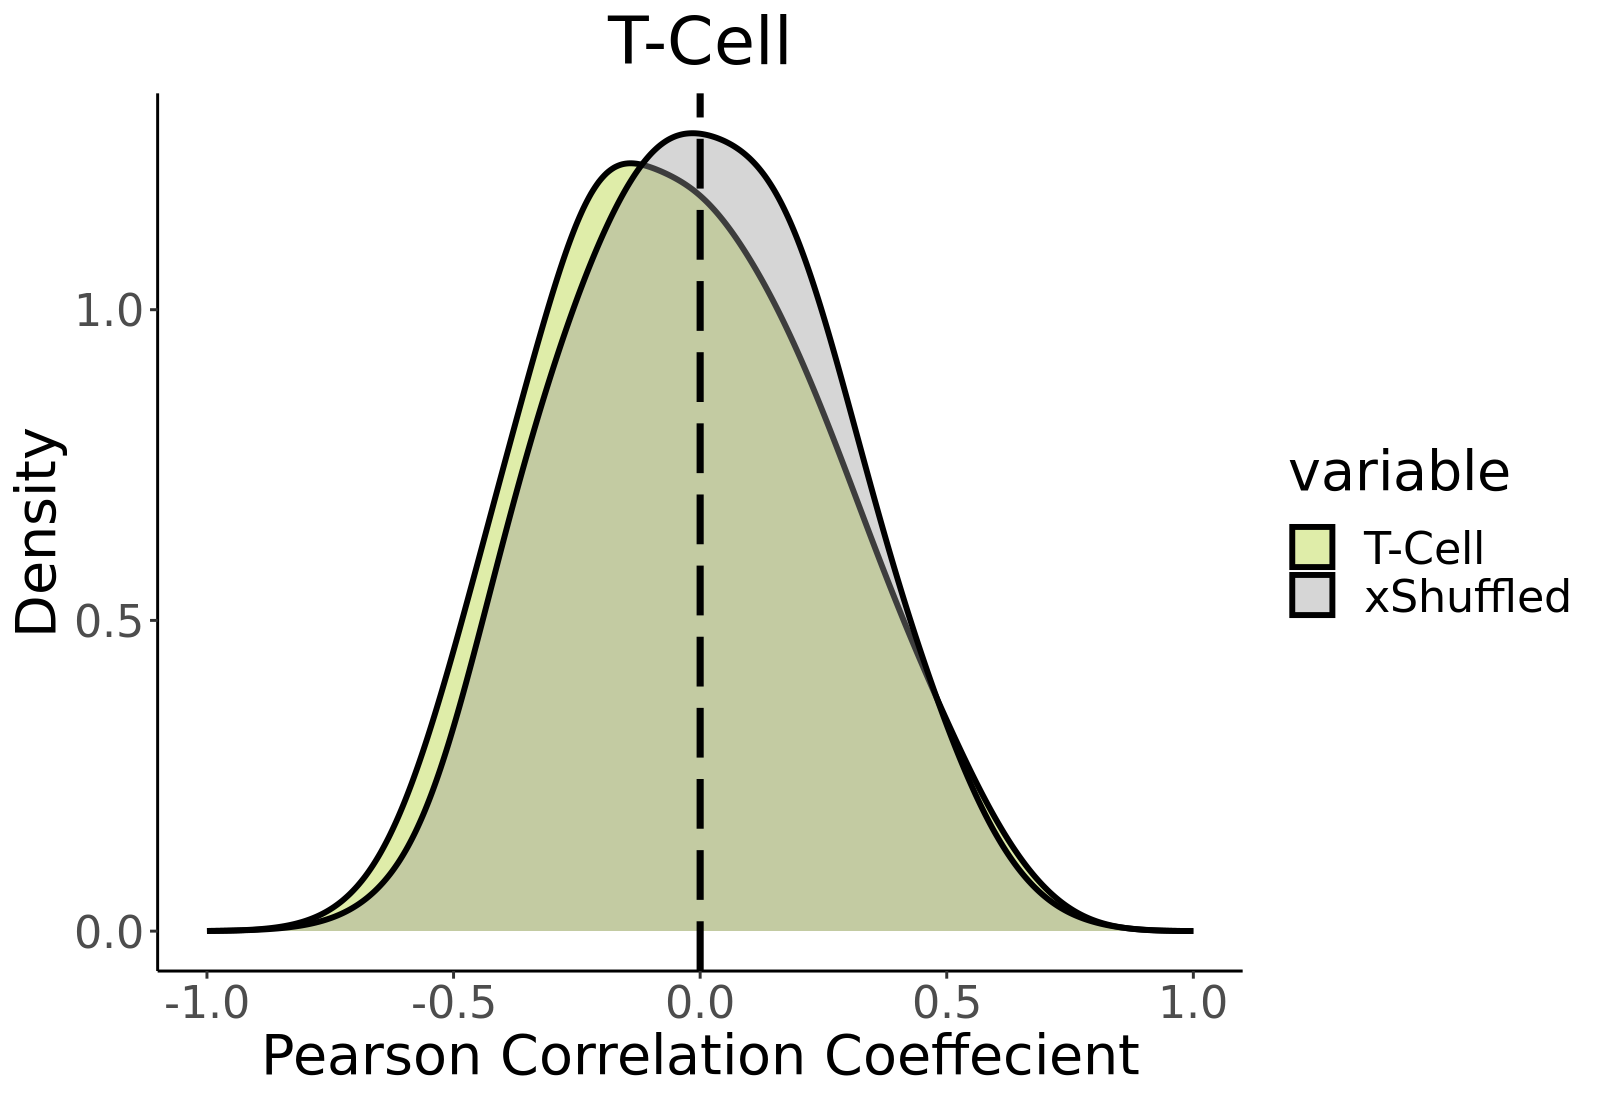

In [238]:
#Filled density plots
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
ggplot(data=comb, aes(x=cor, fill=variable)) +
geom_density(adjust=1.8, alpha=.4, size=1) +
scale_fill_manual(values=c("#B0D229","#999999")) +
geom_vline(xintercept=0, col="black", linetype="longdash", size=1.2) +
xlim(-1, 1) +
theme_classic() + labs(title=celltype, x ="Pearson Correlation Coeffecient", y = "Density") +
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))

In [239]:
output= foreach(i=1:nrow(cpm)) %dopar% {
pval = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$p.value
pval
}
pval = do.call(rbind,output)
pval = as.data.frame(pval)
colnames(pval) <- 'pval'
pval$fdr <- p.adjust(pval$pval, "fdr")

In [240]:
comb <- cbind(pcc, pval)
rownames(comb) <- rownames(cpm)

In [241]:
comb$log10fdr <- -log10(comb$fdr)
comb$Age_Correlated <- "No"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor > 0] <- "Up"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor < 0] <- "Down"

In [242]:
write.table(comb, file = paste0(celltype, '_pcc_donor_20k_counts_2x_donors.tsv'), sep = '\t')

In [243]:
comb <- comb[!grepl("No",comb$Age_Correlated),]
comb <- comb[sample(1:nrow(comb)), ]
#comb <- comb[order(comb$cor),]
comb <- comb[order(comb$Age_Correlated),]

In [244]:
write.table(comb, file = paste0(celltype, '_pcc_fdr_0.1.tsv'), sep = '\t')

In [245]:
comb$genes <- rownames(comb)
cpm$genes <- rownames(cpm)

In [246]:
comb <- join(comb, cpm, by = "genes")
comb[,1:7] <- NULL

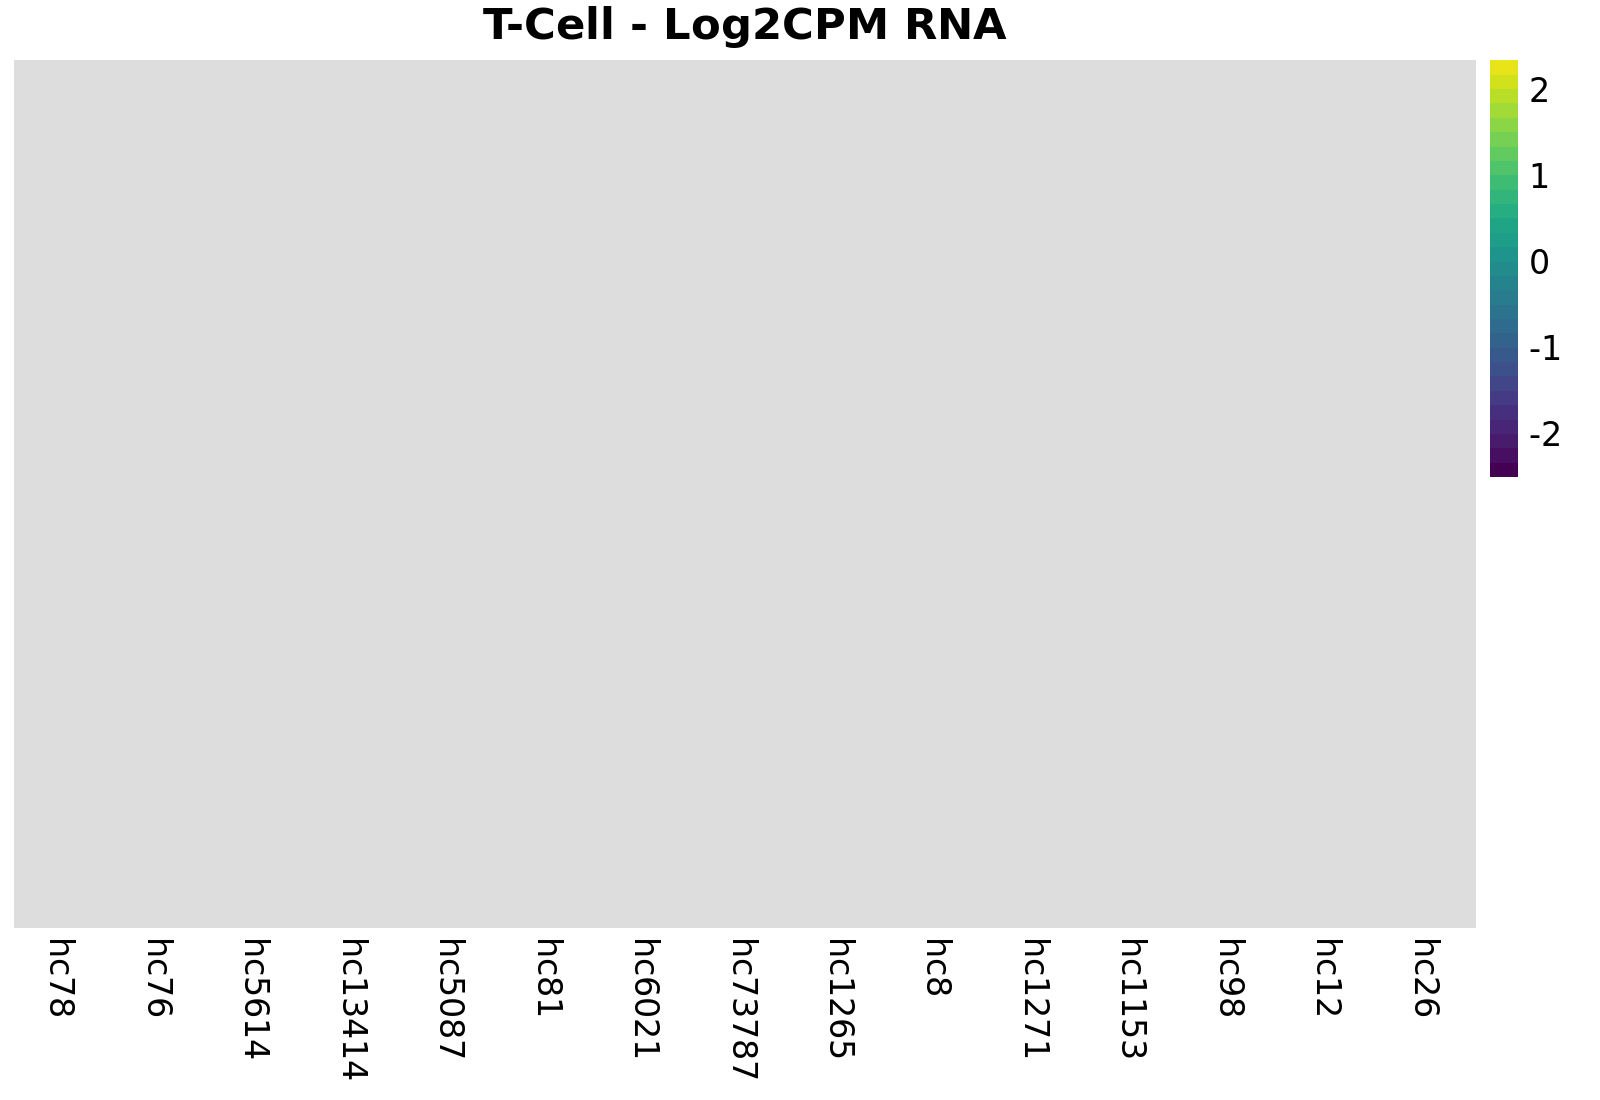

In [247]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
pheatmap(mat=comb, scale = 'row', color = viridis(30), breaks = seq(-2.5, 2.5, by = 0.166667), border_color = NA, 
         cluster_cols = F, cluster_rows = F, show_colnames = TRUE, show_rownames = FALSE, 
         fontsize = 12, main = paste0(celltype, " - Log2CPM RNA"))

In [21]:
celltype <- sprintf(cells[16])
cpm <- read.table(paste0('../rna_cpm/filtered_20k_donors_avg_2_counts_per_donor/', celltype, '_log2cpm_filtered.tsv', sep=''),
                  header=T, row.names=1)

In [22]:
age1 <- age[age$V1 %in% colnames(cpm),]
age1 <- t(age1[order(age1$V2),])
colnames(age1) <- as.matrix(age1[1,])
age1 <- age1[-1, ]
age1 <- t(age1)
age_mat <- age1[rep(seq_len(nrow(age1)), each = nrow(cpm)), ]
age_mat <- as.data.frame(age_mat)

In [23]:
# calculate spearman correlation 
output= foreach(i=1:nrow(cpm)) %dopar% {
pcc = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$estimate
pcc
}
# combine the list of output. 
pcc = do.call(rbind,output)

In [24]:
# calculate shuffled spearman correlation
cpm_shuf <- randomizeMatrix(cpm, null.model = "richness",iterations = 5000)
age_shuf <- randomizeMatrix(age_mat, null.model = "richness",iterations = 5000)

output_shuf= foreach(i=1:nrow(cpm_shuf)) %dopar% {
pcc_shuf = cor.test(as.numeric(cpm_shuf[i,]),as.numeric(age_shuf[i,]),method="pearson")$estimate
pcc_shuf
}
# combine the list of output. 
pcc_shuf = do.call(rbind,output_shuf)

In [25]:
pcc <- as.data.frame(pcc)
pcc_shuf <- as.data.frame(pcc_shuf)
pcc$variable <- paste0(celltype)
pcc_shuf$variable <- 'xShuffled'

In [26]:
comb <- rbind(pcc, pcc_shuf)

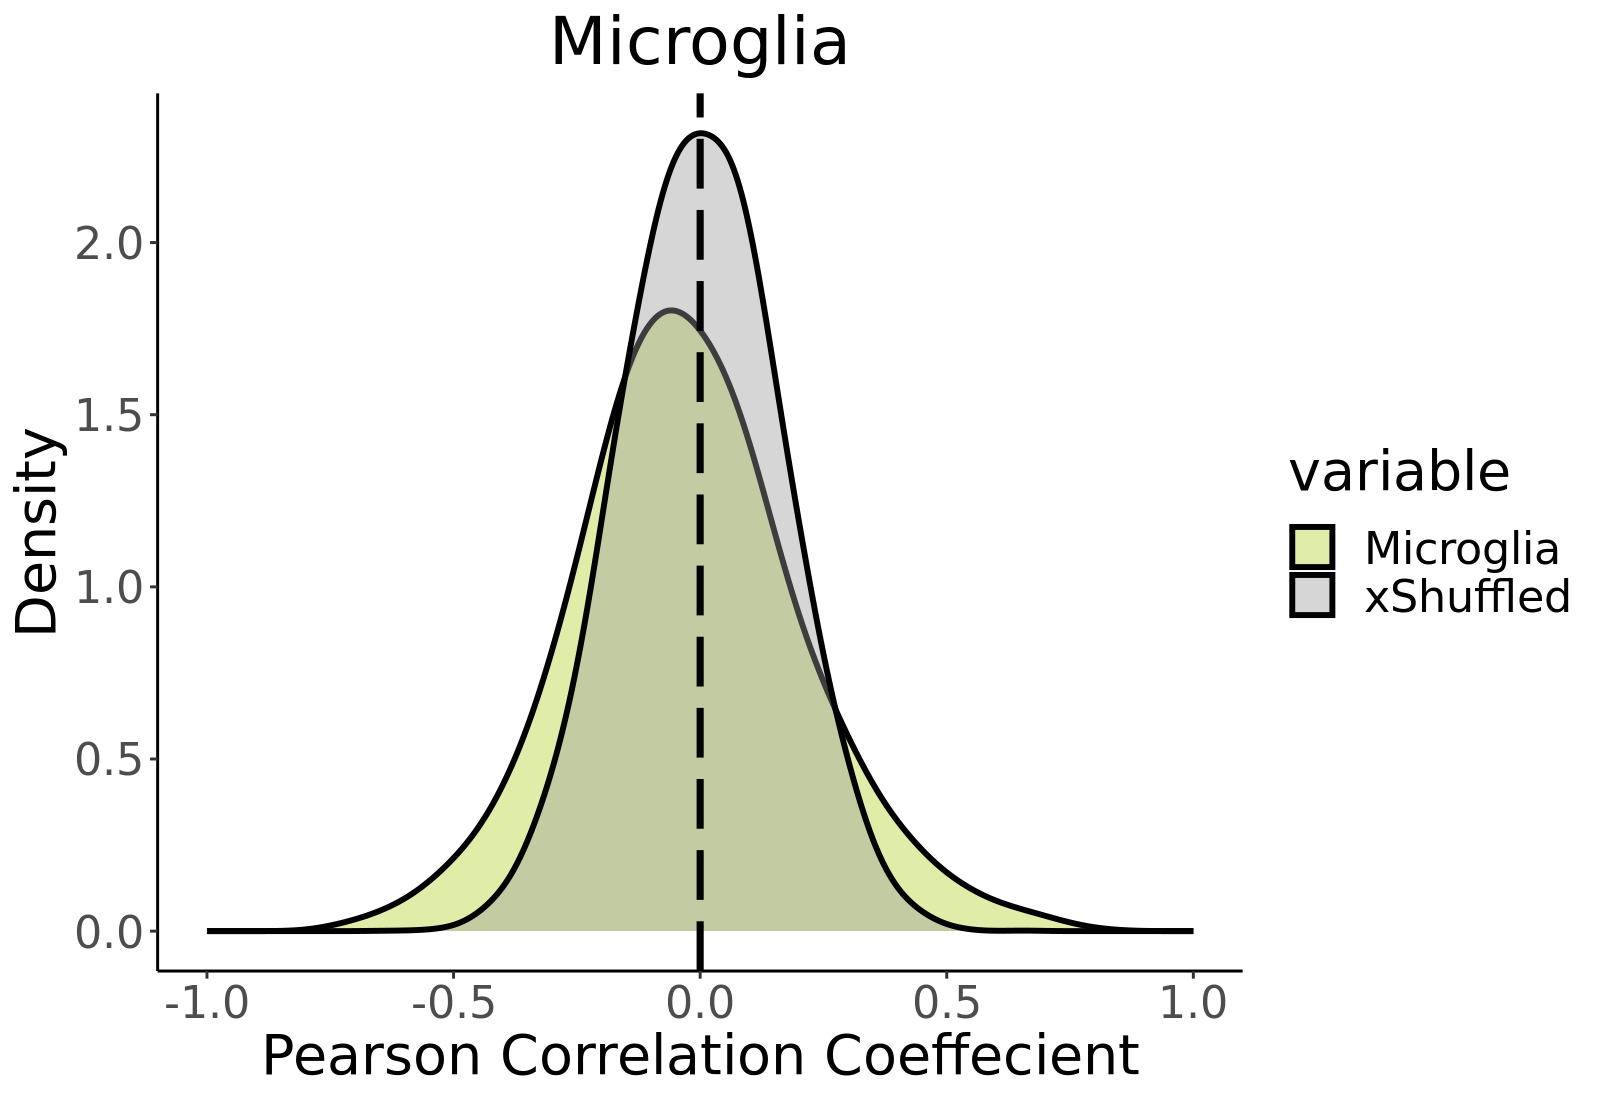

In [27]:
#Filled density plots
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
ggplot(data=comb, aes(x=cor, fill=variable)) +
geom_density(adjust=1.8, alpha=.4, size=1) +
scale_fill_manual(values=c("#B0D229","#999999")) +
geom_vline(xintercept=0, col="black", linetype="longdash", size=1.2) +
xlim(-1, 1) +
theme_classic() + labs(title=celltype, x ="Pearson Correlation Coeffecient", y = "Density") +
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))

In [28]:
output= foreach(i=1:nrow(cpm)) %dopar% {
pval = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$p.value
pval
}
pval = do.call(rbind,output)
pval = as.data.frame(pval)
colnames(pval) <- 'pval'
pval$fdr <- p.adjust(pval$pval, "fdr")

In [29]:
comb <- cbind(pcc, pval)
rownames(comb) <- rownames(cpm)

In [30]:
comb$log10fdr <- -log10(comb$fdr)
comb$Age_Correlated <- "No"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor > 0] <- "Up"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor < 0] <- "Down"

In [31]:
#write.table(comb, file = paste0(celltype, '_pcc_donor_20k_counts_2x_donors.tsv'), sep = '\t')

In [32]:
comb <- comb[!grepl("No",comb$Age_Correlated),]
comb <- comb[sample(1:nrow(comb)), ]
#comb <- comb[order(comb$cor),]
comb <- comb[order(comb$Age_Correlated),]

In [33]:
#write.table(comb, file = paste0(celltype, '_pcc_fdr_0.1.tsv'), sep = '\t')

In [34]:
comb$genes <- rownames(comb)
cpm$genes <- rownames(cpm)

In [35]:
comb <- join(comb, cpm, by = "genes")
write.table(comb, file = 'Microglia_rna_up_down_age_cor_genes.tsv', sep = '\t', row.names=F)
comb[,1:7] <- NULL

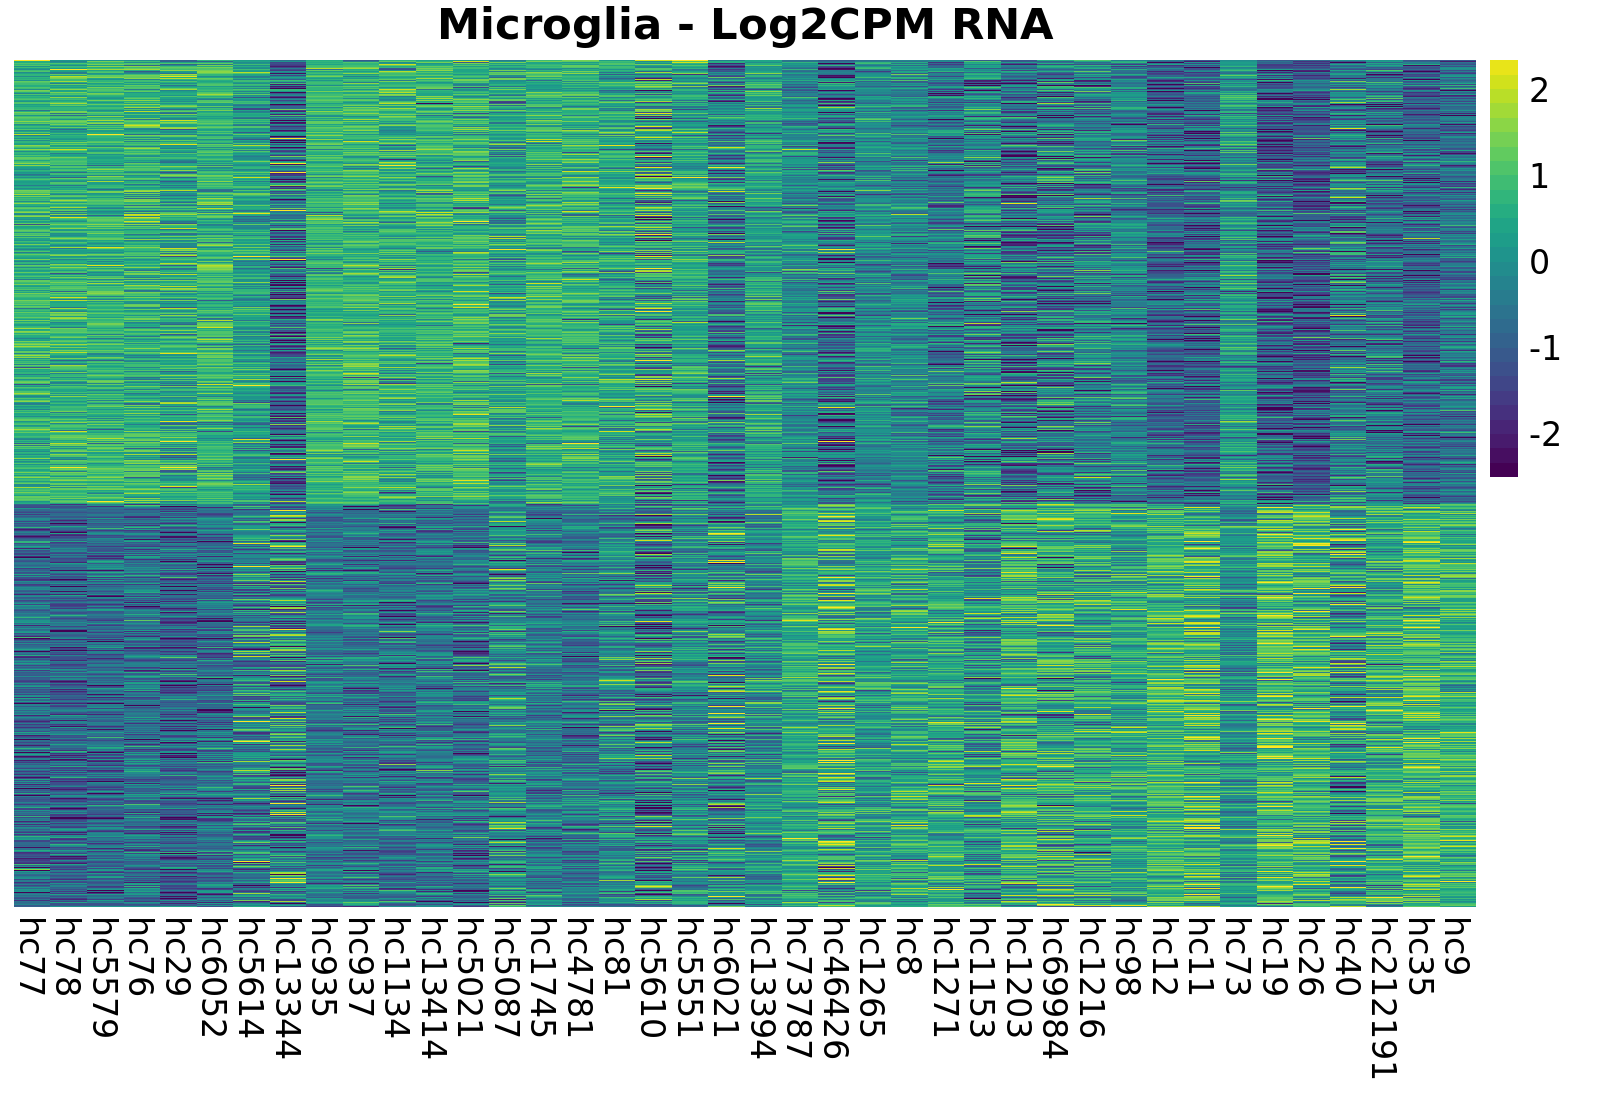

In [263]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
pheatmap(mat=comb, scale = 'row', color = viridis(30), breaks = seq(-2.5, 2.5, by = 0.166667), border_color = NA, 
         cluster_cols = F, cluster_rows = F, show_colnames = TRUE, show_rownames = FALSE, 
         fontsize = 12, main = paste0(celltype, " - Log2CPM RNA"))

In [264]:
celltype <- sprintf(cells[17])
cpm <- read.table(paste0('../rna_cpm/filtered_20k_donors_avg_2_counts_per_donor/', celltype, '_log2cpm_filtered.tsv', sep=''),
                  header=T, row.names=1)

In [265]:
age1 <- age[age$V1 %in% colnames(cpm),]
age1 <- t(age1[order(age1$V2),])
colnames(age1) <- as.matrix(age1[1,])
age1 <- age1[-1, ]
age1 <- t(age1)
age_mat <- age1[rep(seq_len(nrow(age1)), each = nrow(cpm)), ]
age_mat <- as.data.frame(age_mat)

In [266]:
# calculate spearman correlation 
output= foreach(i=1:nrow(cpm)) %dopar% {
pcc = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$estimate
pcc
}
# combine the list of output. 
pcc = do.call(rbind,output)

In [267]:
# calculate shuffled spearman correlation
cpm_shuf <- randomizeMatrix(cpm, null.model = "richness",iterations = 5000)
age_shuf <- randomizeMatrix(age_mat, null.model = "richness",iterations = 5000)

output_shuf= foreach(i=1:nrow(cpm_shuf)) %dopar% {
pcc_shuf = cor.test(as.numeric(cpm_shuf[i,]),as.numeric(age_shuf[i,]),method="pearson")$estimate
pcc_shuf
}
# combine the list of output. 
pcc_shuf = do.call(rbind,output_shuf)

In [268]:
pcc <- as.data.frame(pcc)
pcc_shuf <- as.data.frame(pcc_shuf)
pcc$variable <- paste0(celltype)
pcc_shuf$variable <- 'xShuffled'

In [269]:
comb <- rbind(pcc, pcc_shuf)

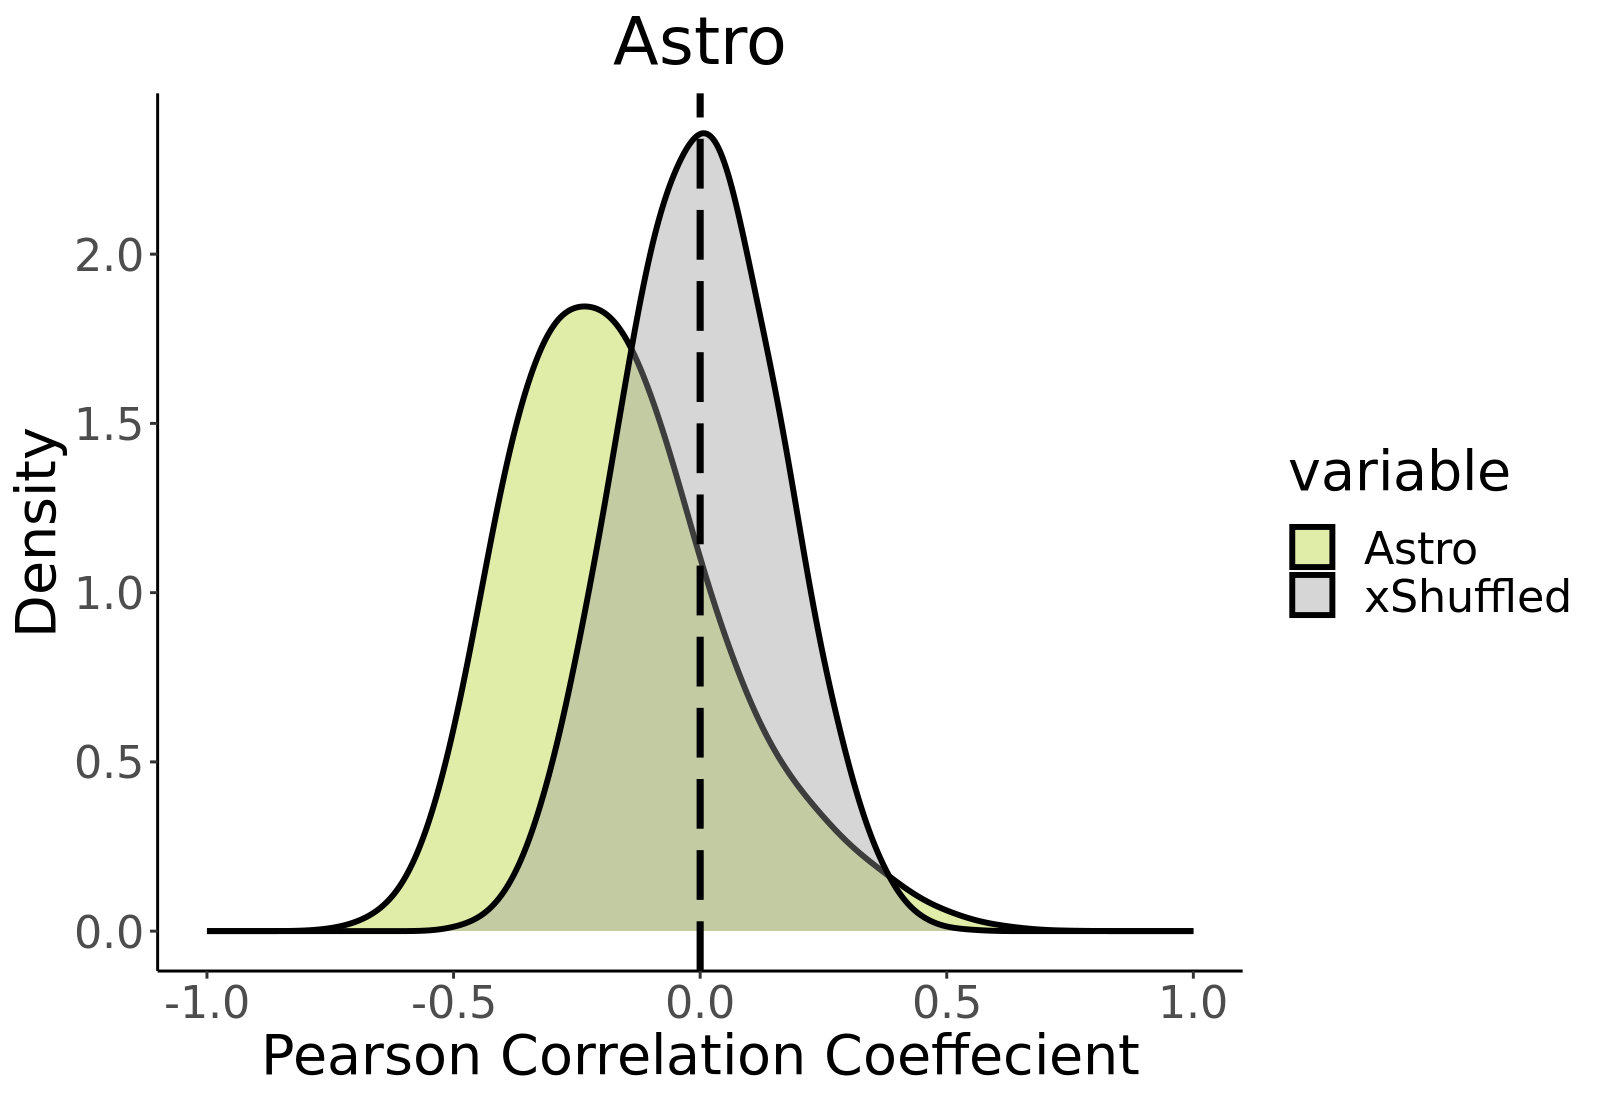

In [270]:
#Filled density plots
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
ggplot(data=comb, aes(x=cor, fill=variable)) +
geom_density(adjust=1.8, alpha=.4, size=1) +
scale_fill_manual(values=c("#B0D229","#999999")) +
geom_vline(xintercept=0, col="black", linetype="longdash", size=1.2) +
xlim(-1, 1) +
theme_classic() + labs(title=celltype, x ="Pearson Correlation Coeffecient", y = "Density") +
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))

In [271]:
output= foreach(i=1:nrow(cpm)) %dopar% {
pval = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$p.value
pval
}
pval = do.call(rbind,output)
pval = as.data.frame(pval)
colnames(pval) <- 'pval'
pval$fdr <- p.adjust(pval$pval, "fdr")

In [272]:
comb <- cbind(pcc, pval)
rownames(comb) <- rownames(cpm)

In [273]:
comb$log10fdr <- -log10(comb$fdr)
comb$Age_Correlated <- "No"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor > 0] <- "Up"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor < 0] <- "Down"

In [274]:
write.table(comb, file = paste0(celltype, '_pcc_donor_20k_counts_2x_donors.tsv'), sep = '\t')

In [275]:
comb <- comb[!grepl("No",comb$Age_Correlated),]
comb <- comb[sample(1:nrow(comb)), ]
#comb <- comb[order(comb$cor),]
comb <- comb[order(comb$Age_Correlated),]

In [276]:
write.table(comb, file = paste0(celltype, '_pcc_fdr_0.1.tsv'), sep = '\t')

In [277]:
comb$genes <- rownames(comb)
cpm$genes <- rownames(cpm)

In [278]:
comb <- join(comb, cpm, by = "genes")
comb[,1:7] <- NULL

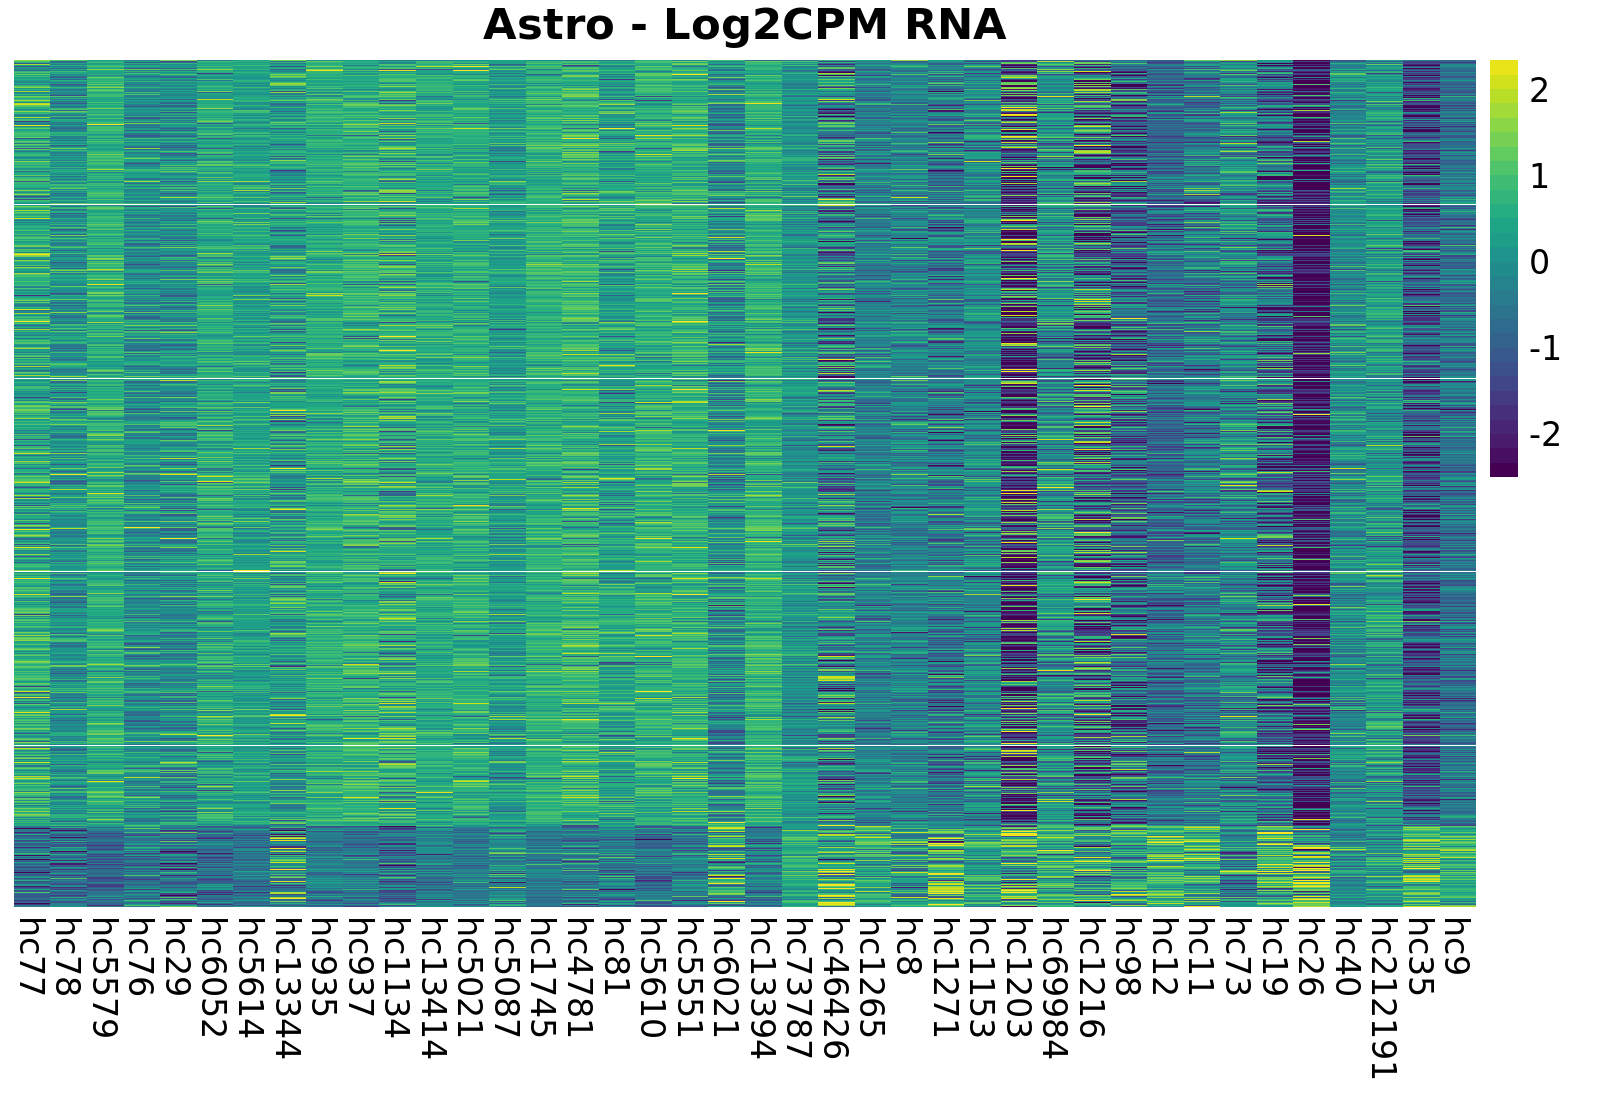

In [279]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
pheatmap(mat=comb, scale = 'row', color = viridis(30), breaks = seq(-2.5, 2.5, by = 0.166667), border_color = NA, 
         cluster_cols = F, cluster_rows = F, show_colnames = TRUE, show_rownames = FALSE, 
         fontsize = 12, main = paste0(celltype, " - Log2CPM RNA"))

In [280]:
celltype <- sprintf(cells[18])
cpm <- read.table(paste0('../rna_cpm/filtered_20k_donors_avg_2_counts_per_donor/', celltype, '_log2cpm_filtered.tsv', sep=''),
                  header=T, row.names=1)

In [281]:
age1 <- age[age$V1 %in% colnames(cpm),]
age1 <- t(age1[order(age1$V2),])
colnames(age1) <- as.matrix(age1[1,])
age1 <- age1[-1, ]
age1 <- t(age1)
age_mat <- age1[rep(seq_len(nrow(age1)), each = nrow(cpm)), ]
age_mat <- as.data.frame(age_mat)

In [282]:
# calculate spearman correlation 
output= foreach(i=1:nrow(cpm)) %dopar% {
pcc = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$estimate
pcc
}
# combine the list of output. 
pcc = do.call(rbind,output)

In [283]:
# calculate shuffled spearman correlation
cpm_shuf <- randomizeMatrix(cpm, null.model = "richness",iterations = 5000)
age_shuf <- randomizeMatrix(age_mat, null.model = "richness",iterations = 5000)

output_shuf= foreach(i=1:nrow(cpm_shuf)) %dopar% {
pcc_shuf = cor.test(as.numeric(cpm_shuf[i,]),as.numeric(age_shuf[i,]),method="pearson")$estimate
pcc_shuf
}
# combine the list of output. 
pcc_shuf = do.call(rbind,output_shuf)

In [284]:
pcc <- as.data.frame(pcc)
pcc_shuf <- as.data.frame(pcc_shuf)
pcc$variable <- paste0(celltype)
pcc_shuf$variable <- 'xShuffled'

In [285]:
comb <- rbind(pcc, pcc_shuf)

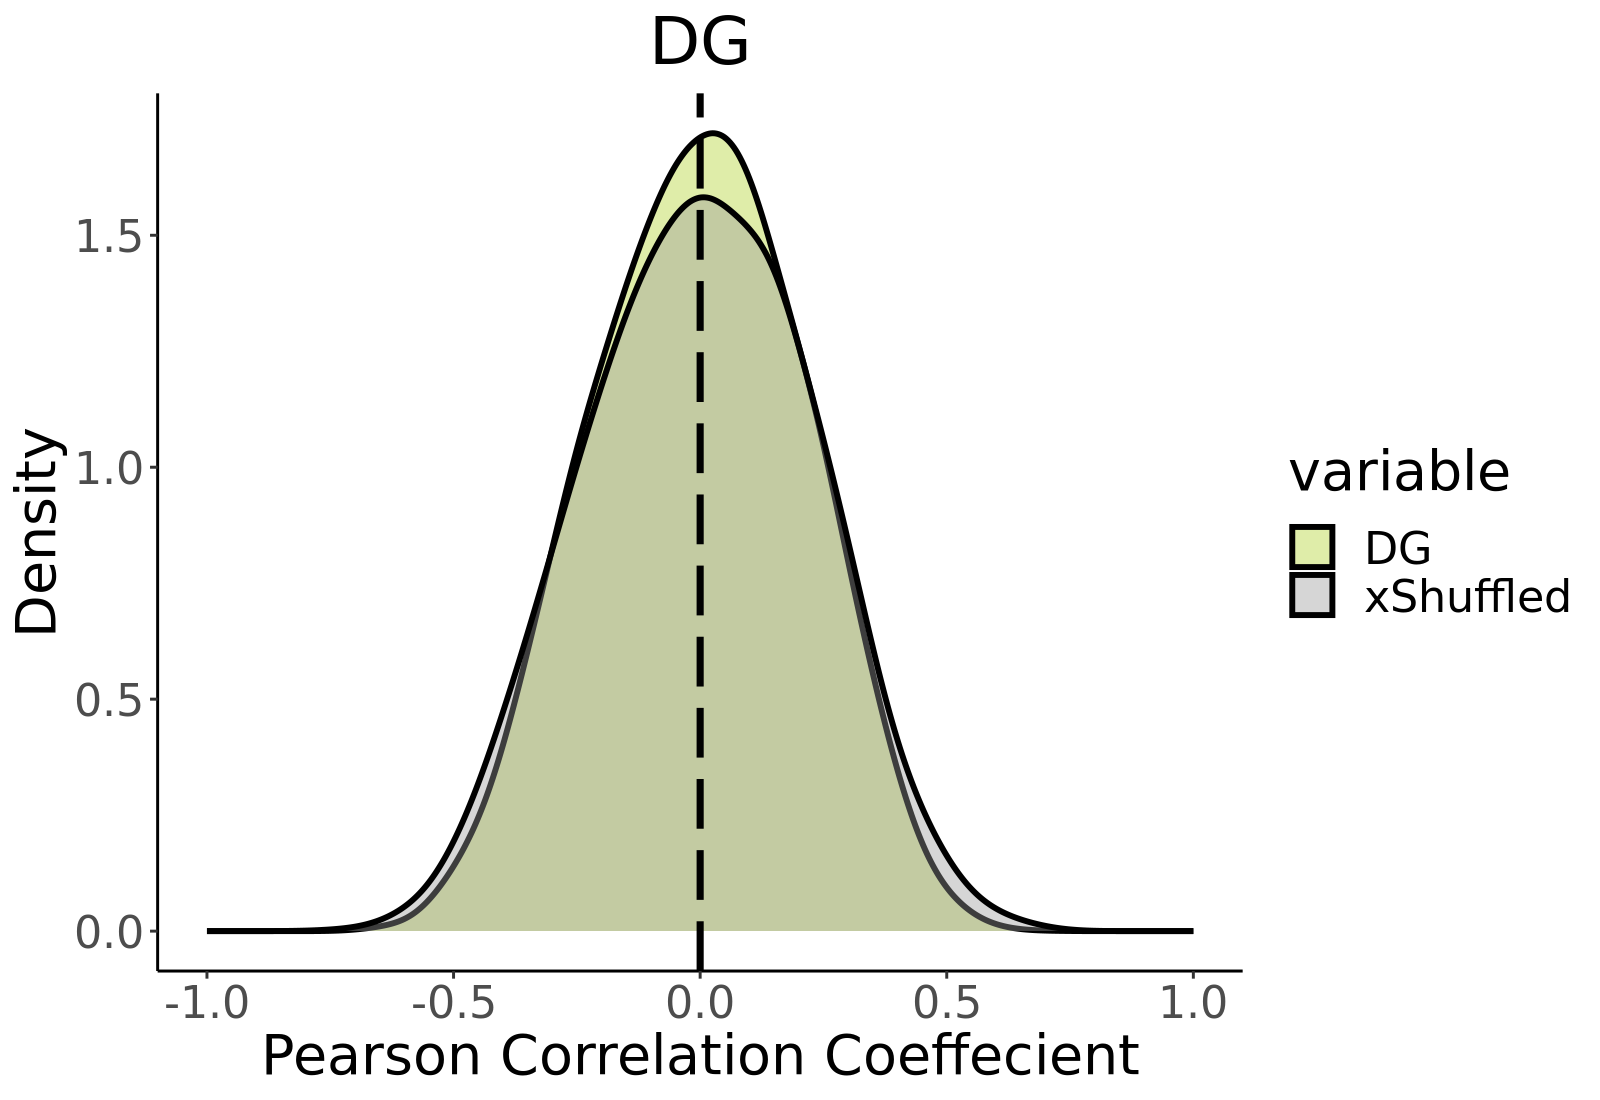

In [286]:
#Filled density plots
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
ggplot(data=comb, aes(x=cor, fill=variable)) +
geom_density(adjust=1.8, alpha=.4, size=1) +
scale_fill_manual(values=c("#B0D229","#999999")) +
geom_vline(xintercept=0, col="black", linetype="longdash", size=1.2) +
xlim(-1, 1) +
theme_classic() + labs(title=celltype, x ="Pearson Correlation Coeffecient", y = "Density") +
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))

In [287]:
output= foreach(i=1:nrow(cpm)) %dopar% {
pval = cor.test(as.numeric(cpm[i,]),as.numeric(age_mat[i,]),method="pearson")$p.value
pval
}
pval = do.call(rbind,output)
pval = as.data.frame(pval)
colnames(pval) <- 'pval'
pval$fdr <- p.adjust(pval$pval, "fdr")

In [288]:
comb <- cbind(pcc, pval)
rownames(comb) <- rownames(cpm)

In [289]:
comb$log10fdr <- -log10(comb$fdr)
comb$Age_Correlated <- "No"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor > 0] <- "Up"
comb$Age_Correlated[comb$fdr < 0.1 & comb$cor < 0] <- "Down"

In [290]:
write.table(comb, file = paste0(celltype, '_pcc_donor_20k_counts_2x_donors.tsv'), sep = '\t')

In [291]:
comb <- comb[!grepl("No",comb$Age_Correlated),]
comb <- comb[sample(1:nrow(comb)), ]
#comb <- comb[order(comb$cor),]
comb <- comb[order(comb$Age_Correlated),]

In [292]:
write.table(comb, file = paste0(celltype, '_pcc_fdr_0.1.tsv'), sep = '\t')

In [293]:
comb$genes <- rownames(comb)
cpm$genes <- rownames(cpm)

In [294]:
comb <- join(comb, cpm, by = "genes")
comb[,1:7] <- NULL

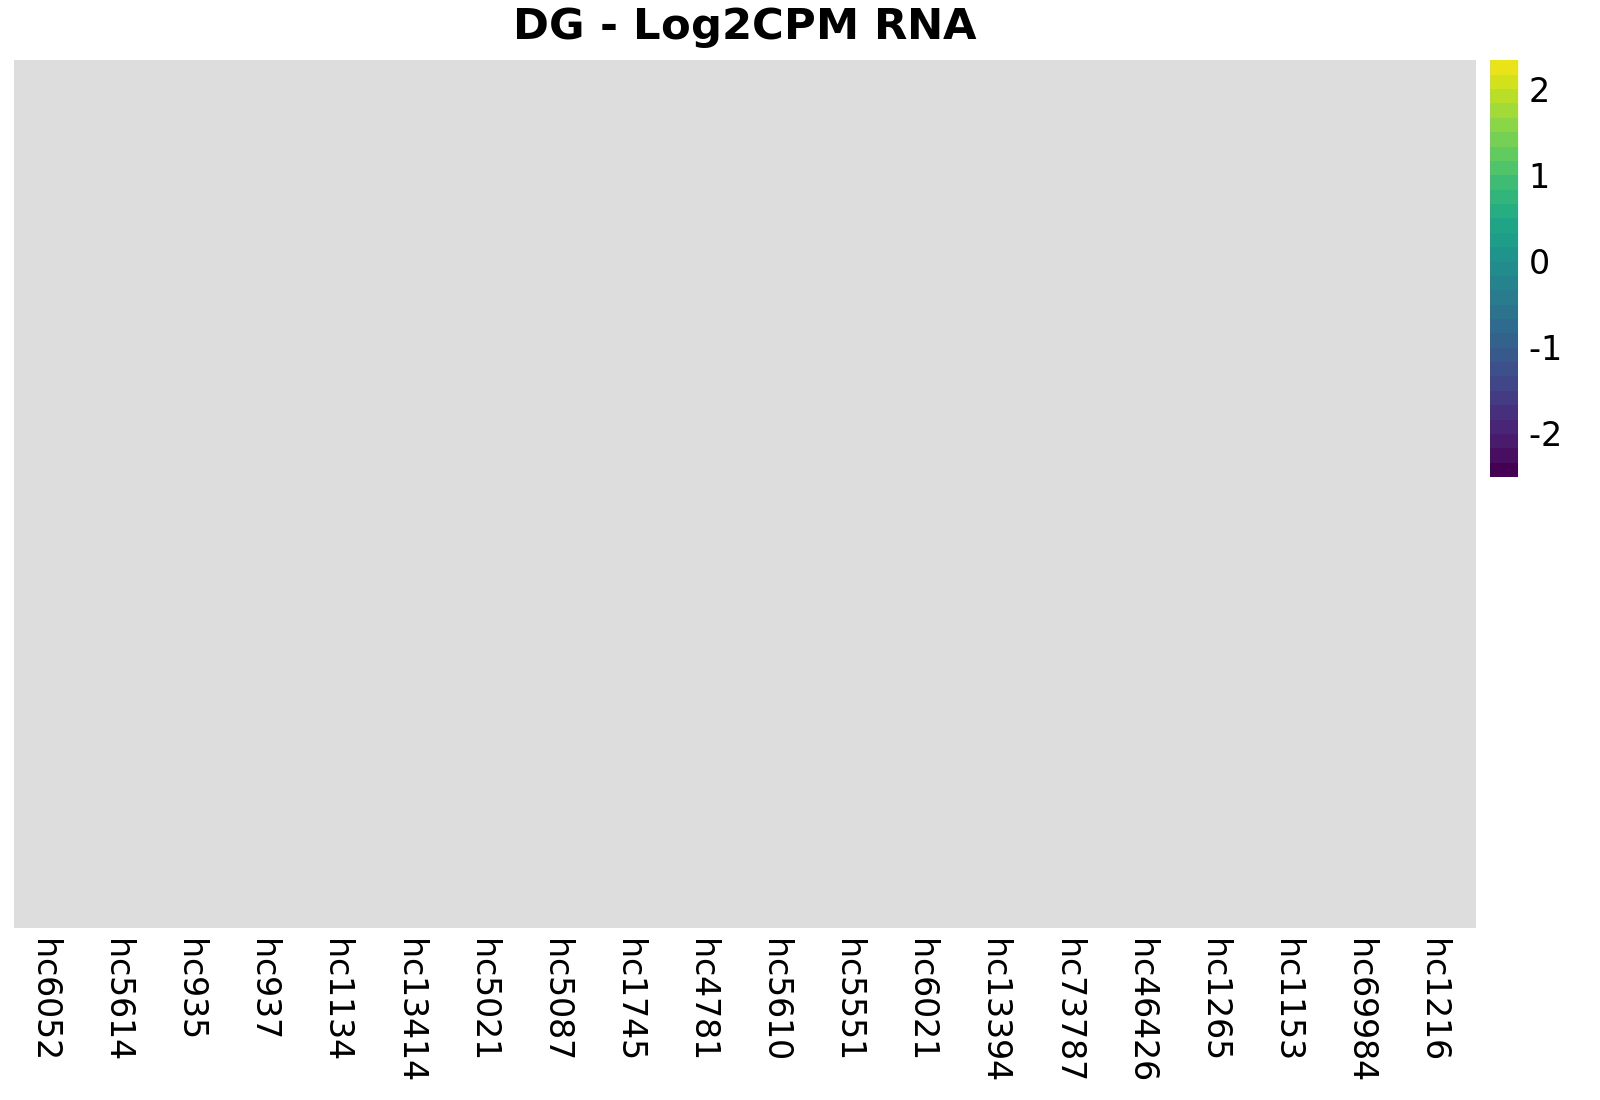

In [295]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
pheatmap(mat=comb, scale = 'row', color = viridis(30), breaks = seq(-2.5, 2.5, by = 0.166667), border_color = NA, 
         cluster_cols = F, cluster_rows = F, show_colnames = TRUE, show_rownames = FALSE, 
         fontsize = 12, main = paste0(celltype, " - Log2CPM RNA"))